from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/TempA/')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-09 00:12:47.508040: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-09 00:12:48.296776: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-09 00:12:48.335155: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-09 00:12:48.335182: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
epochs = 30

In [3]:
df = pd.read_csv("data/LocationA.csv")

df.drop(columns=["Unnamed: 0", "Date"], inplace=True)

WINDOW_SIZE = 3
TempA = df["TempA"]

X1, y1 = df_to_X_y(TempA, WINDOW_SIZE)
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# General Model

### CNN

2024-03-09 00:13:02.753514: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-09 00:13:02.753573: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-09 00:13:02.753606: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-09 00:13:02.754015: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
1/8 [==>...........................] - ETA: 6s - loss: 869.6227 - root_mean_squared_error: 29.4894

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 394ms/step - loss: 769.5421 - root_mean_squared_error: 27.7406 - val_loss: 795.7805 - val_root_mean_squared_error: 28.2096
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 745.3336 - root_mean_squared_error: 27.3008

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 368ms/step - loss: 745.3336 - root_mean_squared_error: 27.3008 - val_loss: 770.7802 - val_root_mean_squared_error: 27.7629
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 719.5344 - root_mean_squared_error: 26.8241

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 674ms/step - loss: 721.7079 - root_mean_squared_error: 26.8646 - val_loss: 746.0692 - val_root_mean_squared_error: 27.3143
Epoch 4/30
4/8 [==============>...............] - ETA: 0s - loss: 741.2800 - root_mean_squared_error: 27.2265

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 148ms/step - loss: 698.6595 - root_mean_squared_error: 26.4322 - val_loss: 721.5861 - val_root_mean_squared_error: 26.8624
Epoch 5/30
1/8 [==>...........................] - ETA: 3s - loss: 661.3821 - root_mean_squared_error: 25.7174

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 95ms/step - loss: 675.1673 - root_mean_squared_error: 25.9840 - val_loss: 697.6331 - val_root_mean_squared_error: 26.4127
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 697.3974 - root_mean_squared_error: 26.4083

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 93ms/step - loss: 652.7390 - root_mean_squared_error: 25.5488 - val_loss: 673.6881 - val_root_mean_squared_error: 25.9555
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 671.8289 - root_mean_squared_error: 25.9197

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 162ms/step - loss: 630.0889 - root_mean_squared_error: 25.1016 - val_loss: 650.5081 - val_root_mean_squared_error: 25.5051
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 588.9288 - root_mean_squared_error: 24.2679

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 152ms/step - loss: 607.9827 - root_mean_squared_error: 24.6573 - val_loss: 627.5803 - val_root_mean_squared_error: 25.0516
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 580.1994 - root_mean_squared_error: 24.0873

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 203ms/step - loss: 586.5024 - root_mean_squared_error: 24.2178 - val_loss: 604.7808 - val_root_mean_squared_error: 24.5923
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 564.9757 - root_mean_squared_error: 23.7692

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 202ms/step - loss: 564.9757 - root_mean_squared_error: 23.7692 - val_loss: 582.6137 - val_root_mean_squared_error: 24.1374
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 550.7856 - root_mean_squared_error: 23.4688

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 228ms/step - loss: 544.0008 - root_mean_squared_error: 23.3238 - val_loss: 560.6238 - val_root_mean_squared_error: 23.6775
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 592.2405 - root_mean_squared_error: 24.3360

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 189ms/step - loss: 523.3527 - root_mean_squared_error: 22.8769 - val_loss: 539.0174 - val_root_mean_squared_error: 23.2167
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 509.1895 - root_mean_squared_error: 22.5652

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 230ms/step - loss: 502.8535 - root_mean_squared_error: 22.4244 - val_loss: 517.9010 - val_root_mean_squared_error: 22.7574
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 492.1966 - root_mean_squared_error: 22.1855

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 197ms/step - loss: 482.9372 - root_mean_squared_error: 21.9758 - val_loss: 496.9736 - val_root_mean_squared_error: 22.2929
Epoch 15/30
4/8 [==============>...............] - ETA: 0s - loss: 463.6311 - root_mean_squared_error: 21.5321

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 209ms/step - loss: 463.1806 - root_mean_squared_error: 21.5216 - val_loss: 476.3854 - val_root_mean_squared_error: 21.8263
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 450.0650 - root_mean_squared_error: 21.2147

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 204ms/step - loss: 443.5763 - root_mean_squared_error: 21.0613 - val_loss: 456.2165 - val_root_mean_squared_error: 21.3592
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 435.7064 - root_mean_squared_error: 20.8736

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 237ms/step - loss: 424.6119 - root_mean_squared_error: 20.6061 - val_loss: 436.0985 - val_root_mean_squared_error: 20.8830
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 401.1639 - root_mean_squared_error: 20.0291

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 138ms/step - loss: 405.5667 - root_mean_squared_error: 20.1387 - val_loss: 416.3166 - val_root_mean_squared_error: 20.4038
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 405.7368 - root_mean_squared_error: 20.1429

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 653ms/step - loss: 387.0701 - root_mean_squared_error: 19.6741 - val_loss: 397.0656 - val_root_mean_squared_error: 19.9265
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 369.1031 - root_mean_squared_error: 19.2121

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 296ms/step - loss: 369.1031 - root_mean_squared_error: 19.2121 - val_loss: 378.5052 - val_root_mean_squared_error: 19.4552
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 350.7189 - root_mean_squared_error: 18.7275

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 300ms/step - loss: 351.4630 - root_mean_squared_error: 18.7473 - val_loss: 360.3717 - val_root_mean_squared_error: 18.9835
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 318.6943 - root_mean_squared_error: 17.8520

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 192ms/step - loss: 334.4178 - root_mean_squared_error: 18.2871 - val_loss: 342.4135 - val_root_mean_squared_error: 18.5044
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 337.2528 - root_mean_squared_error: 18.3644

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 422ms/step - loss: 317.4887 - root_mean_squared_error: 17.8182 - val_loss: 325.0055 - val_root_mean_squared_error: 18.0279
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 303.4987 - root_mean_squared_error: 17.4212

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 414ms/step - loss: 302.5132 - root_mean_squared_error: 17.3929 - val_loss: 311.4016 - val_root_mean_squared_error: 17.6466
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 292.9800 - root_mean_squared_error: 17.1167

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 292ms/step - loss: 289.4782 - root_mean_squared_error: 17.0141 - val_loss: 297.5099 - val_root_mean_squared_error: 17.2485
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 273.5574 - root_mean_squared_error: 16.5396

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 280ms/step - loss: 276.3375 - root_mean_squared_error: 16.6234 - val_loss: 283.9588 - val_root_mean_squared_error: 16.8511
Epoch 27/30
6/8 [=====================>........] - ETA: 0s - loss: 263.2514 - root_mean_squared_error: 16.2250

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 364ms/step - loss: 263.5088 - root_mean_squared_error: 16.2330 - val_loss: 270.7066 - val_root_mean_squared_error: 16.4532
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 246.1829 - root_mean_squared_error: 15.6902

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 189ms/step - loss: 251.0475 - root_mean_squared_error: 15.8445 - val_loss: 257.6863 - val_root_mean_squared_error: 16.0526
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 245.9531 - root_mean_squared_error: 15.6829

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 586ms/step - loss: 238.9067 - root_mean_squared_error: 15.4566 - val_loss: 245.1158 - val_root_mean_squared_error: 15.6562
Epoch 30/30
3/8 [==========>...................] - ETA: 0s - loss: 228.6499 - root_mean_squared_error: 15.1212

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 38ms/step


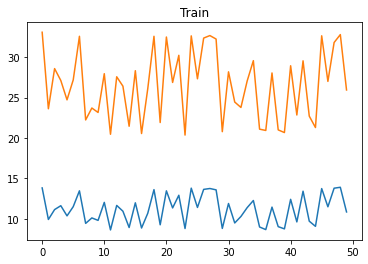

2/2 [==============================] - 0s 7ms/step


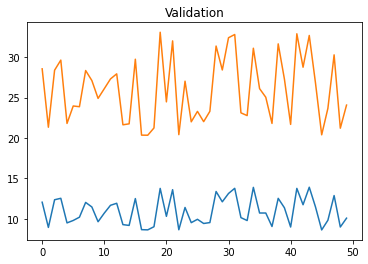

3/3 [==============================] - 0s 11ms/step


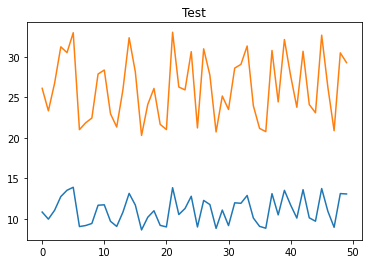

3/3 [==============================] - 0s 5ms/step


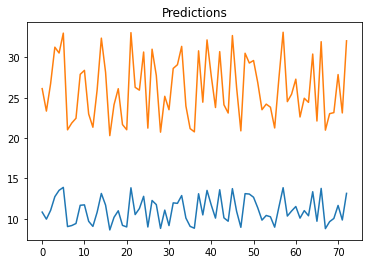

In [4]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 630.5453 - root_mean_squared_error: 25.1107

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 38s 4s/step - loss: 630.5000 - root_mean_squared_error: 25.1098 - val_loss: 662.0616 - val_root_mean_squared_error: 25.7306
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 626.0035 - root_mean_squared_error: 25.0201

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 2s/step - loss: 626.0035 - root_mean_squared_error: 25.0201 - val_loss: 657.4948 - val_root_mean_squared_error: 25.6417
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 619.5978 - root_mean_squared_error: 24.8917

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 56s 8s/step - loss: 621.5422 - root_mean_squared_error: 24.9307 - val_loss: 652.9496 - val_root_mean_squared_error: 25.5529
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 623.5578 - root_mean_squared_error: 24.9711

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 53s 8s/step - loss: 617.1304 - root_mean_squared_error: 24.8421 - val_loss: 648.4153 - val_root_mean_squared_error: 25.4640
Epoch 5/30
5/8 [=================>............] - ETA: 0s - loss: 618.8676 - root_mean_squared_error: 24.8770

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 35s 5s/step - loss: 612.7023 - root_mean_squared_error: 24.7528 - val_loss: 643.9130 - val_root_mean_squared_error: 25.3754
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 599.7019 - root_mean_squared_error: 24.4888

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 608.2975 - root_mean_squared_error: 24.6637 - val_loss: 639.4286 - val_root_mean_squared_error: 25.2869
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 604.9903 - root_mean_squared_error: 24.5965

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 603.9062 - root_mean_squared_error: 24.5745 - val_loss: 634.9156 - val_root_mean_squared_error: 25.1975
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 599.4941 - root_mean_squared_error: 24.4846

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 599.4941 - root_mean_squared_error: 24.4846 - val_loss: 630.4060 - val_root_mean_squared_error: 25.1079
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 599.6873 - root_mean_squared_error: 24.4885

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 595.0784 - root_mean_squared_error: 24.3942 - val_loss: 625.8879 - val_root_mean_squared_error: 25.0178
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 589.5624 - root_mean_squared_error: 24.2809

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 590.6449 - root_mean_squared_error: 24.3032 - val_loss: 621.3550 - val_root_mean_squared_error: 24.9270
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 588.2665 - root_mean_squared_error: 24.2542

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 586.1974 - root_mean_squared_error: 24.2115 - val_loss: 616.8094 - val_root_mean_squared_error: 24.8356
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 564.6316 - root_mean_squared_error: 23.7620

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 581.7468 - root_mean_squared_error: 24.1194 - val_loss: 612.2535 - val_root_mean_squared_error: 24.7438
Epoch 13/30
5/8 [=================>............] - ETA: 0s - loss: 596.7570 - root_mean_squared_error: 24.4286

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 577.2931 - root_mean_squared_error: 24.0269 - val_loss: 607.6733 - val_root_mean_squared_error: 24.6510
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 575.3400 - root_mean_squared_error: 23.9862

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 572.7866 - root_mean_squared_error: 23.9330 - val_loss: 603.0831 - val_root_mean_squared_error: 24.5577
Epoch 15/30
6/8 [=====================>........] - ETA: 0s - loss: 568.0588 - root_mean_squared_error: 23.8340

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 568.2677 - root_mean_squared_error: 23.8384 - val_loss: 598.4526 - val_root_mean_squared_error: 24.4633
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 590.5825 - root_mean_squared_error: 24.3019

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 563.7119 - root_mean_squared_error: 23.7426 - val_loss: 593.7746 - val_root_mean_squared_error: 24.3675
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 556.6725 - root_mean_squared_error: 23.5939

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 559.1083 - root_mean_squared_error: 23.6455 - val_loss: 589.0677 - val_root_mean_squared_error: 24.2707
Epoch 18/30
5/8 [=================>............] - ETA: 0s - loss: 578.0776 - root_mean_squared_error: 24.0432

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 554.4841 - root_mean_squared_error: 23.5475 - val_loss: 584.3062 - val_root_mean_squared_error: 24.1724
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 549.7826 - root_mean_squared_error: 23.4474

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 549.7826 - root_mean_squared_error: 23.4474 - val_loss: 579.5026 - val_root_mean_squared_error: 24.0729
Epoch 20/30
5/8 [=================>............] - ETA: 0s - loss: 541.4300 - root_mean_squared_error: 23.2686

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 545.0327 - root_mean_squared_error: 23.3459 - val_loss: 574.6310 - val_root_mean_squared_error: 23.9715
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 473.9415 - root_mean_squared_error: 21.7702

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 540.2098 - root_mean_squared_error: 23.2424 - val_loss: 569.6815 - val_root_mean_squared_error: 23.8680
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 531.2206 - root_mean_squared_error: 23.0482

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 535.3316 - root_mean_squared_error: 23.1372 - val_loss: 564.6542 - val_root_mean_squared_error: 23.7625
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 530.3667 - root_mean_squared_error: 23.0297

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 15s 2s/step - loss: 530.3667 - root_mean_squared_error: 23.0297 - val_loss: 559.5403 - val_root_mean_squared_error: 23.6546
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 504.4796 - root_mean_squared_error: 22.4606

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 525.3093 - root_mean_squared_error: 22.9196 - val_loss: 554.3680 - val_root_mean_squared_error: 23.5450
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 520.1968 - root_mean_squared_error: 22.8078

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 520.1968 - root_mean_squared_error: 22.8078 - val_loss: 549.1040 - val_root_mean_squared_error: 23.4330
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 517.1899 - root_mean_squared_error: 22.7418

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 13s 2s/step - loss: 514.9948 - root_mean_squared_error: 22.6935 - val_loss: 543.7554 - val_root_mean_squared_error: 23.3186
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 510.1660 - root_mean_squared_error: 22.5869

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 14s 2s/step - loss: 509.6855 - root_mean_squared_error: 22.5762 - val_loss: 538.2982 - val_root_mean_squared_error: 23.2013
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 509.3419 - root_mean_squared_error: 22.5686

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 504.2699 - root_mean_squared_error: 22.4560 - val_loss: 532.7092 - val_root_mean_squared_error: 23.0805
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 498.7342 - root_mean_squared_error: 22.3324

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 11s 2s/step - loss: 498.7342 - root_mean_squared_error: 22.3324 - val_loss: 526.9721 - val_root_mean_squared_error: 22.9559
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 490.3736 - root_mean_squared_error: 22.1444

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 2s 6ms/step


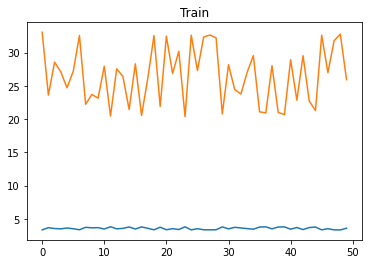

2/2 [==============================] - 2s 5ms/step


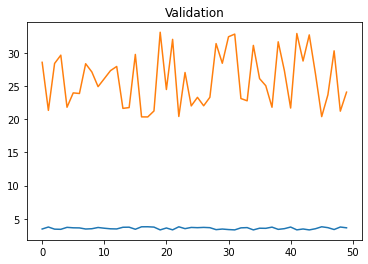

3/3 [==============================] - 0s 5ms/step


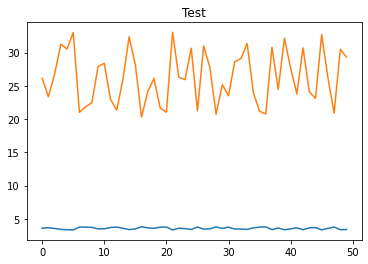

3/3 [==============================] - 0s 3ms/step


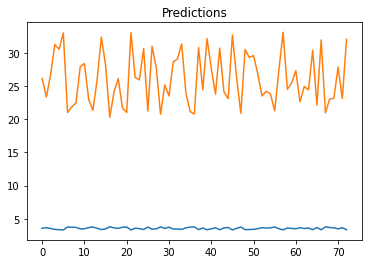

In [5]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 671.1321 - root_mean_squared_error: 25.9062  

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 3s/step - loss: 663.4927 - root_mean_squared_error: 25.7584 - val_loss: 697.5191 - val_root_mean_squared_error: 26.4106
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 661.2816 - root_mean_squared_error: 25.7154

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 661.2816 - root_mean_squared_error: 25.7154 - val_loss: 695.2768 - val_root_mean_squared_error: 26.3681
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 659.0876 - root_mean_squared_error: 25.6727

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 659.0876 - root_mean_squared_error: 25.6727 - val_loss: 693.0419 - val_root_mean_squared_error: 26.3257
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 657.8948 - root_mean_squared_error: 25.6495

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 656.8975 - root_mean_squared_error: 25.6300 - val_loss: 690.8201 - val_root_mean_squared_error: 26.2835
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 648.9290 - root_mean_squared_error: 25.4741

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 654.7169 - root_mean_squared_error: 25.5874 - val_loss: 688.5975 - val_root_mean_squared_error: 26.2411
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 643.9836 - root_mean_squared_error: 25.3768

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 652.5280 - root_mean_squared_error: 25.5446 - val_loss: 686.3633 - val_root_mean_squared_error: 26.1985
Epoch 7/30
5/8 [=================>............] - ETA: 0s - loss: 653.8317 - root_mean_squared_error: 25.5701

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 650.3348 - root_mean_squared_error: 25.5017 - val_loss: 684.1171 - val_root_mean_squared_error: 26.1556
Epoch 8/30
5/8 [=================>............] - ETA: 0s - loss: 655.7859 - root_mean_squared_error: 25.6083

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 648.1256 - root_mean_squared_error: 25.4583 - val_loss: 681.8578 - val_root_mean_squared_error: 26.1124
Epoch 9/30
4/8 [==============>...............] - ETA: 0s - loss: 659.8674 - root_mean_squared_error: 25.6879

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 645.9039 - root_mean_squared_error: 25.4146 - val_loss: 679.5746 - val_root_mean_squared_error: 26.0687
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 641.2134 - root_mean_squared_error: 25.3222

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 643.6468 - root_mean_squared_error: 25.3702 - val_loss: 677.2682 - val_root_mean_squared_error: 26.0244
Epoch 11/30
5/8 [=================>............] - ETA: 0s - loss: 648.8564 - root_mean_squared_error: 25.4727

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 641.3686 - root_mean_squared_error: 25.3253 - val_loss: 674.9111 - val_root_mean_squared_error: 25.9790
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 639.0336 - root_mean_squared_error: 25.2791

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 18s 3s/step - loss: 639.0336 - root_mean_squared_error: 25.2791 - val_loss: 672.5178 - val_root_mean_squared_error: 25.9329
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 640.1350 - root_mean_squared_error: 25.3009

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 636.6623 - root_mean_squared_error: 25.2322 - val_loss: 670.0662 - val_root_mean_squared_error: 25.8856
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 634.3026 - root_mean_squared_error: 25.1854

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 14s 2s/step - loss: 634.3026 - root_mean_squared_error: 25.1854 - val_loss: 667.9097 - val_root_mean_squared_error: 25.8440
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 609.0047 - root_mean_squared_error: 24.6780

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 632.4974 - root_mean_squared_error: 25.1495 - val_loss: 666.2881 - val_root_mean_squared_error: 25.8126
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 646.4753 - root_mean_squared_error: 25.4259

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 631.0744 - root_mean_squared_error: 25.1212 - val_loss: 664.9164 - val_root_mean_squared_error: 25.7860
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 629.7405 - root_mean_squared_error: 25.0946

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 629.7405 - root_mean_squared_error: 25.0946 - val_loss: 663.5556 - val_root_mean_squared_error: 25.7596
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 628.3959 - root_mean_squared_error: 25.0678

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 628.3959 - root_mean_squared_error: 25.0678 - val_loss: 662.1758 - val_root_mean_squared_error: 25.7328
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 627.0181 - root_mean_squared_error: 25.0403

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 627.0181 - root_mean_squared_error: 25.0403 - val_loss: 660.7642 - val_root_mean_squared_error: 25.7053
Epoch 20/30
5/8 [=================>............] - ETA: 0s - loss: 621.4509 - root_mean_squared_error: 24.9289

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 625.6033 - root_mean_squared_error: 25.0121 - val_loss: 659.3109 - val_root_mean_squared_error: 25.6770
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 622.7722 - root_mean_squared_error: 24.9554

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 624.1469 - root_mean_squared_error: 24.9829 - val_loss: 657.8016 - val_root_mean_squared_error: 25.6476
Epoch 22/30
6/8 [=====================>........] - ETA: 0s - loss: 624.5783 - root_mean_squared_error: 24.9916

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 622.6331 - root_mean_squared_error: 24.9526 - val_loss: 656.2205 - val_root_mean_squared_error: 25.6168
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 621.0417 - root_mean_squared_error: 24.9207

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 621.0417 - root_mean_squared_error: 24.9207 - val_loss: 654.5604 - val_root_mean_squared_error: 25.5844
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 697.9286 - root_mean_squared_error: 26.4183

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 619.3773 - root_mean_squared_error: 24.8873 - val_loss: 652.8146 - val_root_mean_squared_error: 25.5502
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 618.5289 - root_mean_squared_error: 24.8702

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 617.6173 - root_mean_squared_error: 24.8519 - val_loss: 650.9714 - val_root_mean_squared_error: 25.5141
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 615.7576 - root_mean_squared_error: 24.8145

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 615.7576 - root_mean_squared_error: 24.8145 - val_loss: 649.0250 - val_root_mean_squared_error: 25.4760
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 643.2019 - root_mean_squared_error: 25.3614

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 613.7927 - root_mean_squared_error: 24.7748 - val_loss: 646.9609 - val_root_mean_squared_error: 25.4354
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 623.0574 - root_mean_squared_error: 24.9611

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 611.7107 - root_mean_squared_error: 24.7328 - val_loss: 644.7633 - val_root_mean_squared_error: 25.3922
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 609.4924 - root_mean_squared_error: 24.6879

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 609.4924 - root_mean_squared_error: 24.6879 - val_loss: 642.4252 - val_root_mean_squared_error: 25.3461
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 607.1422 - root_mean_squared_error: 24.6403

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 2s 4ms/step


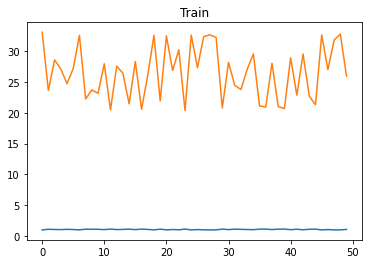

2/2 [==============================] - 1s 7ms/step


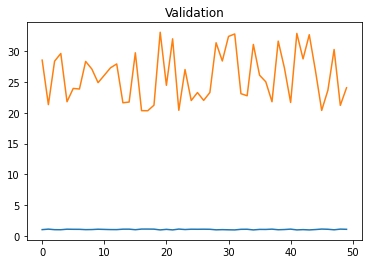

3/3 [==============================] - 0s 4ms/step


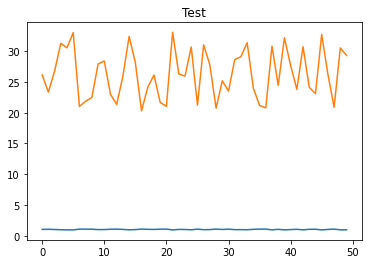

3/3 [==============================] - 0s 4ms/step


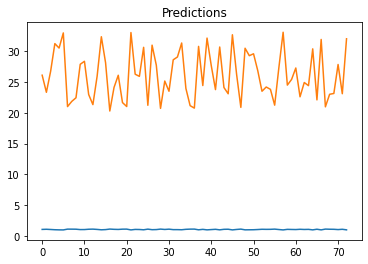

In [6]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/30
1/8 [==>...........................] - ETA: 25s - loss: 640.5491 - root_mean_squared_error: 25.3091INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 14s 1s/step - loss: 657.5839 - root_mean_squared_error: 25.6434 - val_loss: 689.3019 - val_root_mean_squared_error: 26.2546
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 634.9553 - root_mean_squared_error: 25.1983INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 767ms/step - loss: 651.1669 - root_mean_squared_error: 25.5180 - val_loss: 682.8987 - val_root_mean_squared_error: 26.1323
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 650.6062 - root_mean_squared_error: 25.5070INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 939ms/step - loss: 644.9293 - root_mean_squared_error: 25.3955 - val_loss: 676.6530 - val_root_mean_squared_error: 26.0126
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 629.4057 - root_mean_squared_error: 25.0880INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 916ms/step - loss: 638.8546 - root_mean_squared_error: 25.2756 - val_loss: 670.5691 - val_root_mean_squared_error: 25.8953
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 633.3247 - root_mean_squared_error: 25.1659INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 632.9305 - root_mean_squared_error: 25.1581 - val_loss: 664.6381 - val_root_mean_squared_error: 25.7806
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 624.3923 - root_mean_squared_error: 24.9878INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 866ms/step - loss: 627.1607 - root_mean_squared_error: 25.0432 - val_loss: 658.8033 - val_root_mean_squared_error: 25.6672
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 602.1138 - root_mean_squared_error: 24.5380INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 881ms/step - loss: 621.4547 - root_mean_squared_error: 24.9290 - val_loss: 653.0427 - val_root_mean_squared_error: 25.5547
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 608.0757 - root_mean_squared_error: 24.6592INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 989ms/step - loss: 615.8211 - root_mean_squared_error: 24.8157 - val_loss: 647.2993 - val_root_mean_squared_error: 25.4421
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 591.8013 - root_mean_squared_error: 24.3270INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 983ms/step - loss: 610.1591 - root_mean_squared_error: 24.7014 - val_loss: 641.5076 - val_root_mean_squared_error: 25.3280
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 604.4859 - root_mean_squared_error: 24.5863INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 604.4190 - root_mean_squared_error: 24.5849 - val_loss: 635.5847 - val_root_mean_squared_error: 25.2108
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 598.5217 - root_mean_squared_error: 24.4647INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 786ms/step - loss: 598.5217 - root_mean_squared_error: 24.4647 - val_loss: 629.4636 - val_root_mean_squared_error: 25.0891
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 597.7672 - root_mean_squared_error: 24.4493INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 592.4007 - root_mean_squared_error: 24.3393 - val_loss: 623.0609 - val_root_mean_squared_error: 24.9612
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 550.1179 - root_mean_squared_error: 23.4546INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 739ms/step - loss: 585.9419 - root_mean_squared_error: 24.2062 - val_loss: 616.2949 - val_root_mean_squared_error: 24.8253
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 579.3878 - root_mean_squared_error: 24.0705INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 913ms/step - loss: 579.0885 - root_mean_squared_error: 24.0643 - val_loss: 609.0123 - val_root_mean_squared_error: 24.6782
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 550.7742 - root_mean_squared_error: 23.4686INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 764ms/step - loss: 571.7015 - root_mean_squared_error: 23.9103 - val_loss: 601.1451 - val_root_mean_squared_error: 24.5183
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 506.7735 - root_mean_squared_error: 22.5116INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 811ms/step - loss: 563.7269 - root_mean_squared_error: 23.7429 - val_loss: 592.6431 - val_root_mean_squared_error: 24.3443
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 565.1832 - root_mean_squared_error: 23.7736INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 758ms/step - loss: 555.1352 - root_mean_squared_error: 23.5613 - val_loss: 583.5203 - val_root_mean_squared_error: 24.1562
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 519.8196 - root_mean_squared_error: 22.7996INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 545.9793 - root_mean_squared_error: 23.3662 - val_loss: 573.8615 - val_root_mean_squared_error: 23.9554
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 513.7966 - root_mean_squared_error: 22.6671INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 857ms/step - loss: 536.3365 - root_mean_squared_error: 23.1589 - val_loss: 563.8872 - val_root_mean_squared_error: 23.7463
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 492.8607 - root_mean_squared_error: 22.2005INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 708ms/step - loss: 526.5449 - root_mean_squared_error: 22.9466 - val_loss: 553.8401 - val_root_mean_squared_error: 23.5338
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 494.5161 - root_mean_squared_error: 22.2377INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 670ms/step - loss: 516.8080 - root_mean_squared_error: 22.7334 - val_loss: 544.0063 - val_root_mean_squared_error: 23.3239
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 507.3829 - root_mean_squared_error: 22.5252INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 887ms/step - loss: 507.3829 - root_mean_squared_error: 22.5252 - val_loss: 534.6005 - val_root_mean_squared_error: 23.1214
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 506.1471 - root_mean_squared_error: 22.4977INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 899ms/step - loss: 498.5034 - root_mean_squared_error: 22.3272 - val_loss: 525.8570 - val_root_mean_squared_error: 22.9316
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 501.6386 - root_mean_squared_error: 22.3973INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 5s 701ms/step - loss: 490.2821 - root_mean_squared_error: 22.1423 - val_loss: 517.6988 - val_root_mean_squared_error: 22.7530
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 486.4818 - root_mean_squared_error: 22.0563INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 619ms/step - loss: 482.5711 - root_mean_squared_error: 21.9675 - val_loss: 510.0383 - val_root_mean_squared_error: 22.5840
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 433.7426 - root_mean_squared_error: 20.8265INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 997ms/step - loss: 475.3353 - root_mean_squared_error: 21.8022 - val_loss: 502.8723 - val_root_mean_squared_error: 22.4248
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 468.5409 - root_mean_squared_error: 21.6458INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 572ms/step - loss: 468.5409 - root_mean_squared_error: 21.6458 - val_loss: 495.9294 - val_root_mean_squared_error: 22.2695
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 475.2845 - root_mean_squared_error: 21.8010INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 532ms/step - loss: 461.9042 - root_mean_squared_error: 21.4920 - val_loss: 489.2223 - val_root_mean_squared_error: 22.1184
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 436.5991 - root_mean_squared_error: 20.8950INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 4s 637ms/step - loss: 455.4258 - root_mean_squared_error: 21.3407 - val_loss: 482.5479 - val_root_mean_squared_error: 21.9670
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 436.6474 - root_mean_squared_error: 20.8961INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 0s 4ms/step


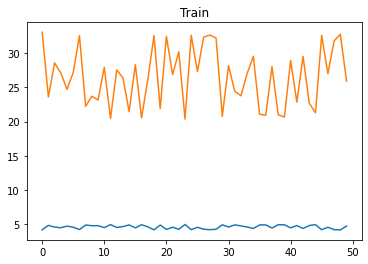

2/2 [==============================] - 1s 4ms/step


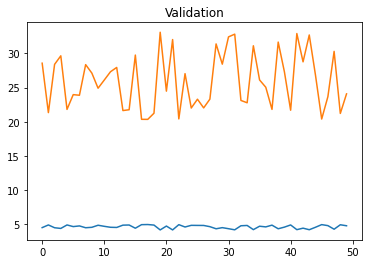

3/3 [==============================] - 0s 4ms/step


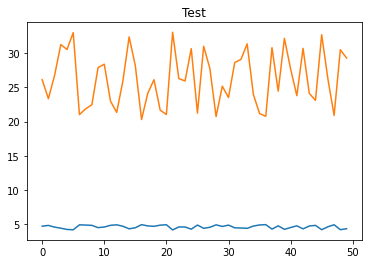

3/3 [==============================] - 0s 4ms/step


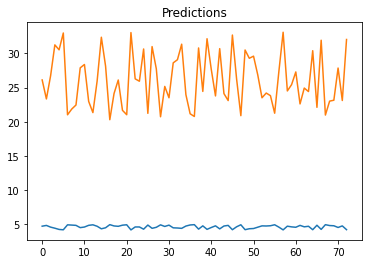

In [7]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/30
1/8 [==>...........................] - ETA: 9s - loss: 699.5142 - root_mean_squared_error: 26.4483

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 400ms/step - loss: 670.6494 - root_mean_squared_error: 25.8969 - val_loss: 677.0323 - val_root_mean_squared_error: 26.0198
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 621.2987 - root_mean_squared_error: 24.9259

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 257ms/step - loss: 621.2987 - root_mean_squared_error: 24.9259 - val_loss: 628.7811 - val_root_mean_squared_error: 25.0755
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 603.8098 - root_mean_squared_error: 24.5725

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 242ms/step - loss: 581.0785 - root_mean_squared_error: 24.1056 - val_loss: 588.7505 - val_root_mean_squared_error: 24.2642
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 483.4574 - root_mean_squared_error: 21.9877

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 243ms/step - loss: 544.2350 - root_mean_squared_error: 23.3288 - val_loss: 550.6646 - val_root_mean_squared_error: 23.4662
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 521.1398 - root_mean_squared_error: 22.8285

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 279ms/step - loss: 509.3691 - root_mean_squared_error: 22.5692 - val_loss: 513.9478 - val_root_mean_squared_error: 22.6704
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 498.8839 - root_mean_squared_error: 22.3357

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 369ms/step - loss: 476.3078 - root_mean_squared_error: 21.8245 - val_loss: 481.2934 - val_root_mean_squared_error: 21.9384
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 445.6944 - root_mean_squared_error: 21.1115

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 302ms/step - loss: 446.8283 - root_mean_squared_error: 21.1383 - val_loss: 450.6780 - val_root_mean_squared_error: 21.2292
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 419.2727 - root_mean_squared_error: 20.4761

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 320ms/step - loss: 418.7246 - root_mean_squared_error: 20.4628 - val_loss: 421.3964 - val_root_mean_squared_error: 20.5279
Epoch 9/30
1/8 [==>...........................] - ETA: 0s - loss: 388.6043 - root_mean_squared_error: 19.7130

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 299ms/step - loss: 391.9175 - root_mean_squared_error: 19.7969 - val_loss: 393.6222 - val_root_mean_squared_error: 19.8399
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 398.1634 - root_mean_squared_error: 19.9540

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 289ms/step - loss: 366.4159 - root_mean_squared_error: 19.1420 - val_loss: 367.3018 - val_root_mean_squared_error: 19.1651
Epoch 11/30
1/8 [==>...........................] - ETA: 0s - loss: 378.0981 - root_mean_squared_error: 19.4447

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 374ms/step - loss: 342.1555 - root_mean_squared_error: 18.4974 - val_loss: 342.0859 - val_root_mean_squared_error: 18.4956
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 343.2966 - root_mean_squared_error: 18.5283

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 293ms/step - loss: 318.9988 - root_mean_squared_error: 17.8605 - val_loss: 317.8171 - val_root_mean_squared_error: 17.8274
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 292.3442 - root_mean_squared_error: 17.0981

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 310ms/step - loss: 296.7667 - root_mean_squared_error: 17.2269 - val_loss: 294.6492 - val_root_mean_squared_error: 17.1653
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 273.3600 - root_mean_squared_error: 16.5336

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 349ms/step - loss: 276.6674 - root_mean_squared_error: 16.6333 - val_loss: 276.8528 - val_root_mean_squared_error: 16.6389
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 264.3407 - root_mean_squared_error: 16.2586

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 360ms/step - loss: 261.9506 - root_mean_squared_error: 16.1849 - val_loss: 261.6482 - val_root_mean_squared_error: 16.1755
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 247.8595 - root_mean_squared_error: 15.7436

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 295ms/step - loss: 247.8595 - root_mean_squared_error: 15.7436 - val_loss: 246.8504 - val_root_mean_squared_error: 15.7115
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 283.3445 - root_mean_squared_error: 16.8328

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 298ms/step - loss: 234.2124 - root_mean_squared_error: 15.3040 - val_loss: 232.2966 - val_root_mean_squared_error: 15.2413
Epoch 18/30
1/8 [==>...........................] - ETA: 0s - loss: 245.4120 - root_mean_squared_error: 15.6656

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 275ms/step - loss: 220.8338 - root_mean_squared_error: 14.8605 - val_loss: 218.2800 - val_root_mean_squared_error: 14.7743
Epoch 19/30
1/8 [==>...........................] - ETA: 0s - loss: 214.8763 - root_mean_squared_error: 14.6587

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 252ms/step - loss: 207.9027 - root_mean_squared_error: 14.4188 - val_loss: 204.7786 - val_root_mean_squared_error: 14.3101
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 183.7923 - root_mean_squared_error: 13.5570

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 237ms/step - loss: 195.5900 - root_mean_squared_error: 13.9853 - val_loss: 192.2227 - val_root_mean_squared_error: 13.8644
Epoch 21/30
1/8 [==>...........................] - ETA: 0s - loss: 203.6880 - root_mean_squared_error: 14.2719

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 232ms/step - loss: 183.9960 - root_mean_squared_error: 13.5645 - val_loss: 180.0929 - val_root_mean_squared_error: 13.4199
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 175.0756 - root_mean_squared_error: 13.2316

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 260ms/step - loss: 172.7714 - root_mean_squared_error: 13.1443 - val_loss: 168.2745 - val_root_mean_squared_error: 12.9721
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 160.7094 - root_mean_squared_error: 12.6771

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 232ms/step - loss: 162.0044 - root_mean_squared_error: 12.7281 - val_loss: 156.9827 - val_root_mean_squared_error: 12.5293
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 138.0895 - root_mean_squared_error: 11.7512

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 348ms/step - loss: 151.6878 - root_mean_squared_error: 12.3162 - val_loss: 146.4316 - val_root_mean_squared_error: 12.1009
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 167.0979 - root_mean_squared_error: 12.9266

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 280ms/step - loss: 142.0808 - root_mean_squared_error: 11.9198 - val_loss: 136.3575 - val_root_mean_squared_error: 11.6772
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 132.8319 - root_mean_squared_error: 11.5253

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 318ms/step - loss: 132.8319 - root_mean_squared_error: 11.5253 - val_loss: 126.7004 - val_root_mean_squared_error: 11.2561
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 122.0691 - root_mean_squared_error: 11.0485

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 363ms/step - loss: 123.9499 - root_mean_squared_error: 11.1333 - val_loss: 117.4778 - val_root_mean_squared_error: 10.8387
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 121.8382 - root_mean_squared_error: 11.0380

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 286ms/step - loss: 115.5620 - root_mean_squared_error: 10.7500 - val_loss: 108.7128 - val_root_mean_squared_error: 10.4265
Epoch 29/30
1/8 [==>...........................] - ETA: 0s - loss: 102.5762 - root_mean_squared_error: 10.1280

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 356ms/step - loss: 107.5671 - root_mean_squared_error: 10.3715 - val_loss: 100.4561 - val_root_mean_squared_error: 10.0228
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 100.0771 - root_mean_squared_error: 10.0039

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 1s 3ms/step


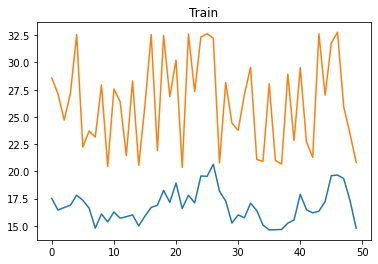

2/2 [==============================] - 0s 4ms/step


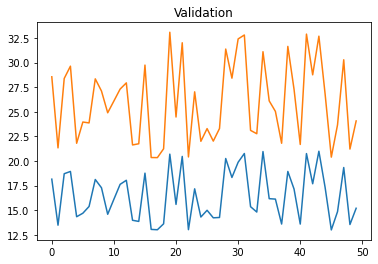

3/3 [==============================] - 0s 13ms/step


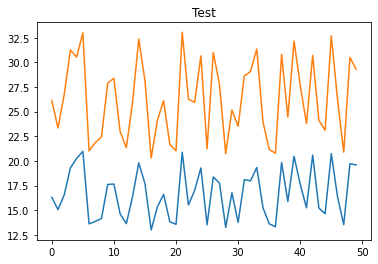

3/3 [==============================] - 0s 7ms/step


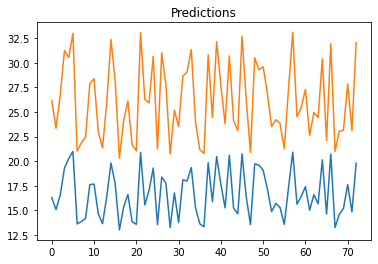

In [9]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 643.8352 - root_mean_squared_error: 25.3739

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 33s 3s/step - loss: 643.8352 - root_mean_squared_error: 25.3739 - val_loss: 676.6119 - val_root_mean_squared_error: 26.0118
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 635.5748 - root_mean_squared_error: 25.2106

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 637.7136 - root_mean_squared_error: 25.2530 - val_loss: 670.4285 - val_root_mean_squared_error: 25.8926
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 631.6236 - root_mean_squared_error: 25.1321

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 631.6236 - root_mean_squared_error: 25.1321 - val_loss: 664.2745 - val_root_mean_squared_error: 25.7735
Epoch 4/30
6/8 [=====================>........] - ETA: 0s - loss: 626.4606 - root_mean_squared_error: 25.0292

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 14s 2s/step - loss: 625.5910 - root_mean_squared_error: 25.0118 - val_loss: 658.1818 - val_root_mean_squared_error: 25.6551
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 617.8761 - root_mean_squared_error: 24.8571

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 10s 1s/step - loss: 619.5503 - root_mean_squared_error: 24.8908 - val_loss: 652.1210 - val_root_mean_squared_error: 25.5367
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 614.0082 - root_mean_squared_error: 24.7792

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 613.5932 - root_mean_squared_error: 24.7708 - val_loss: 646.0447 - val_root_mean_squared_error: 25.4174
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 606.1066 - root_mean_squared_error: 24.6192

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 607.5808 - root_mean_squared_error: 24.6492 - val_loss: 640.0040 - val_root_mean_squared_error: 25.2983
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 598.1237 - root_mean_squared_error: 24.4566

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 601.6469 - root_mean_squared_error: 24.5285 - val_loss: 633.9294 - val_root_mean_squared_error: 25.1780
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 595.6397 - root_mean_squared_error: 24.4057

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 595.6397 - root_mean_squared_error: 24.4057 - val_loss: 627.8336 - val_root_mean_squared_error: 25.0566
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 591.1654 - root_mean_squared_error: 24.3139

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 589.6576 - root_mean_squared_error: 24.2829 - val_loss: 621.7540 - val_root_mean_squared_error: 24.9350
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 582.7009 - root_mean_squared_error: 24.1392

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 583.6591 - root_mean_squared_error: 24.1590 - val_loss: 615.6762 - val_root_mean_squared_error: 24.8128
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 577.6781 - root_mean_squared_error: 24.0349

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 577.6781 - root_mean_squared_error: 24.0349 - val_loss: 609.5346 - val_root_mean_squared_error: 24.6888
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 571.6395 - root_mean_squared_error: 23.9090

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 571.6395 - root_mean_squared_error: 23.9090 - val_loss: 603.3339 - val_root_mean_squared_error: 24.5629
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 613.9020 - root_mean_squared_error: 24.7770

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 565.5316 - root_mean_squared_error: 23.7809 - val_loss: 597.1334 - val_root_mean_squared_error: 24.4363
Epoch 15/30
4/8 [==============>...............] - ETA: 0s - loss: 554.4514 - root_mean_squared_error: 23.5468

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 559.4224 - root_mean_squared_error: 23.6521 - val_loss: 590.8683 - val_root_mean_squared_error: 24.3078
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 555.0034 - root_mean_squared_error: 23.5585

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 553.2551 - root_mean_squared_error: 23.5214 - val_loss: 584.6003 - val_root_mean_squared_error: 24.1785
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 548.4609 - root_mean_squared_error: 23.4192

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 547.1049 - root_mean_squared_error: 23.3903 - val_loss: 578.2687 - val_root_mean_squared_error: 24.0472
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 551.3314 - root_mean_squared_error: 23.4804

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 540.8871 - root_mean_squared_error: 23.2570 - val_loss: 571.8683 - val_root_mean_squared_error: 23.9138
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 534.5745 - root_mean_squared_error: 23.1209

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 534.5745 - root_mean_squared_error: 23.1209 - val_loss: 565.3808 - val_root_mean_squared_error: 23.7777
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 552.1869 - root_mean_squared_error: 23.4987

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 528.1842 - root_mean_squared_error: 22.9823 - val_loss: 558.8508 - val_root_mean_squared_error: 23.6400
Epoch 21/30
4/8 [==============>...............] - ETA: 0s - loss: 517.0553 - root_mean_squared_error: 22.7388

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 521.7529 - root_mean_squared_error: 22.8419 - val_loss: 552.2213 - val_root_mean_squared_error: 23.4994
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 514.4606 - root_mean_squared_error: 22.6817

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 515.2437 - root_mean_squared_error: 22.6990 - val_loss: 545.5148 - val_root_mean_squared_error: 23.3563
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 508.8604 - root_mean_squared_error: 22.5579

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 508.6452 - root_mean_squared_error: 22.5532 - val_loss: 538.7506 - val_root_mean_squared_error: 23.2110
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 504.6920 - root_mean_squared_error: 22.4654

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 501.9951 - root_mean_squared_error: 22.4052 - val_loss: 531.9184 - val_root_mean_squared_error: 23.0634
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 495.2566 - root_mean_squared_error: 22.2544

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 495.2566 - root_mean_squared_error: 22.2544 - val_loss: 525.0175 - val_root_mean_squared_error: 22.9133
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 488.4672 - root_mean_squared_error: 22.1013

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 488.4672 - root_mean_squared_error: 22.1013 - val_loss: 518.0102 - val_root_mean_squared_error: 22.7598
Epoch 27/30
4/8 [==============>...............] - ETA: 0s - loss: 481.3304 - root_mean_squared_error: 21.9392

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 481.5323 - root_mean_squared_error: 21.9438 - val_loss: 510.9128 - val_root_mean_squared_error: 22.6034
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 474.3608 - root_mean_squared_error: 21.7798

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 11s 2s/step - loss: 474.5189 - root_mean_squared_error: 21.7835 - val_loss: 503.6598 - val_root_mean_squared_error: 22.4424
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 478.3720 - root_mean_squared_error: 21.8717

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 467.3693 - root_mean_squared_error: 21.6187 - val_loss: 496.2509 - val_root_mean_squared_error: 22.2767
Epoch 30/30
2/8 [======>.......................] - ETA: 5s - loss: 463.3579 - root_mean_squared_error: 21.5257

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 2s 5ms/step


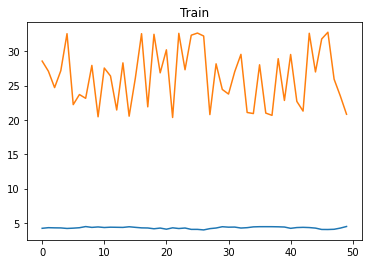

2/2 [==============================] - 2s 6ms/step


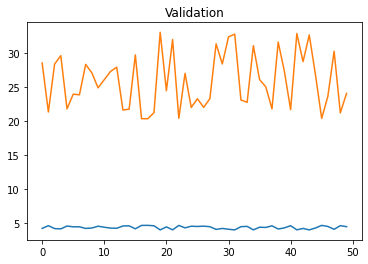

3/3 [==============================] - 0s 6ms/step


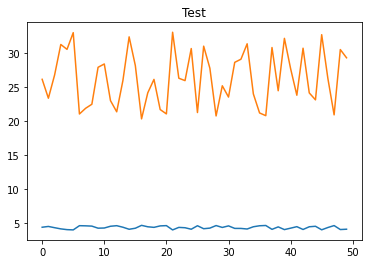

3/3 [==============================] - 0s 5ms/step


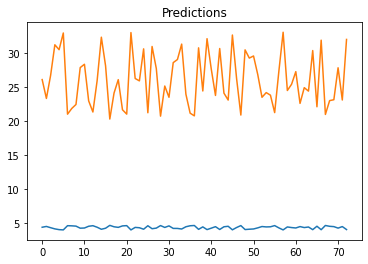

In [10]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 673.5942 - root_mean_squared_error: 25.9537  

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 3s/step - loss: 675.3675 - root_mean_squared_error: 25.9878 - val_loss: 710.2847 - val_root_mean_squared_error: 26.6512
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 671.9651 - root_mean_squared_error: 25.9223

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 672.0737 - root_mean_squared_error: 25.9244 - val_loss: 706.9344 - val_root_mean_squared_error: 26.5882
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 686.0450 - root_mean_squared_error: 26.1925

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 668.8240 - root_mean_squared_error: 25.8616 - val_loss: 703.6387 - val_root_mean_squared_error: 26.5262
Epoch 4/30
5/8 [=================>............] - ETA: 0s - loss: 665.4069 - root_mean_squared_error: 25.7955

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 13s 2s/step - loss: 665.6163 - root_mean_squared_error: 25.7995 - val_loss: 700.3945 - val_root_mean_squared_error: 26.4650
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 663.3655 - root_mean_squared_error: 25.7559

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 662.4620 - root_mean_squared_error: 25.7383 - val_loss: 697.1943 - val_root_mean_squared_error: 26.4044
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 656.8278 - root_mean_squared_error: 25.6287

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 659.3431 - root_mean_squared_error: 25.6777 - val_loss: 694.0042 - val_root_mean_squared_error: 26.3440
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 663.4258 - root_mean_squared_error: 25.7571

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 656.2255 - root_mean_squared_error: 25.6169 - val_loss: 691.5142 - val_root_mean_squared_error: 26.2967
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 654.4404 - root_mean_squared_error: 25.5820

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 654.4404 - root_mean_squared_error: 25.5820 - val_loss: 691.1241 - val_root_mean_squared_error: 26.2892
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 654.3068 - root_mean_squared_error: 25.5794

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 654.3068 - root_mean_squared_error: 25.5794 - val_loss: 690.9940 - val_root_mean_squared_error: 26.2868
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 634.3685 - root_mean_squared_error: 25.1867

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 654.1725 - root_mean_squared_error: 25.5768 - val_loss: 690.8471 - val_root_mean_squared_error: 26.2840
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 648.4016 - root_mean_squared_error: 25.4637

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 654.0248 - root_mean_squared_error: 25.5739 - val_loss: 690.6885 - val_root_mean_squared_error: 26.2810
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 653.8669 - root_mean_squared_error: 25.5708

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 653.8669 - root_mean_squared_error: 25.5708 - val_loss: 690.5215 - val_root_mean_squared_error: 26.2778
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 653.7008 - root_mean_squared_error: 25.5676

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 653.7008 - root_mean_squared_error: 25.5676 - val_loss: 690.3471 - val_root_mean_squared_error: 26.2745
Epoch 14/30
5/8 [=================>............] - ETA: 0s - loss: 657.1080 - root_mean_squared_error: 25.6341

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 653.5282 - root_mean_squared_error: 25.5642 - val_loss: 690.1654 - val_root_mean_squared_error: 26.2710
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 649.2032 - root_mean_squared_error: 25.4795

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 653.3484 - root_mean_squared_error: 25.5607 - val_loss: 689.9774 - val_root_mean_squared_error: 26.2674
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 648.2918 - root_mean_squared_error: 25.4616

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 653.1622 - root_mean_squared_error: 25.5570 - val_loss: 689.7827 - val_root_mean_squared_error: 26.2637
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 652.9697 - root_mean_squared_error: 25.5533

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 652.9697 - root_mean_squared_error: 25.5533 - val_loss: 689.5828 - val_root_mean_squared_error: 26.2599
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 652.7719 - root_mean_squared_error: 25.5494

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 652.7719 - root_mean_squared_error: 25.5494 - val_loss: 689.3757 - val_root_mean_squared_error: 26.2560
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 651.3140 - root_mean_squared_error: 25.5209

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 17s 2s/step - loss: 652.5668 - root_mean_squared_error: 25.5454 - val_loss: 689.1608 - val_root_mean_squared_error: 26.2519
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 651.2413 - root_mean_squared_error: 25.5194

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 652.3536 - root_mean_squared_error: 25.5412 - val_loss: 688.9379 - val_root_mean_squared_error: 26.2476
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 652.6974 - root_mean_squared_error: 25.5479

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 652.1317 - root_mean_squared_error: 25.5369 - val_loss: 688.7069 - val_root_mean_squared_error: 26.2432
Epoch 22/30
5/8 [=================>............] - ETA: 0s - loss: 660.8925 - root_mean_squared_error: 25.7078

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 651.9032 - root_mean_squared_error: 25.5324 - val_loss: 688.4661 - val_root_mean_squared_error: 26.2386
Epoch 23/30
6/8 [=====================>........] - ETA: 0s - loss: 645.0012 - root_mean_squared_error: 25.3969

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 651.6620 - root_mean_squared_error: 25.5277 - val_loss: 688.2148 - val_root_mean_squared_error: 26.2338
Epoch 24/30
5/8 [=================>............] - ETA: 0s - loss: 653.8961 - root_mean_squared_error: 25.5714

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 651.4121 - root_mean_squared_error: 25.5228 - val_loss: 687.9512 - val_root_mean_squared_error: 26.2288
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 647.8760 - root_mean_squared_error: 25.4534

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 651.1489 - root_mean_squared_error: 25.5176 - val_loss: 687.6742 - val_root_mean_squared_error: 26.2235
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 649.5445 - root_mean_squared_error: 25.4862

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 650.8703 - root_mean_squared_error: 25.5122 - val_loss: 687.3805 - val_root_mean_squared_error: 26.2179
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 658.0018 - root_mean_squared_error: 25.6515

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 650.5746 - root_mean_squared_error: 25.5064 - val_loss: 687.0679 - val_root_mean_squared_error: 26.2120
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 647.7665 - root_mean_squared_error: 25.4513

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 650.2584 - root_mean_squared_error: 25.5002 - val_loss: 686.7309 - val_root_mean_squared_error: 26.2056
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 657.6027 - root_mean_squared_error: 25.6438

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 649.9153 - root_mean_squared_error: 25.4934 - val_loss: 686.3620 - val_root_mean_squared_error: 26.1985
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 693.9934 - root_mean_squared_error: 26.3438

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 2s 6ms/step


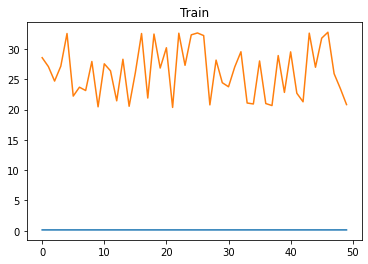

2/2 [==============================] - 2s 6ms/step


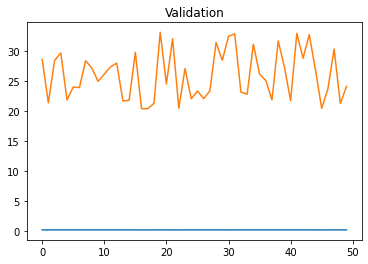

3/3 [==============================] - 0s 4ms/step


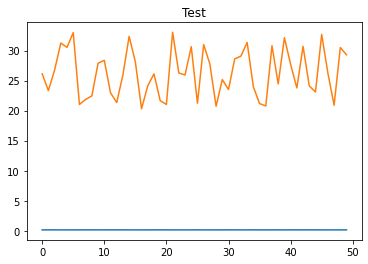

3/3 [==============================] - 0s 6ms/step


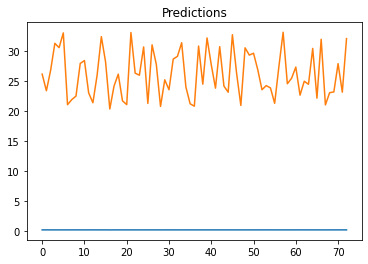

In [11]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 691.7394 - root_mean_squared_error: 26.3009 INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 1s/step - loss: 691.7394 - root_mean_squared_error: 26.3009 - val_loss: 724.3494 - val_root_mean_squared_error: 26.9137
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 685.2113 - root_mean_squared_error: 26.1765INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 685.2113 - root_mean_squared_error: 26.1765 - val_loss: 717.8886 - val_root_mean_squared_error: 26.7934
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 589.5115 - root_mean_squared_error: 24.2799INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 877ms/step - loss: 678.7512 - root_mean_squared_error: 26.0529 - val_loss: 711.5623 - val_root_mean_squared_error: 26.6751
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 672.4577 - root_mean_squared_error: 25.9318INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 672.4577 - root_mean_squared_error: 25.9318 - val_loss: 705.3292 - val_root_mean_squared_error: 26.5580
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 615.1453 - root_mean_squared_error: 24.8021INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 666.2358 - root_mean_squared_error: 25.8115 - val_loss: 699.2240 - val_root_mean_squared_error: 26.4428
Epoch 6/30
3/8 [==========>...................] - ETA: 0s - loss: 646.5668 - root_mean_squared_error: 25.4277INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 660.1719 - root_mean_squared_error: 25.6938 - val_loss: 693.1758 - val_root_mean_squared_error: 26.3282
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 653.4542 - root_mean_squared_error: 25.5627INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 790ms/step - loss: 654.1827 - root_mean_squared_error: 25.5770 - val_loss: 687.1129 - val_root_mean_squared_error: 26.2128
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 634.1609 - root_mean_squared_error: 25.1826INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 681ms/step - loss: 648.1151 - root_mean_squared_error: 25.4581 - val_loss: 680.9816 - val_root_mean_squared_error: 26.0956
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 642.0082 - root_mean_squared_error: 25.3379INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 974ms/step - loss: 642.0082 - root_mean_squared_error: 25.3379 - val_loss: 674.7003 - val_root_mean_squared_error: 25.9750
Epoch 10/30
1/8 [==>...........................] - ETA: 0s - loss: 641.8947 - root_mean_squared_error: 25.3356INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 635.6973 - root_mean_squared_error: 25.2130 - val_loss: 668.1740 - val_root_mean_squared_error: 25.8491
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 629.1508 - root_mean_squared_error: 25.0829INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 794ms/step - loss: 629.1508 - root_mean_squared_error: 25.0829 - val_loss: 661.3383 - val_root_mean_squared_error: 25.7165
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 617.1874 - root_mean_squared_error: 24.8433INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 811ms/step - loss: 622.2124 - root_mean_squared_error: 24.9442 - val_loss: 654.0722 - val_root_mean_squared_error: 25.5748
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 604.2684 - root_mean_squared_error: 24.5819INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 965ms/step - loss: 614.8428 - root_mean_squared_error: 24.7960 - val_loss: 646.1929 - val_root_mean_squared_error: 25.4203
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 606.8200 - root_mean_squared_error: 24.6337INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 913ms/step - loss: 606.8205 - root_mean_squared_error: 24.6337 - val_loss: 637.7767 - val_root_mean_squared_error: 25.2542
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 598.2764 - root_mean_squared_error: 24.4597INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 598.2764 - root_mean_squared_error: 24.4597 - val_loss: 628.7532 - val_root_mean_squared_error: 25.0750
Epoch 16/30
1/8 [==>...........................] - ETA: 0s - loss: 576.9301 - root_mean_squared_error: 24.0194INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 701ms/step - loss: 589.1575 - root_mean_squared_error: 24.2726 - val_loss: 619.3946 - val_root_mean_squared_error: 24.8876
Epoch 17/30
1/8 [==>...........................] - ETA: 0s - loss: 584.7576 - root_mean_squared_error: 24.1818INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 720ms/step - loss: 579.7800 - root_mean_squared_error: 24.0786 - val_loss: 609.9048 - val_root_mean_squared_error: 24.6963
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 569.8546 - root_mean_squared_error: 23.8716INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 751ms/step - loss: 570.2620 - root_mean_squared_error: 23.8802 - val_loss: 600.4420 - val_root_mean_squared_error: 24.5039
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 560.9930 - root_mean_squared_error: 23.6853INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 912ms/step - loss: 560.7501 - root_mean_squared_error: 23.6802 - val_loss: 590.9934 - val_root_mean_squared_error: 24.3104
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 551.1698 - root_mean_squared_error: 23.4770INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 733ms/step - loss: 551.1698 - root_mean_squared_error: 23.4770 - val_loss: 581.6051 - val_root_mean_squared_error: 24.1165
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 547.2675 - root_mean_squared_error: 23.3937INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 690ms/step - loss: 541.6873 - root_mean_squared_error: 23.2742 - val_loss: 572.3357 - val_root_mean_squared_error: 23.9235
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 516.3279 - root_mean_squared_error: 22.7229INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 717ms/step - loss: 532.3743 - root_mean_squared_error: 23.0732 - val_loss: 563.2470 - val_root_mean_squared_error: 23.7328
Epoch 23/30
1/8 [==>...........................] - ETA: 0s - loss: 505.3683 - root_mean_squared_error: 22.4804INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 523.4033 - root_mean_squared_error: 22.8780 - val_loss: 554.5299 - val_root_mean_squared_error: 23.5485
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 521.4855 - root_mean_squared_error: 22.8361INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 514.9522 - root_mean_squared_error: 22.6926 - val_loss: 546.1504 - val_root_mean_squared_error: 23.3699
Epoch 25/30
1/8 [==>...........................] - ETA: 0s - loss: 572.8749 - root_mean_squared_error: 23.9348INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 4s 587ms/step - loss: 506.8871 - root_mean_squared_error: 22.5142 - val_loss: 538.1040 - val_root_mean_squared_error: 23.1971
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 499.0824 - root_mean_squared_error: 22.3402INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 654ms/step - loss: 499.0824 - root_mean_squared_error: 22.3402 - val_loss: 530.3588 - val_root_mean_squared_error: 23.0295
Epoch 27/30
1/8 [==>...........................] - ETA: 0s - loss: 474.1744 - root_mean_squared_error: 21.7755INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 5s 774ms/step - loss: 491.5814 - root_mean_squared_error: 22.1716 - val_loss: 522.7775 - val_root_mean_squared_error: 22.8643
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 498.2806 - root_mean_squared_error: 22.3222INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 946ms/step - loss: 484.3258 - root_mean_squared_error: 22.0074 - val_loss: 515.4323 - val_root_mean_squared_error: 22.7031
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 477.2946 - root_mean_squared_error: 21.8471INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 477.2946 - root_mean_squared_error: 21.8471 - val_loss: 508.2540 - val_root_mean_squared_error: 22.5445
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 474.7849 - root_mean_squared_error: 21.7896INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 2s 174ms/step


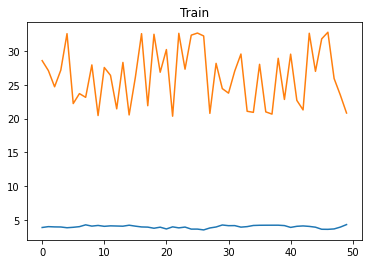

2/2 [==============================] - 1s 7ms/step


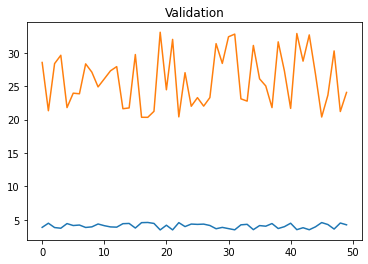

3/3 [==============================] - 0s 4ms/step


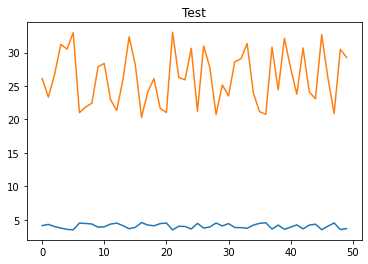

3/3 [==============================] - 0s 5ms/step


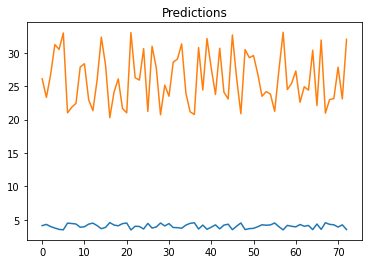

In [12]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(3, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 928.5969 - root_mean_squared_error: 30.4729

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 11s 806ms/step - loss: 928.5969 - root_mean_squared_error: 30.4729 - val_loss: 811.6270 - val_root_mean_squared_error: 28.4891
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 819.6377 - root_mean_squared_error: 28.6293

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 505ms/step - loss: 819.6377 - root_mean_squared_error: 28.6293 - val_loss: 651.3547 - val_root_mean_squared_error: 25.5217
Epoch 3/30
5/8 [=================>............] - ETA: 0s - loss: 700.5408 - root_mean_squared_error: 26.4677

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 706ms/step - loss: 704.9922 - root_mean_squared_error: 26.5517 - val_loss: 537.9818 - val_root_mean_squared_error: 23.1944
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 684.3652 - root_mean_squared_error: 26.1604

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 540ms/step - loss: 602.8206 - root_mean_squared_error: 24.5524 - val_loss: 476.1925 - val_root_mean_squared_error: 21.8218
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 527.7288 - root_mean_squared_error: 22.9723

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 871ms/step - loss: 525.8220 - root_mean_squared_error: 22.9308 - val_loss: 434.6483 - val_root_mean_squared_error: 20.8482
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 461.9197 - root_mean_squared_error: 21.4923

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 420ms/step - loss: 461.9197 - root_mean_squared_error: 21.4923 - val_loss: 393.1282 - val_root_mean_squared_error: 19.8275
Epoch 7/30
1/8 [==>...........................] - ETA: 0s - loss: 460.9795 - root_mean_squared_error: 21.4704

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 377ms/step - loss: 402.0663 - root_mean_squared_error: 20.0516 - val_loss: 352.6628 - val_root_mean_squared_error: 18.7793
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 361.4595 - root_mean_squared_error: 19.0121

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 566ms/step - loss: 360.1393 - root_mean_squared_error: 18.9773 - val_loss: 313.6983 - val_root_mean_squared_error: 17.7115
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 316.9403 - root_mean_squared_error: 17.8028

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 587ms/step - loss: 308.7406 - root_mean_squared_error: 17.5710 - val_loss: 276.3455 - val_root_mean_squared_error: 16.6236
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 278.9972 - root_mean_squared_error: 16.7032

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 272.9457 - root_mean_squared_error: 16.5211 - val_loss: 241.4288 - val_root_mean_squared_error: 15.5380
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 233.9578 - root_mean_squared_error: 15.2957

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 604ms/step - loss: 233.6612 - root_mean_squared_error: 15.2860 - val_loss: 208.8958 - val_root_mean_squared_error: 14.4532
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 200.4035 - root_mean_squared_error: 14.1564

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 518ms/step - loss: 201.0927 - root_mean_squared_error: 14.1807 - val_loss: 179.8350 - val_root_mean_squared_error: 13.4103
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 183.3572 - root_mean_squared_error: 13.5409

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 484ms/step - loss: 177.5483 - root_mean_squared_error: 13.3247 - val_loss: 152.9900 - val_root_mean_squared_error: 12.3689
Epoch 14/30
1/8 [==>...........................] - ETA: 0s - loss: 158.9093 - root_mean_squared_error: 12.6059

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 585ms/step - loss: 148.2505 - root_mean_squared_error: 12.1758 - val_loss: 129.3927 - val_root_mean_squared_error: 11.3751
Epoch 15/30
5/8 [=================>............] - ETA: 0s - loss: 131.8447 - root_mean_squared_error: 11.4824

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 635ms/step - loss: 120.0234 - root_mean_squared_error: 10.9555 - val_loss: 95.2856 - val_root_mean_squared_error: 9.7614
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 84.2824 - root_mean_squared_error: 9.1805  

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 821ms/step - loss: 84.2824 - root_mean_squared_error: 9.1805 - val_loss: 65.3956 - val_root_mean_squared_error: 8.0868
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 71.2951 - root_mean_squared_error: 8.4436

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 590ms/step - loss: 71.2951 - root_mean_squared_error: 8.4436 - val_loss: 41.4164 - val_root_mean_squared_error: 6.4356
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 62.6125 - root_mean_squared_error: 7.9128

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 573ms/step - loss: 61.4288 - root_mean_squared_error: 7.8376 - val_loss: 23.5388 - val_root_mean_squared_error: 4.8517
Epoch 19/30
5/8 [=================>............] - ETA: 0s - loss: 35.6391 - root_mean_squared_error: 5.9698

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 770ms/step - loss: 33.2354 - root_mean_squared_error: 5.7650 - val_loss: 11.8343 - val_root_mean_squared_error: 3.4401
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 26.4076 - root_mean_squared_error: 5.1388

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 605ms/step - loss: 27.1217 - root_mean_squared_error: 5.2078 - val_loss: 5.3543 - val_root_mean_squared_error: 2.3139
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 23.5009 - root_mean_squared_error: 4.8478

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 961ms/step - loss: 23.1212 - root_mean_squared_error: 4.8084 - val_loss: 2.0863 - val_root_mean_squared_error: 1.4444
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 18.8880 - root_mean_squared_error: 4.3460

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 554ms/step - loss: 25.7430 - root_mean_squared_error: 5.0738 - val_loss: 0.8416 - val_root_mean_squared_error: 0.9174
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 19.3400 - root_mean_squared_error: 4.3977

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 488ms/step - loss: 19.3829 - root_mean_squared_error: 4.4026 - val_loss: 0.5419 - val_root_mean_squared_error: 0.7362
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 24.9410 - root_mean_squared_error: 4.9941

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 658ms/step - loss: 24.3616 - root_mean_squared_error: 4.9357 - val_loss: 0.4837 - val_root_mean_squared_error: 0.6955
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 21.3968 - root_mean_squared_error: 4.6257

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 584ms/step - loss: 21.3968 - root_mean_squared_error: 4.6257 - val_loss: 0.4823 - val_root_mean_squared_error: 0.6945
Epoch 26/30
8/8 [==============================] - 0s 33ms/step - loss: 19.5230 - root_mean_squared_error: 4.4185 - val_loss: 0.5039 - val_root_mean_squared_error: 0.7099
Epoch 27/30
8/8 [==============================] - 0s 22ms/step - loss: 19.2903 - root_mean_squared_error: 4.3921 - val_loss: 0.4994 - val_root_mean_squared_error: 0.7067
Epoch 28/30
8/8 [==============================] - 0s 23ms/step - loss: 18.9014 - root_mean_squared_error: 4.3476 - val_loss: 0.4920 - val_root_mean_squared_error: 0.7014
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 20.0035 - root_mean_squared_error: 4.4725

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 684ms/step - loss: 20.0035 - root_mean_squared_error: 4.4725 - val_loss: 0.4610 - val_root_mean_squared_error: 0.6790
Epoch 30/30
8/8 [==============================] - 1s 4ms/step


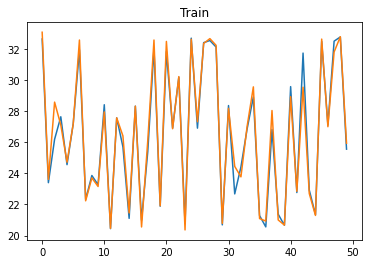

2/2 [==============================] - 0s 9ms/step


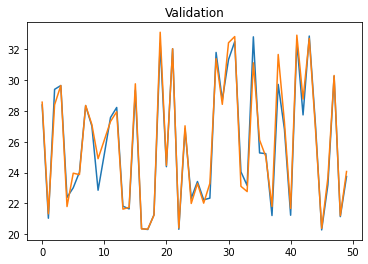

3/3 [==============================] - 0s 7ms/step


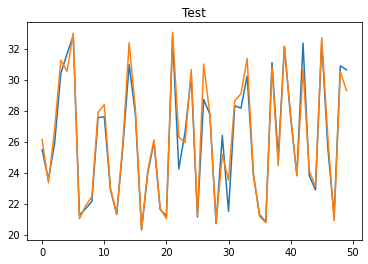

3/3 [==============================] - 0s 6ms/step


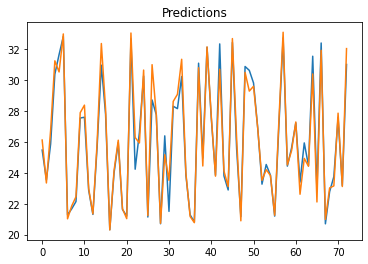

In [13]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [14]:
auto_cnn_mse

0.49354407565683567

### GRU

Epoch 1/30
5/8 [=================>............] - ETA: 0s - loss: 597.8959 - root_mean_squared_error: 24.4519  

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 38s 4s/step - loss: 599.6644 - root_mean_squared_error: 24.4880 - val_loss: 629.8314 - val_root_mean_squared_error: 25.0964
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 595.9103 - root_mean_squared_error: 24.4113

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 594.8903 - root_mean_squared_error: 24.3904 - val_loss: 624.0303 - val_root_mean_squared_error: 24.9806
Epoch 3/30
4/8 [==============>...............] - ETA: 0s - loss: 586.4583 - root_mean_squared_error: 24.2169

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 587.5717 - root_mean_squared_error: 24.2399 - val_loss: 618.2843 - val_root_mean_squared_error: 24.8653
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 580.8773 - root_mean_squared_error: 24.1014

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 580.8773 - root_mean_squared_error: 24.1014 - val_loss: 612.5544 - val_root_mean_squared_error: 24.7498
Epoch 5/30
6/8 [=====================>........] - ETA: 0s - loss: 579.0563 - root_mean_squared_error: 24.0636

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 575.1910 - root_mean_squared_error: 23.9831 - val_loss: 606.8498 - val_root_mean_squared_error: 24.6343
Epoch 6/30
5/8 [=================>............] - ETA: 0s - loss: 563.6270 - root_mean_squared_error: 23.7408

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 570.7921 - root_mean_squared_error: 23.8913 - val_loss: 601.1817 - val_root_mean_squared_error: 24.5190
Epoch 7/30
6/8 [=====================>........] - ETA: 0s - loss: 565.2733 - root_mean_squared_error: 23.7755

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 566.5881 - root_mean_squared_error: 23.8031 - val_loss: 595.4824 - val_root_mean_squared_error: 24.4025
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 558.5605 - root_mean_squared_error: 23.6339

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 558.5605 - root_mean_squared_error: 23.6339 - val_loss: 589.8286 - val_root_mean_squared_error: 24.2864
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 554.5031 - root_mean_squared_error: 23.5479

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 553.5436 - root_mean_squared_error: 23.5275 - val_loss: 584.1673 - val_root_mean_squared_error: 24.1696
Epoch 10/30
6/8 [=====================>........] - ETA: 0s - loss: 544.7741 - root_mean_squared_error: 23.3404

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 548.2228 - root_mean_squared_error: 23.4142 - val_loss: 578.5046 - val_root_mean_squared_error: 24.0521
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 542.6638 - root_mean_squared_error: 23.2951

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 542.6638 - root_mean_squared_error: 23.2951 - val_loss: 572.8215 - val_root_mean_squared_error: 23.9337
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 529.8550 - root_mean_squared_error: 23.0186

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 538.4620 - root_mean_squared_error: 23.2048 - val_loss: 567.0864 - val_root_mean_squared_error: 23.8136
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 538.2476 - root_mean_squared_error: 23.2002

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 533.8514 - root_mean_squared_error: 23.1052 - val_loss: 561.3044 - val_root_mean_squared_error: 23.6919
Epoch 14/30
3/8 [==========>...................] - ETA: 0s - loss: 515.3454 - root_mean_squared_error: 22.7012

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 16s 2s/step - loss: 527.1939 - root_mean_squared_error: 22.9607 - val_loss: 555.4488 - val_root_mean_squared_error: 23.5680
Epoch 15/30
5/8 [=================>............] - ETA: 0s - loss: 533.9186 - root_mean_squared_error: 23.1067

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 521.5277 - root_mean_squared_error: 22.8370 - val_loss: 549.4299 - val_root_mean_squared_error: 23.4399
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 517.2352 - root_mean_squared_error: 22.7428

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 517.2352 - root_mean_squared_error: 22.7428 - val_loss: 543.2776 - val_root_mean_squared_error: 23.3083
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 511.6510 - root_mean_squared_error: 22.6197

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 511.6510 - root_mean_squared_error: 22.6197 - val_loss: 536.9776 - val_root_mean_squared_error: 23.1728
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 499.9452 - root_mean_squared_error: 22.3595

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 501.8660 - root_mean_squared_error: 22.4024 - val_loss: 530.5125 - val_root_mean_squared_error: 23.0329
Epoch 19/30
4/8 [==============>...............] - ETA: 0s - loss: 497.8332 - root_mean_squared_error: 22.3122

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 496.2198 - root_mean_squared_error: 22.2760 - val_loss: 523.8940 - val_root_mean_squared_error: 22.8887
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 490.2022 - root_mean_squared_error: 22.1405

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 489.6777 - root_mean_squared_error: 22.1287 - val_loss: 517.0492 - val_root_mean_squared_error: 22.7387
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 481.5033 - root_mean_squared_error: 21.9432

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 481.5033 - root_mean_squared_error: 21.9432 - val_loss: 510.0252 - val_root_mean_squared_error: 22.5837
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 477.7503 - root_mean_squared_error: 21.8575

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 477.7801 - root_mean_squared_error: 21.8582 - val_loss: 502.7726 - val_root_mean_squared_error: 22.4226
Epoch 23/30
5/8 [=================>............] - ETA: 0s - loss: 458.0919 - root_mean_squared_error: 21.4031

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 470.4597 - root_mean_squared_error: 21.6901 - val_loss: 495.2859 - val_root_mean_squared_error: 22.2550
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 472.5070 - root_mean_squared_error: 21.7372

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 462.9321 - root_mean_squared_error: 21.5159 - val_loss: 487.5999 - val_root_mean_squared_error: 22.0817
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 457.9853 - root_mean_squared_error: 21.4006

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 456.2029 - root_mean_squared_error: 21.3589 - val_loss: 479.8587 - val_root_mean_squared_error: 21.9057
Epoch 26/30
5/8 [=================>............] - ETA: 0s - loss: 438.3322 - root_mean_squared_error: 20.9364

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 442.7905 - root_mean_squared_error: 21.0426 - val_loss: 472.0657 - val_root_mean_squared_error: 21.7271
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 439.2260 - root_mean_squared_error: 20.9577

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 439.2260 - root_mean_squared_error: 20.9577 - val_loss: 464.2344 - val_root_mean_squared_error: 21.5461
Epoch 28/30
4/8 [==============>...............] - ETA: 0s - loss: 423.6203 - root_mean_squared_error: 20.5820

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 433.0585 - root_mean_squared_error: 20.8101 - val_loss: 456.2963 - val_root_mean_squared_error: 21.3611
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 427.1599 - root_mean_squared_error: 20.6678

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 424.9185 - root_mean_squared_error: 20.6136 - val_loss: 448.3424 - val_root_mean_squared_error: 21.1741
Epoch 30/30
1/8 [==>...........................] - ETA: 0s - loss: 380.0229 - root_mean_squared_error: 19.4942

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 8ms/step


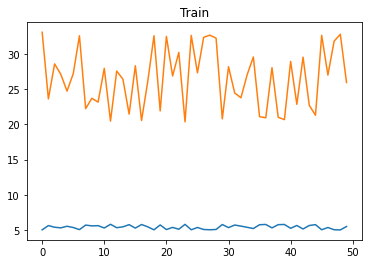

2/2 [==============================] - 2s 5ms/step


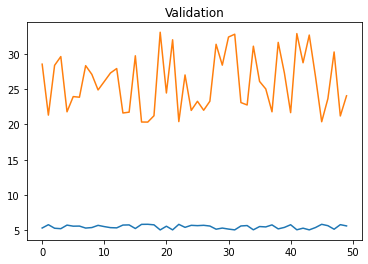

3/3 [==============================] - 0s 4ms/step


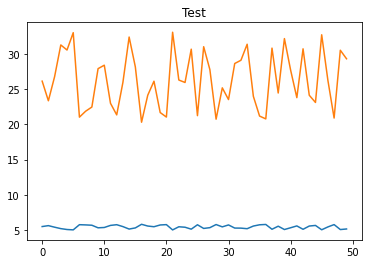

3/3 [==============================] - 0s 5ms/step


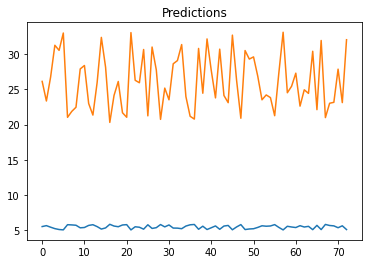

In [15]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [16]:
auto_gru_mse

443.4713969201858

### LSTM

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 622.7062 - root_mean_squared_error: 24.9541  

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 56s 4s/step - loss: 626.6824 - root_mean_squared_error: 25.0336 - val_loss: 666.2702 - val_root_mean_squared_error: 25.8122
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 624.8558 - root_mean_squared_error: 24.9971

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 624.8558 - root_mean_squared_error: 24.9971 - val_loss: 662.9809 - val_root_mean_squared_error: 25.7484
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 617.7905 - root_mean_squared_error: 24.8554

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 620.5974 - root_mean_squared_error: 24.9118 - val_loss: 659.6454 - val_root_mean_squared_error: 25.6836
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 618.9009 - root_mean_squared_error: 24.8777

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 618.9009 - root_mean_squared_error: 24.8777 - val_loss: 656.2941 - val_root_mean_squared_error: 25.6182
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 612.7613 - root_mean_squared_error: 24.7540

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 613.7671 - root_mean_squared_error: 24.7743 - val_loss: 652.8875 - val_root_mean_squared_error: 25.5517
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 612.6524 - root_mean_squared_error: 24.7518

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 610.3627 - root_mean_squared_error: 24.7055 - val_loss: 649.3846 - val_root_mean_squared_error: 25.4830
Epoch 7/30
4/8 [==============>...............] - ETA: 0s - loss: 606.4491 - root_mean_squared_error: 24.6262

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 605.6388 - root_mean_squared_error: 24.6097 - val_loss: 645.8326 - val_root_mean_squared_error: 25.4132
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 597.3361 - root_mean_squared_error: 24.4405

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 602.7663 - root_mean_squared_error: 24.5513 - val_loss: 642.1742 - val_root_mean_squared_error: 25.3412
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 599.9218 - root_mean_squared_error: 24.4933

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 599.9218 - root_mean_squared_error: 24.4933 - val_loss: 637.9018 - val_root_mean_squared_error: 25.2567
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 586.6827 - root_mean_squared_error: 24.2215

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 595.1671 - root_mean_squared_error: 24.3960 - val_loss: 633.3184 - val_root_mean_squared_error: 25.1658
Epoch 11/30
5/8 [=================>............] - ETA: 0s - loss: 578.0826 - root_mean_squared_error: 24.0433

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 588.1870 - root_mean_squared_error: 24.2526 - val_loss: 628.5350 - val_root_mean_squared_error: 25.0706
Epoch 12/30
6/8 [=====================>........] - ETA: 0s - loss: 580.5641 - root_mean_squared_error: 24.0949

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 583.2657 - root_mean_squared_error: 24.1509 - val_loss: 623.5428 - val_root_mean_squared_error: 24.9708
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 579.2808 - root_mean_squared_error: 24.0683

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 579.2808 - root_mean_squared_error: 24.0683 - val_loss: 618.4402 - val_root_mean_squared_error: 24.8685
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 576.1381 - root_mean_squared_error: 24.0029

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 574.5538 - root_mean_squared_error: 23.9699 - val_loss: 613.1922 - val_root_mean_squared_error: 24.7627
Epoch 15/30
5/8 [=================>............] - ETA: 0s - loss: 579.2892 - root_mean_squared_error: 24.0684

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 566.4457 - root_mean_squared_error: 23.8001 - val_loss: 607.8031 - val_root_mean_squared_error: 24.6537
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 561.5142 - root_mean_squared_error: 23.6963

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 561.5142 - root_mean_squared_error: 23.6963 - val_loss: 601.2709 - val_root_mean_squared_error: 24.5208
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 555.6786 - root_mean_squared_error: 23.5728

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 555.6786 - root_mean_squared_error: 23.5728 - val_loss: 593.3574 - val_root_mean_squared_error: 24.3589
Epoch 18/30
5/8 [=================>............] - ETA: 0s - loss: 553.9406 - root_mean_squared_error: 23.5359

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 18s 2s/step - loss: 548.9028 - root_mean_squared_error: 23.4287 - val_loss: 584.6875 - val_root_mean_squared_error: 24.1803
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 533.4894 - root_mean_squared_error: 23.0974

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 540.2755 - root_mean_squared_error: 23.2438 - val_loss: 575.0867 - val_root_mean_squared_error: 23.9810
Epoch 20/30
6/8 [=====================>........] - ETA: 0s - loss: 532.7974 - root_mean_squared_error: 23.0824

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 532.7531 - root_mean_squared_error: 23.0814 - val_loss: 564.6047 - val_root_mean_squared_error: 23.7614
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 511.9336 - root_mean_squared_error: 22.6259

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 522.1417 - root_mean_squared_error: 22.8504 - val_loss: 553.6519 - val_root_mean_squared_error: 23.5298
Epoch 22/30
1/8 [==>...........................] - ETA: 0s - loss: 526.0839 - root_mean_squared_error: 22.9365

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 513.4407 - root_mean_squared_error: 22.6592 - val_loss: 542.2935 - val_root_mean_squared_error: 23.2872
Epoch 23/30
4/8 [==============>...............] - ETA: 0s - loss: 497.2156 - root_mean_squared_error: 22.2983

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 501.6100 - root_mean_squared_error: 22.3967 - val_loss: 530.5626 - val_root_mean_squared_error: 23.0339
Epoch 24/30
6/8 [=====================>........] - ETA: 0s - loss: 483.1390 - root_mean_squared_error: 21.9804

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 490.1503 - root_mean_squared_error: 22.1393 - val_loss: 518.2491 - val_root_mean_squared_error: 22.7651
Epoch 25/30
5/8 [=================>............] - ETA: 0s - loss: 478.5958 - root_mean_squared_error: 21.8768

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 16s 2s/step - loss: 480.2422 - root_mean_squared_error: 21.9144 - val_loss: 505.5121 - val_root_mean_squared_error: 22.4836
Epoch 26/30
6/8 [=====================>........] - ETA: 0s - loss: 474.0116 - root_mean_squared_error: 21.7718

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 15s 2s/step - loss: 465.0341 - root_mean_squared_error: 21.5646 - val_loss: 492.3047 - val_root_mean_squared_error: 22.1879
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 454.2029 - root_mean_squared_error: 21.3120

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 454.2029 - root_mean_squared_error: 21.3120 - val_loss: 478.9306 - val_root_mean_squared_error: 21.8845
Epoch 28/30
6/8 [=====================>........] - ETA: 0s - loss: 451.6376 - root_mean_squared_error: 21.2518

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 442.9732 - root_mean_squared_error: 21.0469 - val_loss: 465.2330 - val_root_mean_squared_error: 21.5693
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 430.1831 - root_mean_squared_error: 20.7409

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 426.7256 - root_mean_squared_error: 20.6573 - val_loss: 451.2178 - val_root_mean_squared_error: 21.2419
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 414.2651 - root_mean_squared_error: 20.3535

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 3s 29ms/step


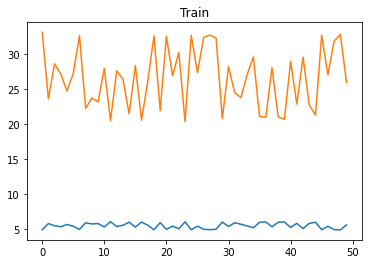

2/2 [==============================] - 3s 8ms/step


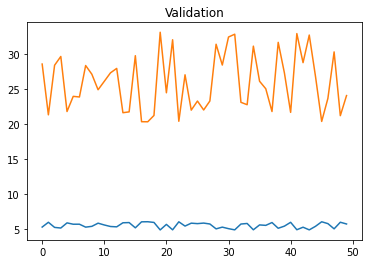

3/3 [==============================] - 0s 6ms/step


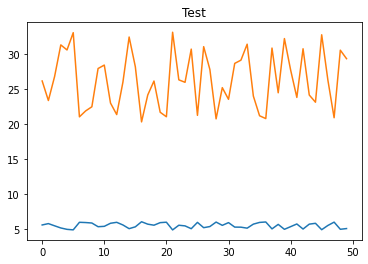

3/3 [==============================] - 0s 6ms/step


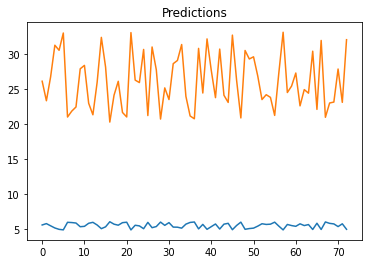

In [17]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [18]:
auto_lstm_mse

440.15450183752745

### RNN

Epoch 1/30
1/8 [==>...........................] - ETA: 1:39 - loss: 670.4746 - root_mean_squared_error: 25.8935INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 23s 1s/step - loss: 640.6779 - root_mean_squared_error: 25.3116 - val_loss: 673.5568 - val_root_mean_squared_error: 25.9530
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 565.1285 - root_mean_squared_error: 23.7724INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 19s 3s/step - loss: 635.4769 - root_mean_squared_error: 25.2087 - val_loss: 666.6694 - val_root_mean_squared_error: 25.8199
Epoch 3/30
1/8 [==>...........................] - ETA: 0s - loss: 619.5554 - root_mean_squared_error: 24.8909INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 635.9471 - root_mean_squared_error: 25.2180 - val_loss: 659.7081 - val_root_mean_squared_error: 25.6848
Epoch 4/30
1/8 [==>...........................] - ETA: 0s - loss: 596.6545 - root_mean_squared_error: 24.4265INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 619.3350 - root_mean_squared_error: 24.8864 - val_loss: 652.6418 - val_root_mean_squared_error: 25.5469
Epoch 5/30
1/8 [==>...........................] - ETA: 0s - loss: 618.6456 - root_mean_squared_error: 24.8726INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 620.8289 - root_mean_squared_error: 24.9164 - val_loss: 645.4159 - val_root_mean_squared_error: 25.4050
Epoch 6/30
1/8 [==>...........................] - ETA: 0s - loss: 564.8413 - root_mean_squared_error: 23.7664INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 774ms/step - loss: 610.4362 - root_mean_squared_error: 24.7070 - val_loss: 638.0976 - val_root_mean_squared_error: 25.2606
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 601.2440 - root_mean_squared_error: 24.5203INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 956ms/step - loss: 601.2440 - root_mean_squared_error: 24.5203 - val_loss: 630.6353 - val_root_mean_squared_error: 25.1125
Epoch 8/30
1/8 [==>...........................] - ETA: 0s - loss: 575.6676 - root_mean_squared_error: 23.9931INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 594.3024 - root_mean_squared_error: 24.3783 - val_loss: 622.9615 - val_root_mean_squared_error: 24.9592
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 582.8095 - root_mean_squared_error: 24.1414INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 580.5813 - root_mean_squared_error: 24.0953 - val_loss: 615.2590 - val_root_mean_squared_error: 24.8044
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 588.2612 - root_mean_squared_error: 24.2541INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 935ms/step - loss: 578.7227 - root_mean_squared_error: 24.0567 - val_loss: 607.5624 - val_root_mean_squared_error: 24.6488
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 571.9730 - root_mean_squared_error: 23.9160INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 920ms/step - loss: 571.9730 - root_mean_squared_error: 23.9160 - val_loss: 599.9188 - val_root_mean_squared_error: 24.4932
Epoch 12/30
1/8 [==>...........................] - ETA: 0s - loss: 563.7825 - root_mean_squared_error: 23.7441INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 566.6329 - root_mean_squared_error: 23.8041 - val_loss: 592.4388 - val_root_mean_squared_error: 24.3401
Epoch 13/30
1/8 [==>...........................] - ETA: 0s - loss: 541.1278 - root_mean_squared_error: 23.2622INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 901ms/step - loss: 554.0684 - root_mean_squared_error: 23.5387 - val_loss: 585.1270 - val_root_mean_squared_error: 24.1894
Epoch 14/30
3/8 [==========>...................] - ETA: 0s - loss: 566.8279 - root_mean_squared_error: 23.8081INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 554.3532 - root_mean_squared_error: 23.5447 - val_loss: 577.9184 - val_root_mean_squared_error: 24.0399
Epoch 15/30
1/8 [==>...........................] - ETA: 0s - loss: 611.8051 - root_mean_squared_error: 24.7347INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 962ms/step - loss: 538.1443 - root_mean_squared_error: 23.1979 - val_loss: 570.7423 - val_root_mean_squared_error: 23.8902
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 527.0381 - root_mean_squared_error: 22.9573INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 527.0381 - root_mean_squared_error: 22.9573 - val_loss: 563.6012 - val_root_mean_squared_error: 23.7403
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 531.1674 - root_mean_squared_error: 23.0471INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 922ms/step - loss: 531.1674 - root_mean_squared_error: 23.0471 - val_loss: 556.4174 - val_root_mean_squared_error: 23.5885
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 516.9051 - root_mean_squared_error: 22.7355INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 892ms/step - loss: 517.2296 - root_mean_squared_error: 22.7427 - val_loss: 549.3090 - val_root_mean_squared_error: 23.4373
Epoch 19/30
5/8 [=================>............] - ETA: 0s - loss: 509.4277 - root_mean_squared_error: 22.5705INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 511.3316 - root_mean_squared_error: 22.6126 - val_loss: 542.2018 - val_root_mean_squared_error: 23.2852
Epoch 20/30
1/8 [==>...........................] - ETA: 0s - loss: 479.3949 - root_mean_squared_error: 21.8951INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 507.9254 - root_mean_squared_error: 22.5372 - val_loss: 535.0683 - val_root_mean_squared_error: 23.1315
Epoch 21/30
3/8 [==========>...................] - ETA: 0s - loss: 485.9257 - root_mean_squared_error: 22.0437INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 497.0486 - root_mean_squared_error: 22.2946 - val_loss: 527.9994 - val_root_mean_squared_error: 22.9782
Epoch 22/30
5/8 [=================>............] - ETA: 0s - loss: 484.3037 - root_mean_squared_error: 22.0069INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 498.5157 - root_mean_squared_error: 22.3275 - val_loss: 520.9803 - val_root_mean_squared_error: 22.8250
Epoch 23/30
5/8 [=================>............] - ETA: 0s - loss: 486.2465 - root_mean_squared_error: 22.0510INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 483.1320 - root_mean_squared_error: 21.9803 - val_loss: 513.9812 - val_root_mean_squared_error: 22.6712
Epoch 24/30
1/8 [==>...........................] - ETA: 0s - loss: 466.9209 - root_mean_squared_error: 21.6084INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 978ms/step - loss: 483.4688 - root_mean_squared_error: 21.9879 - val_loss: 507.0740 - val_root_mean_squared_error: 22.5183
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 468.1708 - root_mean_squared_error: 21.6373INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 469.6589 - root_mean_squared_error: 21.6716 - val_loss: 500.3301 - val_root_mean_squared_error: 22.3681
Epoch 26/30
1/8 [==>...........................] - ETA: 0s - loss: 527.3403 - root_mean_squared_error: 22.9639INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 795ms/step - loss: 464.1547 - root_mean_squared_error: 21.5443 - val_loss: 493.7072 - val_root_mean_squared_error: 22.2195
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 463.2195 - root_mean_squared_error: 21.5225INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 463.2195 - root_mean_squared_error: 21.5225 - val_loss: 487.1623 - val_root_mean_squared_error: 22.0718
Epoch 28/30
1/8 [==>...........................] - ETA: 0s - loss: 433.8117 - root_mean_squared_error: 20.8281INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 905ms/step - loss: 455.4093 - root_mean_squared_error: 21.3403 - val_loss: 480.8220 - val_root_mean_squared_error: 21.9277
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 445.7629 - root_mean_squared_error: 21.1131INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 685ms/step - loss: 445.7629 - root_mean_squared_error: 21.1131 - val_loss: 474.5332 - val_root_mean_squared_error: 21.7838
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 442.9102 - root_mean_squared_error: 21.0454INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 1s 4ms/step


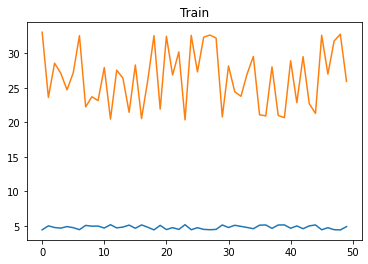

2/2 [==============================] - 1s 4ms/step


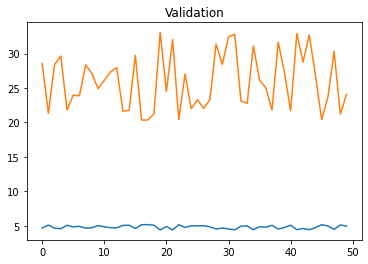

3/3 [==============================] - 0s 5ms/step


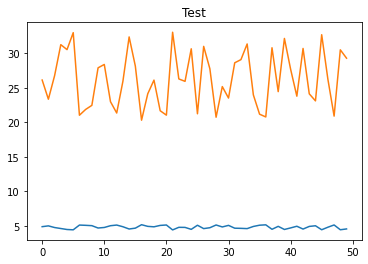

3/3 [==============================] - 0s 3ms/step


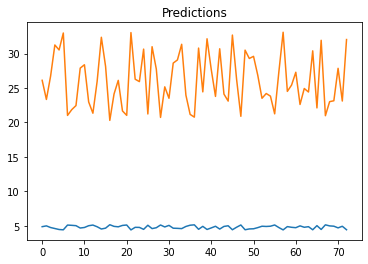

In [19]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [20]:
auto_rnn_mse

471.3450322707226

# Moving Average with Encoder

### CNN

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 278.0558 - root_mean_squared_error: 16.6750 

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 399ms/step - loss: 278.0558 - root_mean_squared_error: 16.6750 - val_loss: 216.7958 - val_root_mean_squared_error: 14.7240
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 267.6700 - root_mean_squared_error: 16.3606

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 274ms/step - loss: 267.6700 - root_mean_squared_error: 16.3606 - val_loss: 175.0126 - val_root_mean_squared_error: 13.2292
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 177.9339 - root_mean_squared_error: 13.3392

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 593ms/step - loss: 177.9339 - root_mean_squared_error: 13.3392 - val_loss: 130.6773 - val_root_mean_squared_error: 11.4314
Epoch 4/10
7/8 [=========================>....] - ETA: 0s - loss: 141.9960 - root_mean_squared_error: 11.9162

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 422ms/step - loss: 141.3690 - root_mean_squared_error: 11.8899 - val_loss: 84.4729 - val_root_mean_squared_error: 9.1909
Epoch 5/10
5/8 [=================>............] - ETA: 0s - loss: 99.5404 - root_mean_squared_error: 9.9770  

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 770ms/step - loss: 96.2053 - root_mean_squared_error: 9.8084 - val_loss: 51.5671 - val_root_mean_squared_error: 7.1810
Epoch 6/10
6/8 [=====================>........] - ETA: 0s - loss: 89.9130 - root_mean_squared_error: 9.4822

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 673ms/step - loss: 89.5320 - root_mean_squared_error: 9.4621 - val_loss: 29.2413 - val_root_mean_squared_error: 5.4075
Epoch 7/10
1/8 [==>...........................] - ETA: 0s - loss: 49.4637 - root_mean_squared_error: 7.0330

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 2s 344ms/step - loss: 74.6521 - root_mean_squared_error: 8.6401 - val_loss: 16.8494 - val_root_mean_squared_error: 4.1048
Epoch 8/10
8/8 [==============================] - ETA: 0s - loss: 72.2389 - root_mean_squared_error: 8.4993

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 499ms/step - loss: 72.2389 - root_mean_squared_error: 8.4993 - val_loss: 9.0097 - val_root_mean_squared_error: 3.0016
Epoch 9/10
7/8 [=========================>....] - ETA: 0s - loss: 60.6862 - root_mean_squared_error: 7.7901

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 60.1526 - root_mean_squared_error: 7.7558 - val_loss: 4.4792 - val_root_mean_squared_error: 2.1164
Epoch 10/10
7/8 [=========================>....] - ETA: 0s - loss: 52.6364 - root_mean_squared_error: 7.2551

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 0s 4ms/step


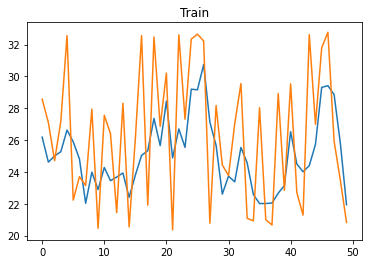

2/2 [==============================] - 0s 4ms/step


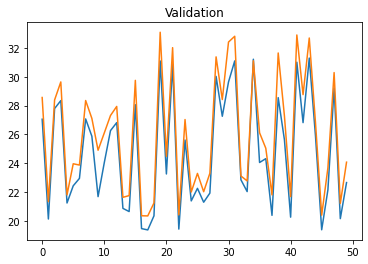

3/3 [==============================] - 0s 5ms/step


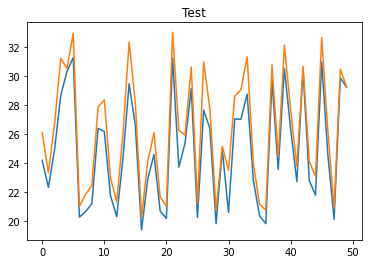

3/3 [==============================] - 0s 3ms/step


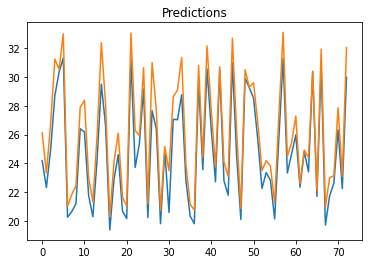

In [21]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
mavg_auto_cnn_mse

2.030808164296819

### RNN

Epoch 1/10
7/8 [=========================>....] - ETA: 0s - loss: 598.4079 - root_mean_squared_error: 24.4624 INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 1s/step - loss: 597.0902 - root_mean_squared_error: 24.4354 - val_loss: 630.5201 - val_root_mean_squared_error: 25.1102
Epoch 2/10
1/8 [==>...........................] - ETA: 0s - loss: 658.4961 - root_mean_squared_error: 25.6612INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 597.8263 - root_mean_squared_error: 24.4505 - val_loss: 624.4561 - val_root_mean_squared_error: 24.9891
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 591.9292 - root_mean_squared_error: 24.3296INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 591.9292 - root_mean_squared_error: 24.3296 - val_loss: 618.5488 - val_root_mean_squared_error: 24.8706
Epoch 4/10
3/8 [==========>...................] - ETA: 0s - loss: 572.6706 - root_mean_squared_error: 23.9305INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 583.5257 - root_mean_squared_error: 24.1563 - val_loss: 612.7046 - val_root_mean_squared_error: 24.7529
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 576.3060 - root_mean_squared_error: 24.0064INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 576.3060 - root_mean_squared_error: 24.0064 - val_loss: 606.8559 - val_root_mean_squared_error: 24.6344
Epoch 6/10
8/8 [==============================] - ETA: 0s - loss: 568.6445 - root_mean_squared_error: 23.8463INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 568.6445 - root_mean_squared_error: 23.8463 - val_loss: 601.0307 - val_root_mean_squared_error: 24.5159
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 559.5742 - root_mean_squared_error: 23.6553INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 795ms/step - loss: 559.5742 - root_mean_squared_error: 23.6553 - val_loss: 595.2003 - val_root_mean_squared_error: 24.3967
Epoch 8/10
7/8 [=========================>....] - ETA: 0s - loss: 558.4594 - root_mean_squared_error: 23.6317INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 559.2842 - root_mean_squared_error: 23.6492 - val_loss: 589.2349 - val_root_mean_squared_error: 24.2742
Epoch 9/10
7/8 [=========================>....] - ETA: 0s - loss: 551.8348 - root_mean_squared_error: 23.4912INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 550.2790 - root_mean_squared_error: 23.4580 - val_loss: 583.1922 - val_root_mean_squared_error: 24.1494
Epoch 10/10
1/8 [==>...........................] - ETA: 0s - loss: 561.7378 - root_mean_squared_error: 23.7010INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 5ms/step


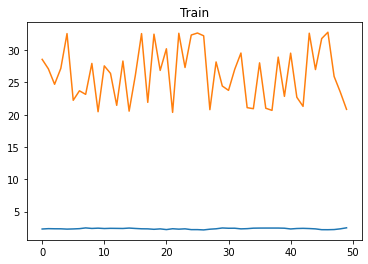

2/2 [==============================] - 1s 5ms/step


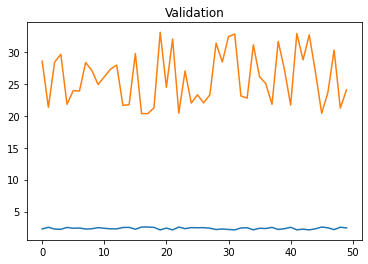

3/3 [==============================] - 0s 4ms/step


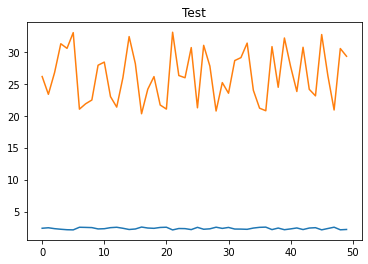

3/3 [==============================] - 0s 4ms/step


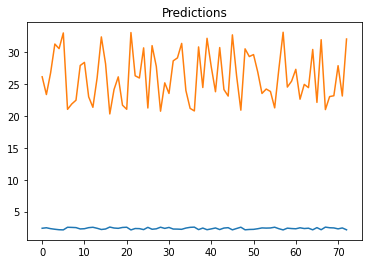

In [23]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [24]:
mavg_auto_rnn_mse

580.4125069832163

### GRU

Epoch 1/10
3/8 [==========>...................] - ETA: 0s - loss: 584.6365 - root_mean_squared_error: 24.1793  

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 46s 4s/step - loss: 589.2227 - root_mean_squared_error: 24.2739 - val_loss: 621.1184 - val_root_mean_squared_error: 24.9222
Epoch 2/10
6/8 [=====================>........] - ETA: 0s - loss: 585.1667 - root_mean_squared_error: 24.1902

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 17s 2s/step - loss: 583.2559 - root_mean_squared_error: 24.1507 - val_loss: 615.5818 - val_root_mean_squared_error: 24.8109
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 576.9412 - root_mean_squared_error: 24.0196

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 578.8895 - root_mean_squared_error: 24.0601 - val_loss: 610.1178 - val_root_mean_squared_error: 24.7006
Epoch 4/10
5/8 [=================>............] - ETA: 0s - loss: 577.9620 - root_mean_squared_error: 24.0408

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 12s 2s/step - loss: 574.0157 - root_mean_squared_error: 23.9586 - val_loss: 604.6894 - val_root_mean_squared_error: 24.5904
Epoch 5/10
5/8 [=================>............] - ETA: 0s - loss: 579.2115 - root_mean_squared_error: 24.0668

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 567.2488 - root_mean_squared_error: 23.8170 - val_loss: 599.3153 - val_root_mean_squared_error: 24.4809
Epoch 6/10
6/8 [=====================>........] - ETA: 0s - loss: 572.5323 - root_mean_squared_error: 23.9276

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 565.7451 - root_mean_squared_error: 23.7854 - val_loss: 594.0239 - val_root_mean_squared_error: 24.3726
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 558.2102 - root_mean_squared_error: 23.6265

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 558.2102 - root_mean_squared_error: 23.6265 - val_loss: 588.7473 - val_root_mean_squared_error: 24.2641
Epoch 8/10
7/8 [=========================>....] - ETA: 0s - loss: 550.2891 - root_mean_squared_error: 23.4582

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 551.0583 - root_mean_squared_error: 23.4746 - val_loss: 583.5143 - val_root_mean_squared_error: 24.1560
Epoch 9/10
7/8 [=========================>....] - ETA: 0s - loss: 547.7581 - root_mean_squared_error: 23.4042

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 13s 2s/step - loss: 548.4188 - root_mean_squared_error: 23.4183 - val_loss: 578.2813 - val_root_mean_squared_error: 24.0475
Epoch 10/10
6/8 [=====================>........] - ETA: 0s - loss: 540.6794 - root_mean_squared_error: 23.2525

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 2s 9ms/step


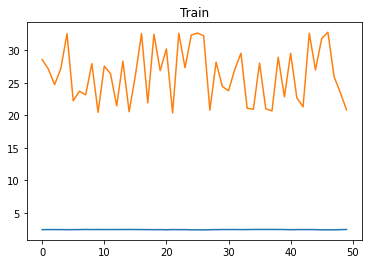

2/2 [==============================] - 2s 6ms/step


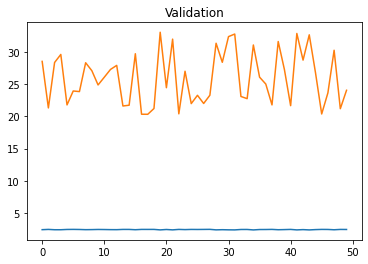

3/3 [==============================] - 0s 4ms/step


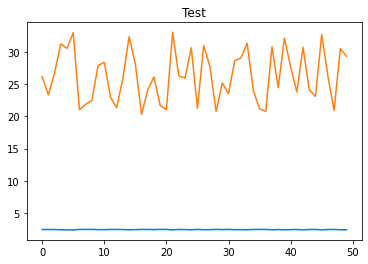

3/3 [==============================] - 0s 4ms/step


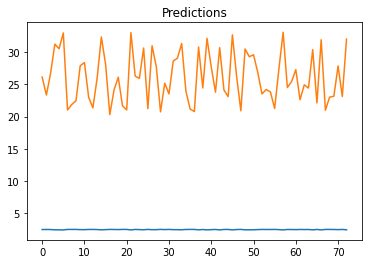

In [25]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, 10, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [26]:
mavg_auto_gru_mse

576.3421498116645

### LSTM

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 644.7662 - root_mean_squared_error: 25.3922 

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 29s 3s/step - loss: 644.7662 - root_mean_squared_error: 25.3922 - val_loss: 679.1656 - val_root_mean_squared_error: 26.0608
Epoch 2/10
7/8 [=========================>....] - ETA: 0s - loss: 639.2638 - root_mean_squared_error: 25.2837

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 640.7224 - root_mean_squared_error: 25.3125 - val_loss: 675.9042 - val_root_mean_squared_error: 25.9982
Epoch 3/10
5/8 [=================>............] - ETA: 0s - loss: 628.4874 - root_mean_squared_error: 25.0697

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 638.9041 - root_mean_squared_error: 25.2766 - val_loss: 672.6411 - val_root_mean_squared_error: 25.9353
Epoch 4/10
6/8 [=====================>........] - ETA: 0s - loss: 630.1810 - root_mean_squared_error: 25.1034

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 26s 3s/step - loss: 635.9550 - root_mean_squared_error: 25.2181 - val_loss: 669.3961 - val_root_mean_squared_error: 25.8727
Epoch 5/10
4/8 [==============>...............] - ETA: 0s - loss: 637.6580 - root_mean_squared_error: 25.2519

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 631.9703 - root_mean_squared_error: 25.1390 - val_loss: 666.1335 - val_root_mean_squared_error: 25.8096
Epoch 6/10
4/8 [==============>...............] - ETA: 0s - loss: 615.6290 - root_mean_squared_error: 24.8119

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 4s/step - loss: 628.2068 - root_mean_squared_error: 25.0641 - val_loss: 662.8404 - val_root_mean_squared_error: 25.7457
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 624.1196 - root_mean_squared_error: 24.9824

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 624.1196 - root_mean_squared_error: 24.9824 - val_loss: 659.5073 - val_root_mean_squared_error: 25.6809
Epoch 8/10
6/8 [=====================>........] - ETA: 0s - loss: 624.2786 - root_mean_squared_error: 24.9856

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 619.4046 - root_mean_squared_error: 24.8878 - val_loss: 656.1342 - val_root_mean_squared_error: 25.6151
Epoch 9/10
6/8 [=====================>........] - ETA: 0s - loss: 618.8875 - root_mean_squared_error: 24.8774

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 619.7186 - root_mean_squared_error: 24.8941 - val_loss: 652.7116 - val_root_mean_squared_error: 25.5482
Epoch 10/10
5/8 [=================>............] - ETA: 0s - loss: 620.3177 - root_mean_squared_error: 24.9062

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 2s 6ms/step


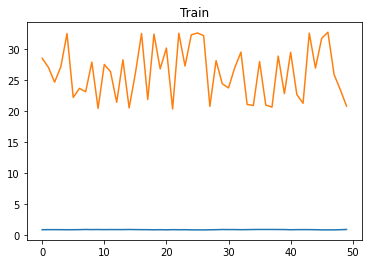

2/2 [==============================] - 2s 7ms/step


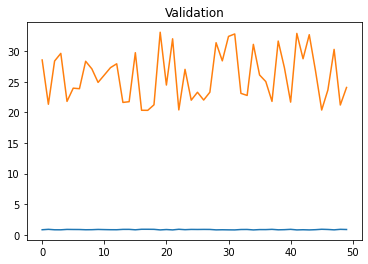

3/3 [==============================] - 0s 6ms/step


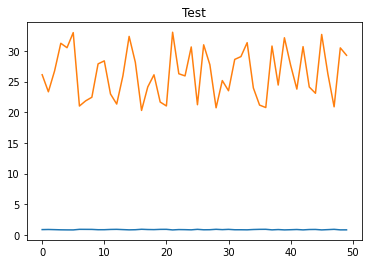

3/3 [==============================] - 0s 4ms/step


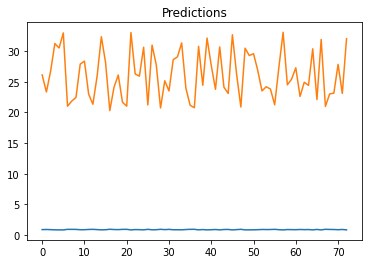

In [27]:
model = Sequential()
model.add(InputLayer((3, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, 10,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [28]:
mavg_auto_lstm_mse

652.7673812208157

# Hybrid

## General

### CNN LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 655.1592 - root_mean_squared_error: 25.5961

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 85s 9s/step - loss: 655.1592 - root_mean_squared_error: 25.5961 - val_loss: 680.2101 - val_root_mean_squared_error: 26.0808
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 639.2528 - root_mean_squared_error: 25.2834

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 64s 9s/step - loss: 639.0607 - root_mean_squared_error: 25.2796 - val_loss: 664.0629 - val_root_mean_squared_error: 25.7694
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 623.2507 - root_mean_squared_error: 24.9650

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 623.7681 - root_mean_squared_error: 24.9754 - val_loss: 649.1733 - val_root_mean_squared_error: 25.4789
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 609.7781 - root_mean_squared_error: 24.6937

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 65s 9s/step - loss: 609.7781 - root_mean_squared_error: 24.6937 - val_loss: 635.6412 - val_root_mean_squared_error: 25.2119
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 597.1332 - root_mean_squared_error: 24.4363

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 84s 12s/step - loss: 597.1332 - root_mean_squared_error: 24.4363 - val_loss: 623.5987 - val_root_mean_squared_error: 24.9720
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 585.9730 - root_mean_squared_error: 24.2069

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 85s 12s/step - loss: 585.9730 - root_mean_squared_error: 24.2069 - val_loss: 612.7424 - val_root_mean_squared_error: 24.7536
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 574.0604 - root_mean_squared_error: 23.9596

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 65s 9s/step - loss: 575.6108 - root_mean_squared_error: 23.9919 - val_loss: 602.5850 - val_root_mean_squared_error: 24.5476
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 565.9584 - root_mean_squared_error: 23.7899

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 565.9584 - root_mean_squared_error: 23.7899 - val_loss: 592.9942 - val_root_mean_squared_error: 24.3515
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 556.7300 - root_mean_squared_error: 23.5951

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 63s 9s/step - loss: 556.7300 - root_mean_squared_error: 23.5951 - val_loss: 583.7545 - val_root_mean_squared_error: 24.1610
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 547.8358 - root_mean_squared_error: 23.4059

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 60s 9s/step - loss: 547.8358 - root_mean_squared_error: 23.4059 - val_loss: 574.6453 - val_root_mean_squared_error: 23.9718
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 539.0350 - root_mean_squared_error: 23.2171

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 104s 15s/step - loss: 539.0350 - root_mean_squared_error: 23.2171 - val_loss: 565.8101 - val_root_mean_squared_error: 23.7868
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 528.1785 - root_mean_squared_error: 22.9821

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 84s 11s/step - loss: 530.4711 - root_mean_squared_error: 23.0320 - val_loss: 557.1397 - val_root_mean_squared_error: 23.6038
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 522.0903 - root_mean_squared_error: 22.8493

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 59s 8s/step - loss: 522.0903 - root_mean_squared_error: 22.8493 - val_loss: 548.5044 - val_root_mean_squared_error: 23.4202
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 516.0762 - root_mean_squared_error: 22.7173

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 55s 8s/step - loss: 513.7263 - root_mean_squared_error: 22.6655 - val_loss: 539.9008 - val_root_mean_squared_error: 23.2358
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 505.3249 - root_mean_squared_error: 22.4794

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 93s 13s/step - loss: 505.3249 - root_mean_squared_error: 22.4794 - val_loss: 531.2163 - val_root_mean_squared_error: 23.0481
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 496.8669 - root_mean_squared_error: 22.2905

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 84s 12s/step - loss: 496.8669 - root_mean_squared_error: 22.2905 - val_loss: 522.4810 - val_root_mean_squared_error: 22.8578
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 489.4265 - root_mean_squared_error: 22.1230

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 79s 11s/step - loss: 488.4203 - root_mean_squared_error: 22.1002 - val_loss: 513.7870 - val_root_mean_squared_error: 22.6669
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 480.5142 - root_mean_squared_error: 21.9206

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 72s 10s/step - loss: 480.0561 - root_mean_squared_error: 21.9102 - val_loss: 505.2350 - val_root_mean_squared_error: 22.4774
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 471.8727 - root_mean_squared_error: 21.7226

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 89s 13s/step - loss: 471.8727 - root_mean_squared_error: 21.7226 - val_loss: 496.7906 - val_root_mean_squared_error: 22.2888
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 463.7163 - root_mean_squared_error: 21.5341

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 79s 11s/step - loss: 463.7163 - root_mean_squared_error: 21.5341 - val_loss: 488.3807 - val_root_mean_squared_error: 22.0993
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 456.8862 - root_mean_squared_error: 21.3749

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 68s 10s/step - loss: 455.5363 - root_mean_squared_error: 21.3433 - val_loss: 479.9269 - val_root_mean_squared_error: 21.9072
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 449.1221 - root_mean_squared_error: 21.1925

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 85s 12s/step - loss: 447.3203 - root_mean_squared_error: 21.1499 - val_loss: 471.3468 - val_root_mean_squared_error: 21.7105
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 438.9543 - root_mean_squared_error: 20.9512

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 67s 10s/step - loss: 438.9543 - root_mean_squared_error: 20.9512 - val_loss: 462.6243 - val_root_mean_squared_error: 21.5087
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 430.5143 - root_mean_squared_error: 20.7488

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 88s 12s/step - loss: 430.5143 - root_mean_squared_error: 20.7488 - val_loss: 453.7820 - val_root_mean_squared_error: 21.3022
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 422.0526 - root_mean_squared_error: 20.5439

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 83s 11s/step - loss: 422.0526 - root_mean_squared_error: 20.5439 - val_loss: 445.1845 - val_root_mean_squared_error: 21.0994
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 414.8633 - root_mean_squared_error: 20.3682

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 72s 10s/step - loss: 413.8671 - root_mean_squared_error: 20.3437 - val_loss: 436.9935 - val_root_mean_squared_error: 20.9044
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 408.3380 - root_mean_squared_error: 20.2074

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 80s 11s/step - loss: 406.1995 - root_mean_squared_error: 20.1544 - val_loss: 429.3862 - val_root_mean_squared_error: 20.7216
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 399.0960 - root_mean_squared_error: 19.9774

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 75s 11s/step - loss: 399.0960 - root_mean_squared_error: 19.9774 - val_loss: 422.4148 - val_root_mean_squared_error: 20.5527
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 392.5901 - root_mean_squared_error: 19.8139

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 75s 10s/step - loss: 392.5901 - root_mean_squared_error: 19.8139 - val_loss: 416.0214 - val_root_mean_squared_error: 20.3966
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 386.6209 - root_mean_squared_error: 19.6627

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 12s 30ms/step


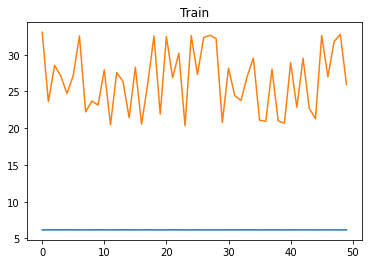

2/2 [==============================] - 51s 56ms/step


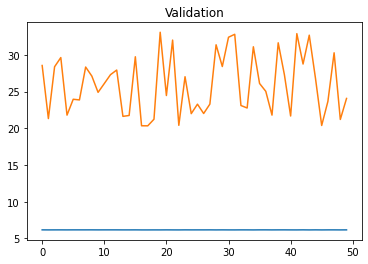

3/3 [==============================] - 1s 217ms/step


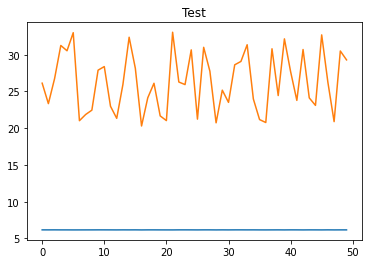

3/3 [==============================] - 0s 12ms/step


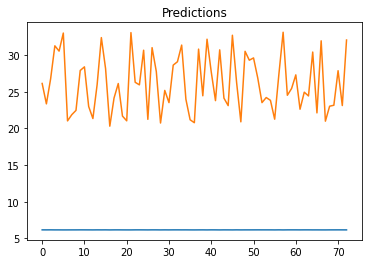

In [29]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [30]:
hybrid_cnn_lstm_mse

412.799619515463

### RNN LSTM

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 660.3668 - root_mean_squared_error: 25.6976

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 62s 6s/step - loss: 671.0730 - root_mean_squared_error: 25.9051 - val_loss: 702.1922 - val_root_mean_squared_error: 26.4989
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 659.9362 - root_mean_squared_error: 25.6892

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 663.5289 - root_mean_squared_error: 25.7591 - val_loss: 694.5846 - val_root_mean_squared_error: 26.3550
Epoch 3/30
6/8 [=====================>........] - ETA: 0s - loss: 655.6233 - root_mean_squared_error: 25.6051

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 656.2162 - root_mean_squared_error: 25.6167 - val_loss: 687.1923 - val_root_mean_squared_error: 26.2144
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 649.0836 - root_mean_squared_error: 25.4771

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 47s 6s/step - loss: 649.0836 - root_mean_squared_error: 25.4771 - val_loss: 679.9323 - val_root_mean_squared_error: 26.0755
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 642.0726 - root_mean_squared_error: 25.3392

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 642.0726 - root_mean_squared_error: 25.3392 - val_loss: 672.6938 - val_root_mean_squared_error: 25.9363
Epoch 6/30
6/8 [=====================>........] - ETA: 0s - loss: 634.4643 - root_mean_squared_error: 25.1886

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 635.0101 - root_mean_squared_error: 25.1994 - val_loss: 665.4445 - val_root_mean_squared_error: 25.7962
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 629.1412 - root_mean_squared_error: 25.0827

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 627.9052 - root_mean_squared_error: 25.0580 - val_loss: 658.0711 - val_root_mean_squared_error: 25.6529
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 621.3801 - root_mean_squared_error: 24.9275

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 620.6691 - root_mean_squared_error: 24.9132 - val_loss: 650.4969 - val_root_mean_squared_error: 25.5048
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 607.6416 - root_mean_squared_error: 24.6504

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 613.1592 - root_mean_squared_error: 24.7621 - val_loss: 642.6603 - val_root_mean_squared_error: 25.3507
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 594.8668 - root_mean_squared_error: 24.3899

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 605.4188 - root_mean_squared_error: 24.6053 - val_loss: 634.4727 - val_root_mean_squared_error: 25.1887
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 597.3335 - root_mean_squared_error: 24.4404

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 65s 9s/step - loss: 597.3335 - root_mean_squared_error: 24.4404 - val_loss: 625.9601 - val_root_mean_squared_error: 25.0192
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 589.9958 - root_mean_squared_error: 24.2898

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 588.9341 - root_mean_squared_error: 24.2680 - val_loss: 617.0806 - val_root_mean_squared_error: 24.8411
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 580.1871 - root_mean_squared_error: 24.0871

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 580.1871 - root_mean_squared_error: 24.0871 - val_loss: 607.8802 - val_root_mean_squared_error: 24.6552
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 572.5084 - root_mean_squared_error: 23.9271

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 571.1163 - root_mean_squared_error: 23.8980 - val_loss: 598.4617 - val_root_mean_squared_error: 24.4635
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 561.9407 - root_mean_squared_error: 23.7053

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 561.9407 - root_mean_squared_error: 23.7053 - val_loss: 589.0246 - val_root_mean_squared_error: 24.2698
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 552.7784 - root_mean_squared_error: 23.5112

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 59s 8s/step - loss: 552.7784 - root_mean_squared_error: 23.5112 - val_loss: 579.7004 - val_root_mean_squared_error: 24.0770
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 546.4550 - root_mean_squared_error: 23.3764

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 543.7711 - root_mean_squared_error: 23.3189 - val_loss: 570.4987 - val_root_mean_squared_error: 23.8851
Epoch 18/30
6/8 [=====================>........] - ETA: 0s - loss: 527.7994 - root_mean_squared_error: 22.9739

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 534.8622 - root_mean_squared_error: 23.1271 - val_loss: 561.4080 - val_root_mean_squared_error: 23.6940
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 526.0663 - root_mean_squared_error: 22.9361

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 54s 8s/step - loss: 526.0663 - root_mean_squared_error: 22.9361 - val_loss: 552.3162 - val_root_mean_squared_error: 23.5014
Epoch 20/30
6/8 [=====================>........] - ETA: 0s - loss: 512.5882 - root_mean_squared_error: 22.6404

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 56s 8s/step - loss: 517.2606 - root_mean_squared_error: 22.7434 - val_loss: 543.2889 - val_root_mean_squared_error: 23.3086
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 508.5621 - root_mean_squared_error: 22.5513

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 508.5621 - root_mean_squared_error: 22.5513 - val_loss: 534.2903 - val_root_mean_squared_error: 23.1147
Epoch 22/30
5/8 [=================>............] - ETA: 0s - loss: 502.6294 - root_mean_squared_error: 22.4194

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 499.8634 - root_mean_squared_error: 22.3576 - val_loss: 525.3788 - val_root_mean_squared_error: 22.9211
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 491.2953 - root_mean_squared_error: 22.1652

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 491.2953 - root_mean_squared_error: 22.1652 - val_loss: 516.5587 - val_root_mean_squared_error: 22.7279
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 482.7950 - root_mean_squared_error: 21.9726

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 482.7950 - root_mean_squared_error: 21.9726 - val_loss: 507.9168 - val_root_mean_squared_error: 22.5370
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 474.5071 - root_mean_squared_error: 21.7832

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 474.5071 - root_mean_squared_error: 21.7832 - val_loss: 499.4094 - val_root_mean_squared_error: 22.3475
Epoch 26/30
6/8 [=====================>........] - ETA: 0s - loss: 468.5239 - root_mean_squared_error: 21.6454

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 466.3758 - root_mean_squared_error: 21.5957 - val_loss: 491.1944 - val_root_mean_squared_error: 22.1629
Epoch 27/30
6/8 [=====================>........] - ETA: 0s - loss: 463.1895 - root_mean_squared_error: 21.5218

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 458.5500 - root_mean_squared_error: 21.4138 - val_loss: 483.3027 - val_root_mean_squared_error: 21.9841
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 451.0438 - root_mean_squared_error: 21.2378

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 55s 8s/step - loss: 451.0438 - root_mean_squared_error: 21.2378 - val_loss: 475.7243 - val_root_mean_squared_error: 21.8111
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 438.9262 - root_mean_squared_error: 20.9506

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 39s 5s/step - loss: 443.8146 - root_mean_squared_error: 21.0669 - val_loss: 468.5240 - val_root_mean_squared_error: 21.6454
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 436.9815 - root_mean_squared_error: 20.9041

INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_rnn_lstm/assets


8/8 [==============================] - 9s 33ms/step


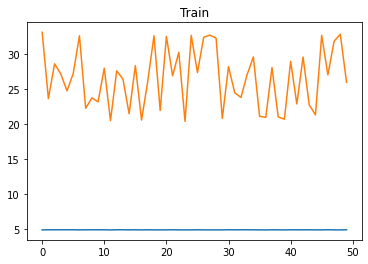

2/2 [==============================] - 4s 10ms/step


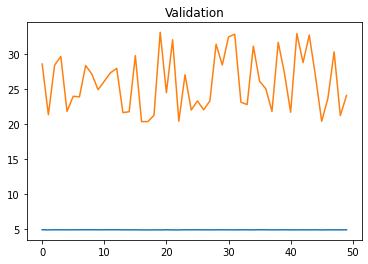

3/3 [==============================] - 1s 233ms/step


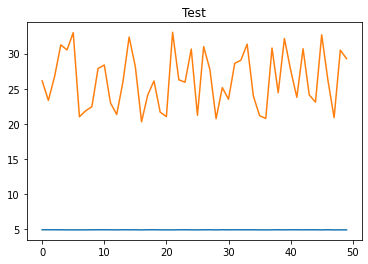

3/3 [==============================] - 0s 8ms/step


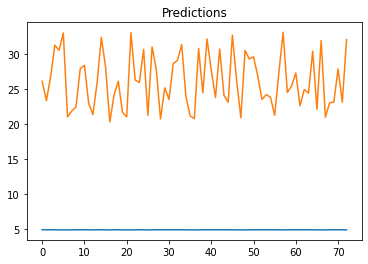

In [31]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [32]:
hybrid_rnn_lstm_mse

464.428720342072

### RNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 647.0101 - root_mean_squared_error: 25.4364

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 72s 6s/step - loss: 647.2648 - root_mean_squared_error: 25.4414 - val_loss: 674.1974 - val_root_mean_squared_error: 25.9653
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 640.4319 - root_mean_squared_error: 25.3068

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 634.4938 - root_mean_squared_error: 25.1892 - val_loss: 661.0607 - val_root_mean_squared_error: 25.7111
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 627.4412 - root_mean_squared_error: 25.0488

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 62s 9s/step - loss: 621.6927 - root_mean_squared_error: 24.9338 - val_loss: 648.1724 - val_root_mean_squared_error: 25.4592
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 608.1055 - root_mean_squared_error: 24.6598

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 609.1536 - root_mean_squared_error: 24.6810 - val_loss: 635.4694 - val_root_mean_squared_error: 25.2085
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 596.8497 - root_mean_squared_error: 24.4305

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 596.8497 - root_mean_squared_error: 24.4305 - val_loss: 622.8792 - val_root_mean_squared_error: 24.9575
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 584.6814 - root_mean_squared_error: 24.1802

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 584.6814 - root_mean_squared_error: 24.1802 - val_loss: 610.4922 - val_root_mean_squared_error: 24.7081
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 572.7379 - root_mean_squared_error: 23.9319

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 572.7379 - root_mean_squared_error: 23.9319 - val_loss: 598.3734 - val_root_mean_squared_error: 24.4617
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 564.0559 - root_mean_squared_error: 23.7499

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 561.1232 - root_mean_squared_error: 23.6880 - val_loss: 586.5773 - val_root_mean_squared_error: 24.2194
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 552.0877 - root_mean_squared_error: 23.4965

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 549.7292 - root_mean_squared_error: 23.4463 - val_loss: 575.1998 - val_root_mean_squared_error: 23.9833
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 538.8263 - root_mean_squared_error: 23.2126

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 538.8263 - root_mean_squared_error: 23.2126 - val_loss: 564.1417 - val_root_mean_squared_error: 23.7517
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 535.1214 - root_mean_squared_error: 23.1327

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 528.1938 - root_mean_squared_error: 22.9825 - val_loss: 553.4700 - val_root_mean_squared_error: 23.5259
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 517.9722 - root_mean_squared_error: 22.7590

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 517.9722 - root_mean_squared_error: 22.7590 - val_loss: 543.1985 - val_root_mean_squared_error: 23.3066
Epoch 13/30
6/8 [=====================>........] - ETA: 0s - loss: 497.8718 - root_mean_squared_error: 22.3130

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 508.0618 - root_mean_squared_error: 22.5402 - val_loss: 533.2611 - val_root_mean_squared_error: 23.0924
Epoch 14/30
4/8 [==============>...............] - ETA: 0s - loss: 489.0606 - root_mean_squared_error: 22.1147

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 498.6022 - root_mean_squared_error: 22.3294 - val_loss: 523.6695 - val_root_mean_squared_error: 22.8838
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 489.7371 - root_mean_squared_error: 22.1300

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 489.5098 - root_mean_squared_error: 22.1249 - val_loss: 514.4431 - val_root_mean_squared_error: 22.6813
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 480.6559 - root_mean_squared_error: 21.9239

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 480.6559 - root_mean_squared_error: 21.9239 - val_loss: 505.5982 - val_root_mean_squared_error: 22.4855
Epoch 17/30
4/8 [==============>...............] - ETA: 0s - loss: 487.9131 - root_mean_squared_error: 22.0888

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 472.2051 - root_mean_squared_error: 21.7303 - val_loss: 497.0320 - val_root_mean_squared_error: 22.2942
Epoch 18/30
5/8 [=================>............] - ETA: 0s - loss: 467.4284 - root_mean_squared_error: 21.6201

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 464.0171 - root_mean_squared_error: 21.5411 - val_loss: 488.7460 - val_root_mean_squared_error: 22.1076
Epoch 19/30
6/8 [=====================>........] - ETA: 0s - loss: 455.7730 - root_mean_squared_error: 21.3488

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 456.0811 - root_mean_squared_error: 21.3561 - val_loss: 480.7448 - val_root_mean_squared_error: 21.9259
Epoch 20/30
5/8 [=================>............] - ETA: 0s - loss: 449.3271 - root_mean_squared_error: 21.1973

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 448.3893 - root_mean_squared_error: 21.1752 - val_loss: 472.9754 - val_root_mean_squared_error: 21.7480
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 440.9373 - root_mean_squared_error: 20.9985

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 440.9373 - root_mean_squared_error: 20.9985 - val_loss: 465.3782 - val_root_mean_squared_error: 21.5726
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 433.6374 - root_mean_squared_error: 20.8240

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 433.6374 - root_mean_squared_error: 20.8240 - val_loss: 457.9124 - val_root_mean_squared_error: 21.3989
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 424.3183 - root_mean_squared_error: 20.5990

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 426.4477 - root_mean_squared_error: 20.6506 - val_loss: 450.6651 - val_root_mean_squared_error: 21.2289
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 419.5107 - root_mean_squared_error: 20.4820

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 39s 6s/step - loss: 419.5107 - root_mean_squared_error: 20.4820 - val_loss: 443.5803 - val_root_mean_squared_error: 21.0613
Epoch 25/30
6/8 [=====================>........] - ETA: 0s - loss: 417.5617 - root_mean_squared_error: 20.4343

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 412.7592 - root_mean_squared_error: 20.3165 - val_loss: 436.8184 - val_root_mean_squared_error: 20.9002
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 406.3916 - root_mean_squared_error: 20.1592

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 406.3916 - root_mean_squared_error: 20.1592 - val_loss: 430.4958 - val_root_mean_squared_error: 20.7484
Epoch 27/30
6/8 [=====================>........] - ETA: 0s - loss: 401.8371 - root_mean_squared_error: 20.0459

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 400.4212 - root_mean_squared_error: 20.0105 - val_loss: 424.6210 - val_root_mean_squared_error: 20.6063
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 394.8892 - root_mean_squared_error: 19.8718

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 394.8892 - root_mean_squared_error: 19.8718 - val_loss: 419.1164 - val_root_mean_squared_error: 20.4723
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 389.7103 - root_mean_squared_error: 19.7411

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 389.7103 - root_mean_squared_error: 19.7411 - val_loss: 413.9859 - val_root_mean_squared_error: 20.3466
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 386.3717 - root_mean_squared_error: 19.6563

INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_rnn_gru/assets


8/8 [==============================] - 3s 11ms/step


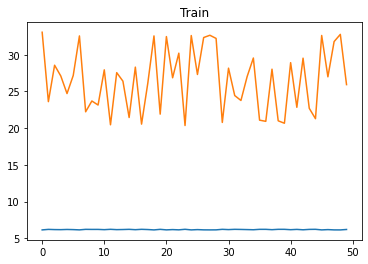

2/2 [==============================] - 3s 24ms/step


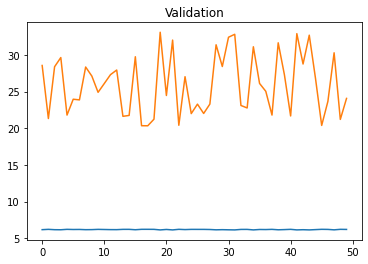

3/3 [==============================] - 1s 207ms/step


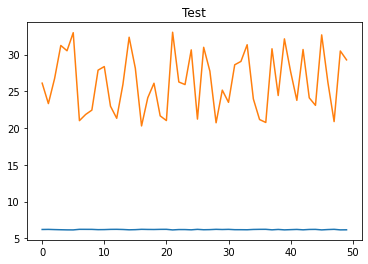

3/3 [==============================] - 1s 217ms/step


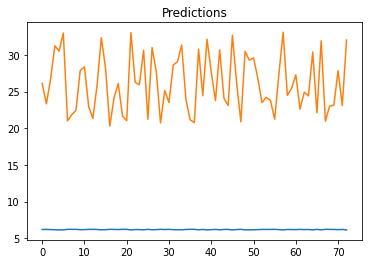

In [33]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [34]:
hybrid_rnn_gru_mse

411.85825557018467

### CNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 633.0231 - root_mean_squared_error: 25.1600

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 96s 9s/step - loss: 630.1679 - root_mean_squared_error: 25.1031 - val_loss: 648.8028 - val_root_mean_squared_error: 25.4716
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 605.2585 - root_mean_squared_error: 24.6020

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 86s 11s/step - loss: 605.2585 - root_mean_squared_error: 24.6020 - val_loss: 623.2501 - val_root_mean_squared_error: 24.9650
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 580.6483 - root_mean_squared_error: 24.0966

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 67s 10s/step - loss: 580.6483 - root_mean_squared_error: 24.0966 - val_loss: 598.2491 - val_root_mean_squared_error: 24.4591
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 561.0306 - root_mean_squared_error: 23.6861

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 72s 10s/step - loss: 556.8195 - root_mean_squared_error: 23.5970 - val_loss: 574.6608 - val_root_mean_squared_error: 23.9721
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 534.6062 - root_mean_squared_error: 23.1216

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 69s 10s/step - loss: 534.6062 - root_mean_squared_error: 23.1216 - val_loss: 553.0891 - val_root_mean_squared_error: 23.5178
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 513.1520 - root_mean_squared_error: 22.6529

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 514.2705 - root_mean_squared_error: 22.6775 - val_loss: 533.4672 - val_root_mean_squared_error: 23.0969
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 494.8031 - root_mean_squared_error: 22.2442

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 495.9144 - root_mean_squared_error: 22.2691 - val_loss: 515.6868 - val_root_mean_squared_error: 22.7087
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 479.3315 - root_mean_squared_error: 21.8936

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 79s 11s/step - loss: 479.3315 - root_mean_squared_error: 21.8936 - val_loss: 499.6343 - val_root_mean_squared_error: 22.3525
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 464.3351 - root_mean_squared_error: 21.5484

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 75s 10s/step - loss: 464.3351 - root_mean_squared_error: 21.5484 - val_loss: 485.1643 - val_root_mean_squared_error: 22.0264
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 450.8730 - root_mean_squared_error: 21.2338

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 80s 11s/step - loss: 450.8730 - root_mean_squared_error: 21.2338 - val_loss: 472.1228 - val_root_mean_squared_error: 21.7284
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 438.6863 - root_mean_squared_error: 20.9448

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 74s 10s/step - loss: 438.6863 - root_mean_squared_error: 20.9448 - val_loss: 460.3528 - val_root_mean_squared_error: 21.4558
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 427.6858 - root_mean_squared_error: 20.6806

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 66s 9s/step - loss: 427.6858 - root_mean_squared_error: 20.6806 - val_loss: 449.6389 - val_root_mean_squared_error: 21.2047
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 417.7381 - root_mean_squared_error: 20.4386

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 86s 12s/step - loss: 417.7381 - root_mean_squared_error: 20.4386 - val_loss: 439.8905 - val_root_mean_squared_error: 20.9736
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 411.7215 - root_mean_squared_error: 20.2909

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 66s 9s/step - loss: 408.6351 - root_mean_squared_error: 20.2147 - val_loss: 431.1562 - val_root_mean_squared_error: 20.7643
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 400.5662 - root_mean_squared_error: 20.0142

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 70s 10s/step - loss: 400.5662 - root_mean_squared_error: 20.0142 - val_loss: 423.3363 - val_root_mean_squared_error: 20.5751
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 393.3060 - root_mean_squared_error: 19.8319

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 57s 8s/step - loss: 393.3060 - root_mean_squared_error: 19.8319 - val_loss: 416.2870 - val_root_mean_squared_error: 20.4031
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 386.8009 - root_mean_squared_error: 19.6673

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 67s 10s/step - loss: 386.8009 - root_mean_squared_error: 19.6673 - val_loss: 409.9342 - val_root_mean_squared_error: 20.2468
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 380.9104 - root_mean_squared_error: 19.5169

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 81s 11s/step - loss: 380.9104 - root_mean_squared_error: 19.5169 - val_loss: 404.2358 - val_root_mean_squared_error: 20.1056
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 375.6026 - root_mean_squared_error: 19.3805

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 63s 9s/step - loss: 375.6026 - root_mean_squared_error: 19.3805 - val_loss: 399.0411 - val_root_mean_squared_error: 19.9760
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 370.7587 - root_mean_squared_error: 19.2551

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 65s 9s/step - loss: 370.7587 - root_mean_squared_error: 19.2551 - val_loss: 394.2919 - val_root_mean_squared_error: 19.8568
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 369.4217 - root_mean_squared_error: 19.2203

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 56s 8s/step - loss: 366.3247 - root_mean_squared_error: 19.1396 - val_loss: 389.9643 - val_root_mean_squared_error: 19.7475
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 362.2839 - root_mean_squared_error: 19.0338

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 73s 10s/step - loss: 362.2839 - root_mean_squared_error: 19.0338 - val_loss: 385.9771 - val_root_mean_squared_error: 19.6463
Epoch 23/30
7/8 [=========================>....] - ETA: 0s - loss: 357.7156 - root_mean_squared_error: 18.9134

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 72s 10s/step - loss: 358.5410 - root_mean_squared_error: 18.9352 - val_loss: 382.2823 - val_root_mean_squared_error: 19.5520
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 351.5186 - root_mean_squared_error: 18.7488

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 355.0594 - root_mean_squared_error: 18.8430 - val_loss: 378.8227 - val_root_mean_squared_error: 19.4634
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 351.8059 - root_mean_squared_error: 18.7565

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 80s 11s/step - loss: 351.8059 - root_mean_squared_error: 18.7565 - val_loss: 375.5878 - val_root_mean_squared_error: 19.3801
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 348.7819 - root_mean_squared_error: 18.6757

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 348.7819 - root_mean_squared_error: 18.6757 - val_loss: 372.5969 - val_root_mean_squared_error: 19.3028
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 345.9725 - root_mean_squared_error: 18.6003

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 65s 9s/step - loss: 345.9725 - root_mean_squared_error: 18.6003 - val_loss: 369.8312 - val_root_mean_squared_error: 19.2310
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 343.4478 - root_mean_squared_error: 18.5323

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 65s 9s/step - loss: 343.3895 - root_mean_squared_error: 18.5308 - val_loss: 367.2739 - val_root_mean_squared_error: 19.1644
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 340.9965 - root_mean_squared_error: 18.4661

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 75s 11s/step - loss: 340.9965 - root_mean_squared_error: 18.4661 - val_loss: 364.8816 - val_root_mean_squared_error: 19.1019
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 338.7447 - root_mean_squared_error: 18.4050

INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_gru/assets


8/8 [==============================] - 7s 54ms/step


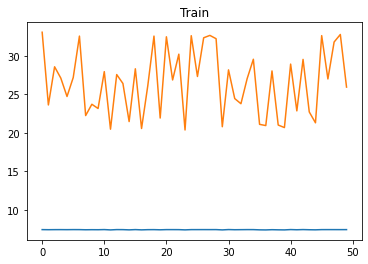

2/2 [==============================] - 9s 354ms/step


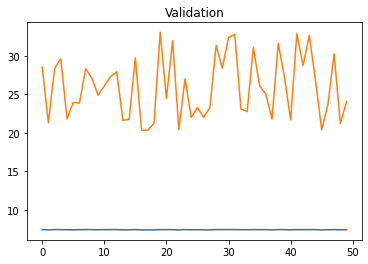

3/3 [==============================] - 0s 54ms/step


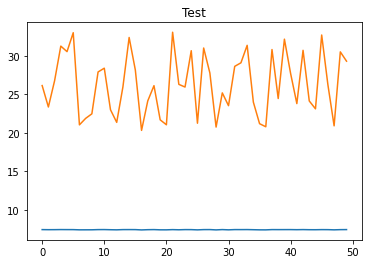

3/3 [==============================] - 0s 8ms/step


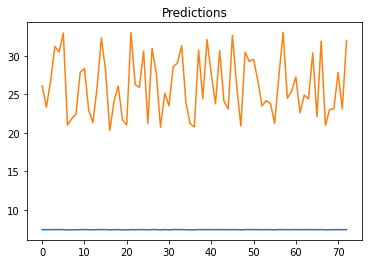

In [35]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [36]:
hybrid_cnn_gru_mse

365.0585225705652

### CNN RNN GRU

Epoch 1/30
7/8 [=========================>....] - ETA: 0s - loss: 635.3472 - root_mean_squared_error: 25.2061

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 85s 7s/step - loss: 634.3683 - root_mean_squared_error: 25.1867 - val_loss: 654.5391 - val_root_mean_squared_error: 25.5840
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 611.8629 - root_mean_squared_error: 24.7359

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 611.8629 - root_mean_squared_error: 24.7359 - val_loss: 633.1977 - val_root_mean_squared_error: 25.1634
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 591.9338 - root_mean_squared_error: 24.3297

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 61s 9s/step - loss: 591.9338 - root_mean_squared_error: 24.3297 - val_loss: 614.2604 - val_root_mean_squared_error: 24.7843
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 574.0718 - root_mean_squared_error: 23.9598

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 574.0718 - root_mean_squared_error: 23.9598 - val_loss: 596.6667 - val_root_mean_squared_error: 24.4268
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 555.7239 - root_mean_squared_error: 23.5738

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 64s 9s/step - loss: 557.0550 - root_mean_squared_error: 23.6020 - val_loss: 579.5202 - val_root_mean_squared_error: 24.0732
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 540.3192 - root_mean_squared_error: 23.2448

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 540.3192 - root_mean_squared_error: 23.2448 - val_loss: 562.0097 - val_root_mean_squared_error: 23.7067
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 525.3329 - root_mean_squared_error: 22.9201

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 32s 4s/step - loss: 523.0561 - root_mean_squared_error: 22.8704 - val_loss: 543.4318 - val_root_mean_squared_error: 23.3116
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 504.5562 - root_mean_squared_error: 22.4623

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 63s 9s/step - loss: 504.5562 - root_mean_squared_error: 22.4623 - val_loss: 523.3194 - val_root_mean_squared_error: 22.8762
Epoch 9/30
7/8 [=========================>....] - ETA: 0s - loss: 482.9504 - root_mean_squared_error: 21.9761

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 484.6554 - root_mean_squared_error: 22.0149 - val_loss: 501.9970 - val_root_mean_squared_error: 22.4053
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 463.3032 - root_mean_squared_error: 21.5245

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 464.0977 - root_mean_squared_error: 21.5429 - val_loss: 481.3093 - val_root_mean_squared_error: 21.9388
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 443.2477 - root_mean_squared_error: 21.0534

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 444.5828 - root_mean_squared_error: 21.0851 - val_loss: 461.8883 - val_root_mean_squared_error: 21.4916
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 424.9742 - root_mean_squared_error: 20.6149

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 63s 9s/step - loss: 426.2393 - root_mean_squared_error: 20.6456 - val_loss: 443.7045 - val_root_mean_squared_error: 21.0643
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 409.9618 - root_mean_squared_error: 20.2475

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 409.3012 - root_mean_squared_error: 20.2312 - val_loss: 427.3606 - val_root_mean_squared_error: 20.6727
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 394.2377 - root_mean_squared_error: 19.8554

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 394.2377 - root_mean_squared_error: 19.8554 - val_loss: 412.9617 - val_root_mean_squared_error: 20.3215
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 380.9524 - root_mean_squared_error: 19.5180

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 380.9524 - root_mean_squared_error: 19.5180 - val_loss: 400.0120 - val_root_mean_squared_error: 20.0003
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 368.9561 - root_mean_squared_error: 19.2082

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 368.9561 - root_mean_squared_error: 19.2082 - val_loss: 388.4800 - val_root_mean_squared_error: 19.7099
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 358.4185 - root_mean_squared_error: 18.9319

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 39s 5s/step - loss: 358.4185 - root_mean_squared_error: 18.9319 - val_loss: 378.3546 - val_root_mean_squared_error: 19.4513
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 350.5320 - root_mean_squared_error: 18.7225

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 349.1129 - root_mean_squared_error: 18.6846 - val_loss: 369.4355 - val_root_mean_squared_error: 19.2207
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 341.0125 - root_mean_squared_error: 18.4665

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 341.0125 - root_mean_squared_error: 18.4665 - val_loss: 361.6179 - val_root_mean_squared_error: 19.0163
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 333.7832 - root_mean_squared_error: 18.2697

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 333.7832 - root_mean_squared_error: 18.2697 - val_loss: 354.7064 - val_root_mean_squared_error: 18.8337
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 329.4069 - root_mean_squared_error: 18.1496

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 327.4206 - root_mean_squared_error: 18.0948 - val_loss: 348.3070 - val_root_mean_squared_error: 18.6630
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 321.3927 - root_mean_squared_error: 17.9274

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 321.3927 - root_mean_squared_error: 17.9274 - val_loss: 342.3694 - val_root_mean_squared_error: 18.5032
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 315.7859 - root_mean_squared_error: 17.7704

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 50s 6s/step - loss: 315.7859 - root_mean_squared_error: 17.7704 - val_loss: 336.7502 - val_root_mean_squared_error: 18.3508
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 310.7312 - root_mean_squared_error: 17.6276

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 310.4995 - root_mean_squared_error: 17.6210 - val_loss: 331.3632 - val_root_mean_squared_error: 18.2034
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 305.3837 - root_mean_squared_error: 17.4752

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 53s 8s/step - loss: 305.3837 - root_mean_squared_error: 17.4752 - val_loss: 326.2102 - val_root_mean_squared_error: 18.0613
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 299.4999 - root_mean_squared_error: 17.3061

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 300.4955 - root_mean_squared_error: 17.3348 - val_loss: 321.2604 - val_root_mean_squared_error: 17.9237
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 295.8094 - root_mean_squared_error: 17.1991

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 295.8094 - root_mean_squared_error: 17.1991 - val_loss: 316.4932 - val_root_mean_squared_error: 17.7903
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 291.2957 - root_mean_squared_error: 17.0674

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 291.2957 - root_mean_squared_error: 17.0674 - val_loss: 311.9057 - val_root_mean_squared_error: 17.6609
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 286.9533 - root_mean_squared_error: 16.9397

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 286.9533 - root_mean_squared_error: 16.9397 - val_loss: 307.4438 - val_root_mean_squared_error: 17.5341
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 282.7200 - root_mean_squared_error: 16.8143

INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 12s 46ms/step


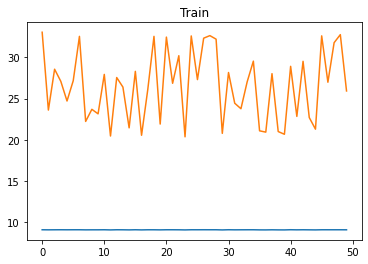

2/2 [==============================] - 4s 21ms/step


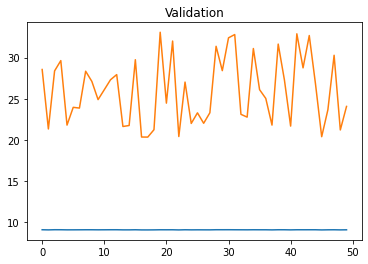

3/3 [==============================] - 0s 11ms/step


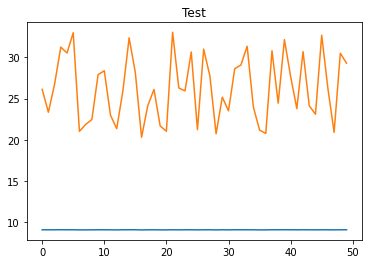

3/3 [==============================] - 0s 8ms/step


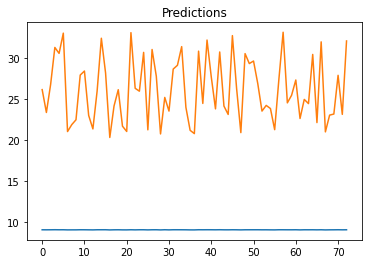

In [37]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [38]:
hybrid_cnn_rnn_gru_mse

305.3237587540358

### LSTM RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 650.1436 - root_mean_squared_error: 25.4979

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 154s 14s/step - loss: 650.1436 - root_mean_squared_error: 25.4979 - val_loss: 671.6874 - val_root_mean_squared_error: 25.9169
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 628.2125 - root_mean_squared_error: 25.0642

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 89s 13s/step - loss: 628.3956 - root_mean_squared_error: 25.0678 - val_loss: 649.3338 - val_root_mean_squared_error: 25.4820
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 606.3274 - root_mean_squared_error: 24.6237

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 83s 12s/step - loss: 606.3274 - root_mean_squared_error: 24.6237 - val_loss: 625.8564 - val_root_mean_squared_error: 25.0171
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 582.7749 - root_mean_squared_error: 24.1407

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 98s 14s/step - loss: 582.7749 - root_mean_squared_error: 24.1407 - val_loss: 600.1845 - val_root_mean_squared_error: 24.4987
Epoch 5/30
7/8 [=========================>....] - ETA: 0s - loss: 559.6287 - root_mean_squared_error: 23.6565

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 83s 12s/step - loss: 556.8218 - root_mean_squared_error: 23.5971 - val_loss: 571.6770 - val_root_mean_squared_error: 23.9098
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 527.9383 - root_mean_squared_error: 22.9769

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 97s 14s/step - loss: 527.9383 - root_mean_squared_error: 22.9769 - val_loss: 539.9113 - val_root_mean_squared_error: 23.2360
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 495.3528 - root_mean_squared_error: 22.2565

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 87s 12s/step - loss: 495.7940 - root_mean_squared_error: 22.2664 - val_loss: 505.2773 - val_root_mean_squared_error: 22.4784
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 461.3633 - root_mean_squared_error: 21.4794

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 96s 14s/step - loss: 461.3633 - root_mean_squared_error: 21.4794 - val_loss: 468.6770 - val_root_mean_squared_error: 21.6490
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 425.8694 - root_mean_squared_error: 20.6366

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 91s 12s/step - loss: 425.8694 - root_mean_squared_error: 20.6366 - val_loss: 431.6188 - val_root_mean_squared_error: 20.7754
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 390.6052 - root_mean_squared_error: 19.7637

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 99s 14s/step - loss: 390.6052 - root_mean_squared_error: 19.7637 - val_loss: 396.2750 - val_root_mean_squared_error: 19.9067
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 357.5038 - root_mean_squared_error: 18.9078

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 108s 15s/step - loss: 357.6046 - root_mean_squared_error: 18.9104 - val_loss: 364.1872 - val_root_mean_squared_error: 19.0837
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 325.5627 - root_mean_squared_error: 18.0434

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 78s 11s/step - loss: 328.1965 - root_mean_squared_error: 18.1162 - val_loss: 336.5115 - val_root_mean_squared_error: 18.3442
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 303.2933 - root_mean_squared_error: 17.4153

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 80s 11s/step - loss: 303.2933 - root_mean_squared_error: 17.4153 - val_loss: 313.5560 - val_root_mean_squared_error: 17.7075
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 282.9554 - root_mean_squared_error: 16.8213

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 88s 12s/step - loss: 282.9554 - root_mean_squared_error: 16.8213 - val_loss: 295.1896 - val_root_mean_squared_error: 17.1811
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 266.8542 - root_mean_squared_error: 16.3357

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 105s 15s/step - loss: 266.8542 - root_mean_squared_error: 16.3357 - val_loss: 280.4851 - val_root_mean_squared_error: 16.7477
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 254.1544 - root_mean_squared_error: 15.9422

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 98s 14s/step - loss: 253.8564 - root_mean_squared_error: 15.9329 - val_loss: 268.8419 - val_root_mean_squared_error: 16.3964
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 243.6816 - root_mean_squared_error: 15.6103

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 102s 14s/step - loss: 243.6816 - root_mean_squared_error: 15.6103 - val_loss: 259.3596 - val_root_mean_squared_error: 16.1046
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 235.2169 - root_mean_squared_error: 15.3368

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 102s 14s/step - loss: 235.2169 - root_mean_squared_error: 15.3368 - val_loss: 251.6149 - val_root_mean_squared_error: 15.8624
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 228.3386 - root_mean_squared_error: 15.1109

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 86s 12s/step - loss: 228.3386 - root_mean_squared_error: 15.1109 - val_loss: 245.1023 - val_root_mean_squared_error: 15.6557
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 224.6962 - root_mean_squared_error: 14.9899

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 91s 13s/step - loss: 222.5319 - root_mean_squared_error: 14.9175 - val_loss: 239.5970 - val_root_mean_squared_error: 15.4789
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 217.5744 - root_mean_squared_error: 14.7504

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 102s 14s/step - loss: 217.5744 - root_mean_squared_error: 14.7504 - val_loss: 234.9306 - val_root_mean_squared_error: 15.3274
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 213.3652 - root_mean_squared_error: 14.6070

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 82s 11s/step - loss: 213.3652 - root_mean_squared_error: 14.6070 - val_loss: 230.8186 - val_root_mean_squared_error: 15.1927
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 209.6195 - root_mean_squared_error: 14.4782

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 86s 12s/step - loss: 209.6195 - root_mean_squared_error: 14.4782 - val_loss: 227.1926 - val_root_mean_squared_error: 15.0729
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 206.2870 - root_mean_squared_error: 14.3627

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 76s 11s/step - loss: 206.2870 - root_mean_squared_error: 14.3627 - val_loss: 223.8851 - val_root_mean_squared_error: 14.9628
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 203.2534 - root_mean_squared_error: 14.2567

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 93s 13s/step - loss: 203.2534 - root_mean_squared_error: 14.2567 - val_loss: 220.8485 - val_root_mean_squared_error: 14.8610
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 201.1970 - root_mean_squared_error: 14.1844

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 87s 12s/step - loss: 200.4425 - root_mean_squared_error: 14.1578 - val_loss: 218.0414 - val_root_mean_squared_error: 14.7662
Epoch 27/30
7/8 [=========================>....] - ETA: 0s - loss: 195.9964 - root_mean_squared_error: 13.9999

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 94s 13s/step - loss: 197.8292 - root_mean_squared_error: 14.0652 - val_loss: 215.4160 - val_root_mean_squared_error: 14.6771
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 195.3850 - root_mean_squared_error: 13.9780

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 72s 10s/step - loss: 195.3850 - root_mean_squared_error: 13.9780 - val_loss: 212.9295 - val_root_mean_squared_error: 14.5921
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 193.0888 - root_mean_squared_error: 13.8956

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 97s 14s/step - loss: 193.0888 - root_mean_squared_error: 13.8956 - val_loss: 210.6060 - val_root_mean_squared_error: 14.5123
Epoch 30/30
7/8 [=========================>....] - ETA: 0s - loss: 191.6015 - root_mean_squared_error: 13.8420

INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 11s 33ms/step


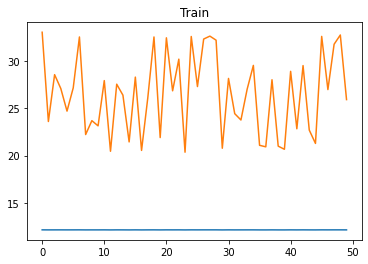

2/2 [==============================] - 4s 20ms/step


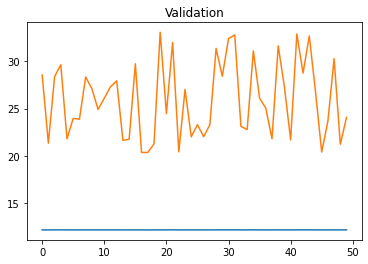

3/3 [==============================] - 1s 91ms/step


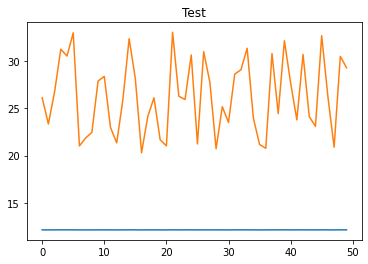

3/3 [==============================] - 0s 12ms/step


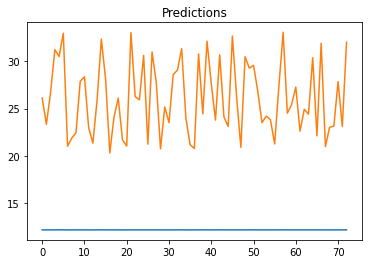

In [39]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [40]:
hybrid_lstm_rnn_gru_mse

210.13534071945048

## Moving Average

### CNN LSTM

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 651.8941 - root_mean_squared_error: 25.5322

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 146s 17s/step - loss: 651.8941 - root_mean_squared_error: 25.5322 - val_loss: 679.7697 - val_root_mean_squared_error: 26.0724
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 637.3074 - root_mean_squared_error: 25.2449

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 71s 10s/step - loss: 637.3074 - root_mean_squared_error: 25.2449 - val_loss: 665.0939 - val_root_mean_squared_error: 25.7894
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 623.1268 - root_mean_squared_error: 24.9625

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 83s 12s/step - loss: 623.1268 - root_mean_squared_error: 24.9625 - val_loss: 650.8759 - val_root_mean_squared_error: 25.5123
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 609.4860 - root_mean_squared_error: 24.6878

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 74s 10s/step - loss: 609.4860 - root_mean_squared_error: 24.6878 - val_loss: 636.8812 - val_root_mean_squared_error: 25.2365
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 595.7820 - root_mean_squared_error: 24.4086

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 84s 12s/step - loss: 595.7820 - root_mean_squared_error: 24.4086 - val_loss: 622.4545 - val_root_mean_squared_error: 24.9490
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 581.5046 - root_mean_squared_error: 24.1144

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 89s 13s/step - loss: 581.5046 - root_mean_squared_error: 24.1144 - val_loss: 607.4426 - val_root_mean_squared_error: 24.6464
Epoch 7/30
7/8 [=========================>....] - ETA: 0s - loss: 568.3625 - root_mean_squared_error: 23.8404

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 84s 12s/step - loss: 566.9376 - root_mean_squared_error: 23.8105 - val_loss: 592.7993 - val_root_mean_squared_error: 24.3475
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 553.3063 - root_mean_squared_error: 23.5225

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 90s 13s/step - loss: 553.3063 - root_mean_squared_error: 23.5225 - val_loss: 579.2318 - val_root_mean_squared_error: 24.0672
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 540.5538 - root_mean_squared_error: 23.2498

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 90s 13s/step - loss: 540.5538 - root_mean_squared_error: 23.2498 - val_loss: 566.5938 - val_root_mean_squared_error: 23.8032
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 528.5789 - root_mean_squared_error: 22.9908

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 99s 14s/step - loss: 528.5789 - root_mean_squared_error: 22.9908 - val_loss: 554.6456 - val_root_mean_squared_error: 23.5509
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 517.2534 - root_mean_squared_error: 22.7432

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 91s 13s/step - loss: 517.2534 - root_mean_squared_error: 22.7432 - val_loss: 543.2685 - val_root_mean_squared_error: 23.3081
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 507.2873 - root_mean_squared_error: 22.5230

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 83s 12s/step - loss: 506.3498 - root_mean_squared_error: 22.5022 - val_loss: 532.1238 - val_root_mean_squared_error: 23.0678
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 495.6023 - root_mean_squared_error: 22.2621

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 78s 11s/step - loss: 495.6023 - root_mean_squared_error: 22.2621 - val_loss: 521.1204 - val_root_mean_squared_error: 22.8281
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 485.0284 - root_mean_squared_error: 22.0234

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 83s 12s/step - loss: 485.0284 - root_mean_squared_error: 22.0234 - val_loss: 510.3245 - val_root_mean_squared_error: 22.5904
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 476.0793 - root_mean_squared_error: 21.8192

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 104s 15s/step - loss: 474.7081 - root_mean_squared_error: 21.7878 - val_loss: 499.9041 - val_root_mean_squared_error: 22.3585
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 464.8664 - root_mean_squared_error: 21.5608

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 86s 12s/step - loss: 464.8664 - root_mean_squared_error: 21.5608 - val_loss: 490.1594 - val_root_mean_squared_error: 22.1395
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 455.7265 - root_mean_squared_error: 21.3478

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 86s 12s/step - loss: 455.7265 - root_mean_squared_error: 21.3478 - val_loss: 481.1906 - val_root_mean_squared_error: 21.9361
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 447.3345 - root_mean_squared_error: 21.1503

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 78s 11s/step - loss: 447.3345 - root_mean_squared_error: 21.1503 - val_loss: 472.9187 - val_root_mean_squared_error: 21.7467
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 439.6476 - root_mean_squared_error: 20.9678

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 102s 13s/step - loss: 439.6476 - root_mean_squared_error: 20.9678 - val_loss: 465.3102 - val_root_mean_squared_error: 21.5711
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 432.0742 - root_mean_squared_error: 20.7864

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 72s 10s/step - loss: 432.5667 - root_mean_squared_error: 20.7982 - val_loss: 458.2337 - val_root_mean_squared_error: 21.4064
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 425.8978 - root_mean_squared_error: 20.6373

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 81s 11s/step - loss: 425.8978 - root_mean_squared_error: 20.6373 - val_loss: 451.6100 - val_root_mean_squared_error: 21.2511
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 417.5158 - root_mean_squared_error: 20.4332

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 66s 9s/step - loss: 419.6341 - root_mean_squared_error: 20.4850 - val_loss: 445.3643 - val_root_mean_squared_error: 21.1037
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 413.7292 - root_mean_squared_error: 20.3403

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 88s 12s/step - loss: 413.7292 - root_mean_squared_error: 20.3403 - val_loss: 439.4758 - val_root_mean_squared_error: 20.9637
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 408.1795 - root_mean_squared_error: 20.2035

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 86s 11s/step - loss: 408.1795 - root_mean_squared_error: 20.2035 - val_loss: 433.9654 - val_root_mean_squared_error: 20.8318
Epoch 25/30
7/8 [=========================>....] - ETA: 0s - loss: 403.6355 - root_mean_squared_error: 20.0907

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 71s 10s/step - loss: 403.0229 - root_mean_squared_error: 20.0754 - val_loss: 428.7917 - val_root_mean_squared_error: 20.7073
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 401.1796 - root_mean_squared_error: 20.0295

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 86s 12s/step - loss: 398.1414 - root_mean_squared_error: 19.9535 - val_loss: 423.9355 - val_root_mean_squared_error: 20.5897
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 393.5681 - root_mean_squared_error: 19.8386

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 99s 14s/step - loss: 393.5681 - root_mean_squared_error: 19.8386 - val_loss: 419.3879 - val_root_mean_squared_error: 20.4790
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 389.2712 - root_mean_squared_error: 19.7300

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 84s 12s/step - loss: 389.2712 - root_mean_squared_error: 19.7300 - val_loss: 415.0670 - val_root_mean_squared_error: 20.3732
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 385.1612 - root_mean_squared_error: 19.6255

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 70s 10s/step - loss: 385.1612 - root_mean_squared_error: 19.6255 - val_loss: 410.9312 - val_root_mean_squared_error: 20.2714
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 381.2717 - root_mean_squared_error: 19.5262

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_lstm/assets


8/8 [==============================] - 12s 104ms/step


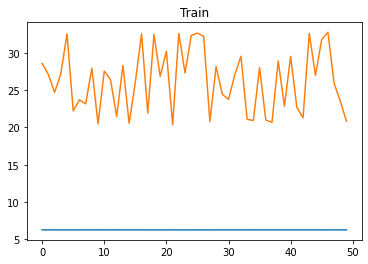

2/2 [==============================] - 10s 49ms/step


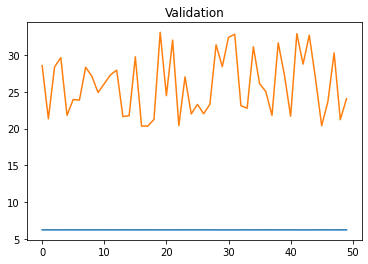

3/3 [==============================] - 1s 394ms/step


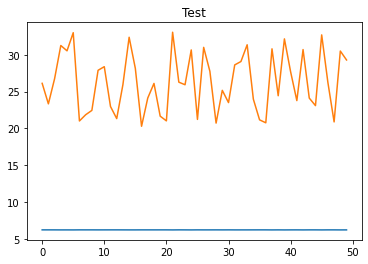

3/3 [==============================] - 0s 28ms/step


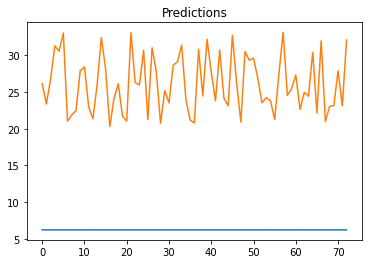

In [41]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [42]:
mavg_hybrid_cnn_lstm_mse

409.5369665755458

### RNN LSTM

Epoch 1/30
5/8 [=================>............] - ETA: 0s - loss: 653.0327 - root_mean_squared_error: 25.5545

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 103s 11s/step - loss: 648.0303 - root_mean_squared_error: 25.4564 - val_loss: 679.2401 - val_root_mean_squared_error: 26.0622
Epoch 2/30
5/8 [=================>............] - ETA: 0s - loss: 649.0472 - root_mean_squared_error: 25.4764

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 639.4973 - root_mean_squared_error: 25.2883 - val_loss: 670.4026 - val_root_mean_squared_error: 25.8921
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 630.8022 - root_mean_squared_error: 25.1158

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 52s 7s/step - loss: 630.8022 - root_mean_squared_error: 25.1158 - val_loss: 661.4139 - val_root_mean_squared_error: 25.7180
Epoch 4/30
7/8 [=========================>....] - ETA: 0s - loss: 618.8541 - root_mean_squared_error: 24.8768

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 47s 7s/step - loss: 621.9609 - root_mean_squared_error: 24.9391 - val_loss: 652.3171 - val_root_mean_squared_error: 25.5405
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 613.0750 - root_mean_squared_error: 24.7604

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 73s 10s/step - loss: 613.0750 - root_mean_squared_error: 24.7604 - val_loss: 643.1543 - val_root_mean_squared_error: 25.3605
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 605.3183 - root_mean_squared_error: 24.6032

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 604.2056 - root_mean_squared_error: 24.5806 - val_loss: 634.0454 - val_root_mean_squared_error: 25.1803
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 595.3840 - root_mean_squared_error: 24.4005

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 595.3840 - root_mean_squared_error: 24.4005 - val_loss: 625.0685 - val_root_mean_squared_error: 25.0014
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 586.7131 - root_mean_squared_error: 24.2222

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 69s 10s/step - loss: 586.7131 - root_mean_squared_error: 24.2222 - val_loss: 616.2212 - val_root_mean_squared_error: 24.8238
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 583.5125 - root_mean_squared_error: 24.1560

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 578.1622 - root_mean_squared_error: 24.0450 - val_loss: 607.5158 - val_root_mean_squared_error: 24.6478
Epoch 10/30
5/8 [=================>............] - ETA: 0s - loss: 554.1594 - root_mean_squared_error: 23.5406

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 54s 8s/step - loss: 569.7583 - root_mean_squared_error: 23.8696 - val_loss: 598.9987 - val_root_mean_squared_error: 24.4744
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 561.5615 - root_mean_squared_error: 23.6973

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 67s 9s/step - loss: 561.5615 - root_mean_squared_error: 23.6973 - val_loss: 590.6340 - val_root_mean_squared_error: 24.3030
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 553.4569 - root_mean_squared_error: 23.5257

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 553.4569 - root_mean_squared_error: 23.5257 - val_loss: 582.4003 - val_root_mean_squared_error: 24.1330
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 545.5640 - root_mean_squared_error: 23.3573

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 67s 10s/step - loss: 545.5640 - root_mean_squared_error: 23.3573 - val_loss: 574.3032 - val_root_mean_squared_error: 23.9646
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 539.5606 - root_mean_squared_error: 23.2284

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 61s 9s/step - loss: 537.7960 - root_mean_squared_error: 23.1904 - val_loss: 566.4340 - val_root_mean_squared_error: 23.7999
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 530.2269 - root_mean_squared_error: 23.0267

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 530.2269 - root_mean_squared_error: 23.0267 - val_loss: 558.8121 - val_root_mean_squared_error: 23.6392
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 520.3688 - root_mean_squared_error: 22.8116

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 62s 9s/step - loss: 522.9230 - root_mean_squared_error: 22.8675 - val_loss: 551.3665 - val_root_mean_squared_error: 23.4812
Epoch 17/30
6/8 [=====================>........] - ETA: 0s - loss: 519.7587 - root_mean_squared_error: 22.7982

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 49s 7s/step - loss: 515.7597 - root_mean_squared_error: 22.7103 - val_loss: 544.1057 - val_root_mean_squared_error: 23.3261
Epoch 18/30
7/8 [=========================>....] - ETA: 0s - loss: 509.3803 - root_mean_squared_error: 22.5695

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 52s 7s/step - loss: 508.8178 - root_mean_squared_error: 22.5570 - val_loss: 537.1315 - val_root_mean_squared_error: 23.1761
Epoch 19/30
7/8 [=========================>....] - ETA: 0s - loss: 504.3934 - root_mean_squared_error: 22.4587

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 54s 8s/step - loss: 502.1601 - root_mean_squared_error: 22.4089 - val_loss: 530.4322 - val_root_mean_squared_error: 23.0311
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 495.7883 - root_mean_squared_error: 22.2663

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 54s 8s/step - loss: 495.7883 - root_mean_squared_error: 22.2663 - val_loss: 524.0345 - val_root_mean_squared_error: 22.8918
Epoch 21/30
6/8 [=====================>........] - ETA: 0s - loss: 492.8032 - root_mean_squared_error: 22.1992

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 56s 8s/step - loss: 489.7118 - root_mean_squared_error: 22.1294 - val_loss: 517.9081 - val_root_mean_squared_error: 22.7576
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 484.5819 - root_mean_squared_error: 22.0132

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 483.8887 - root_mean_squared_error: 21.9975 - val_loss: 512.0660 - val_root_mean_squared_error: 22.6289
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 478.3002 - root_mean_squared_error: 21.8701

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 51s 7s/step - loss: 478.3002 - root_mean_squared_error: 21.8701 - val_loss: 506.4965 - val_root_mean_squared_error: 22.5055
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 476.5098 - root_mean_squared_error: 21.8291

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 473.0188 - root_mean_squared_error: 21.7490 - val_loss: 501.1480 - val_root_mean_squared_error: 22.3863
Epoch 25/30
6/8 [=====================>........] - ETA: 0s - loss: 476.8177 - root_mean_squared_error: 21.8362

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 46s 7s/step - loss: 467.9345 - root_mean_squared_error: 21.6318 - val_loss: 496.0351 - val_root_mean_squared_error: 22.2718
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 463.0463 - root_mean_squared_error: 21.5185

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 59s 8s/step - loss: 463.0463 - root_mean_squared_error: 21.5185 - val_loss: 491.0782 - val_root_mean_squared_error: 22.1603
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 458.2795 - root_mean_squared_error: 21.4075

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 458.2795 - root_mean_squared_error: 21.4075 - val_loss: 486.2648 - val_root_mean_squared_error: 22.0514
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 453.7071 - root_mean_squared_error: 21.3004

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 70s 10s/step - loss: 453.7071 - root_mean_squared_error: 21.3004 - val_loss: 481.5738 - val_root_mean_squared_error: 21.9448
Epoch 29/30
6/8 [=====================>........] - ETA: 0s - loss: 451.4734 - root_mean_squared_error: 21.2479

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 449.2121 - root_mean_squared_error: 21.1946 - val_loss: 476.9892 - val_root_mean_squared_error: 21.8401
Epoch 30/30
6/8 [=====================>........] - ETA: 0s - loss: 446.3351 - root_mean_squared_error: 21.1266

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_lstm/assets


8/8 [==============================] - 14s 18ms/step


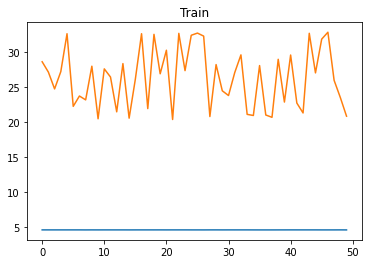

2/2 [==============================] - 2s 11ms/step


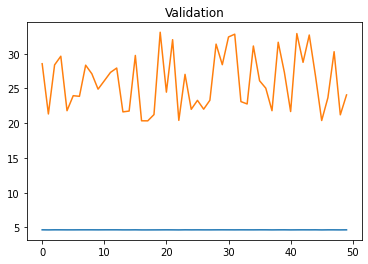

3/3 [==============================] - 1s 262ms/step


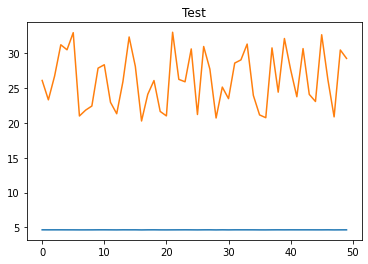

3/3 [==============================] - 0s 6ms/step


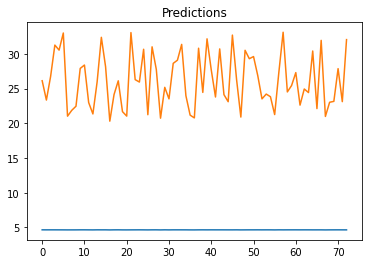

In [43]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(3,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [44]:
mavg_hybrid_rnn_lstm_mse

475.3681926727214

### RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 614.0811 - root_mean_squared_error: 24.7807

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 90s 9s/step - loss: 614.0811 - root_mean_squared_error: 24.7807 - val_loss: 639.4473 - val_root_mean_squared_error: 25.2873
Epoch 2/30
7/8 [=========================>....] - ETA: 0s - loss: 596.2173 - root_mean_squared_error: 24.4176

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 597.5815 - root_mean_squared_error: 24.4455 - val_loss: 622.7775 - val_root_mean_squared_error: 24.9555
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 581.5863 - root_mean_squared_error: 24.1161

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 581.5863 - root_mean_squared_error: 24.1161 - val_loss: 606.5107 - val_root_mean_squared_error: 24.6274
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 565.9384 - root_mean_squared_error: 23.7895

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 565.9384 - root_mean_squared_error: 23.7895 - val_loss: 590.7296 - val_root_mean_squared_error: 24.3049
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 550.8016 - root_mean_squared_error: 23.4692

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 550.8016 - root_mean_squared_error: 23.4692 - val_loss: 575.3119 - val_root_mean_squared_error: 23.9857
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 535.2731 - root_mean_squared_error: 23.1360

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 536.0984 - root_mean_squared_error: 23.1538 - val_loss: 560.4323 - val_root_mean_squared_error: 23.6735
Epoch 7/30
5/8 [=================>............] - ETA: 0s - loss: 517.3324 - root_mean_squared_error: 22.7449

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 61s 9s/step - loss: 521.8157 - root_mean_squared_error: 22.8433 - val_loss: 546.0256 - val_root_mean_squared_error: 23.3672
Epoch 8/30
6/8 [=====================>........] - ETA: 0s - loss: 510.1774 - root_mean_squared_error: 22.5871

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 508.0446 - root_mean_squared_error: 22.5398 - val_loss: 532.1322 - val_root_mean_squared_error: 23.0680
Epoch 9/30
6/8 [=====================>........] - ETA: 0s - loss: 504.1721 - root_mean_squared_error: 22.4538

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 47s 7s/step - loss: 494.8289 - root_mean_squared_error: 22.2448 - val_loss: 518.6572 - val_root_mean_squared_error: 22.7740
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 484.9746 - root_mean_squared_error: 22.0221

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 481.9429 - root_mean_squared_error: 21.9532 - val_loss: 505.7520 - val_root_mean_squared_error: 22.4889
Epoch 11/30
6/8 [=====================>........] - ETA: 0s - loss: 472.9796 - root_mean_squared_error: 21.7481

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 469.6608 - root_mean_squared_error: 21.6717 - val_loss: 493.3815 - val_root_mean_squared_error: 22.2122
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 457.8639 - root_mean_squared_error: 21.3978

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 457.8639 - root_mean_squared_error: 21.3978 - val_loss: 481.4597 - val_root_mean_squared_error: 21.9422
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 443.4411 - root_mean_squared_error: 21.0580

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 58s 8s/step - loss: 446.4626 - root_mean_squared_error: 21.1297 - val_loss: 469.9964 - val_root_mean_squared_error: 21.6794
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 435.6046 - root_mean_squared_error: 20.8711

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 47s 6s/step - loss: 435.6046 - root_mean_squared_error: 20.8711 - val_loss: 458.9339 - val_root_mean_squared_error: 21.4227
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 426.9005 - root_mean_squared_error: 20.6616

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 68s 10s/step - loss: 425.1429 - root_mean_squared_error: 20.6190 - val_loss: 448.4648 - val_root_mean_squared_error: 21.1770
Epoch 16/30
6/8 [=====================>........] - ETA: 0s - loss: 413.1991 - root_mean_squared_error: 20.3273

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 415.2173 - root_mean_squared_error: 20.3769 - val_loss: 438.6753 - val_root_mean_squared_error: 20.9446
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 405.9576 - root_mean_squared_error: 20.1484

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 405.9576 - root_mean_squared_error: 20.1484 - val_loss: 429.3665 - val_root_mean_squared_error: 20.7212
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 397.1949 - root_mean_squared_error: 19.9298

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 57s 8s/step - loss: 397.1949 - root_mean_squared_error: 19.9298 - val_loss: 420.6535 - val_root_mean_squared_error: 20.5098
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 389.0370 - root_mean_squared_error: 19.7240

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 389.0370 - root_mean_squared_error: 19.7240 - val_loss: 412.4960 - val_root_mean_squared_error: 20.3100
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 381.3516 - root_mean_squared_error: 19.5282

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 47s 6s/step - loss: 381.3516 - root_mean_squared_error: 19.5282 - val_loss: 404.9511 - val_root_mean_squared_error: 20.1234
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 374.2613 - root_mean_squared_error: 19.3458

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 374.2613 - root_mean_squared_error: 19.3458 - val_loss: 397.8953 - val_root_mean_squared_error: 19.9473
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 367.6798 - root_mean_squared_error: 19.1750

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 367.6798 - root_mean_squared_error: 19.1750 - val_loss: 391.3166 - val_root_mean_squared_error: 19.7817
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 361.4664 - root_mean_squared_error: 19.0123

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 361.4664 - root_mean_squared_error: 19.0123 - val_loss: 385.1690 - val_root_mean_squared_error: 19.6257
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 355.6786 - root_mean_squared_error: 18.8594

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 355.6786 - root_mean_squared_error: 18.8594 - val_loss: 379.4149 - val_root_mean_squared_error: 19.4786
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 350.2743 - root_mean_squared_error: 18.7156

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 350.2743 - root_mean_squared_error: 18.7156 - val_loss: 373.9635 - val_root_mean_squared_error: 19.3381
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 345.1767 - root_mean_squared_error: 18.5789

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 345.1767 - root_mean_squared_error: 18.5789 - val_loss: 368.8769 - val_root_mean_squared_error: 19.2062
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 340.3694 - root_mean_squared_error: 18.4491

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 340.3694 - root_mean_squared_error: 18.4491 - val_loss: 364.0788 - val_root_mean_squared_error: 19.0808
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 335.8749 - root_mean_squared_error: 18.3269

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 45s 5s/step - loss: 335.8749 - root_mean_squared_error: 18.3269 - val_loss: 359.5397 - val_root_mean_squared_error: 18.9615
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 331.6269 - root_mean_squared_error: 18.2106

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 331.6269 - root_mean_squared_error: 18.2106 - val_loss: 355.2377 - val_root_mean_squared_error: 18.8477
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 327.5449 - root_mean_squared_error: 18.0982

INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_rnn_gru/assets


8/8 [==============================] - 5s 17ms/step


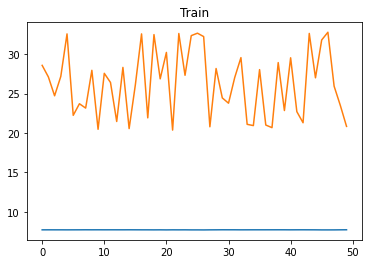

2/2 [==============================] - 4s 18ms/step


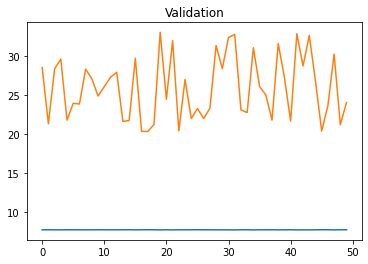

3/3 [==============================] - 0s 9ms/step


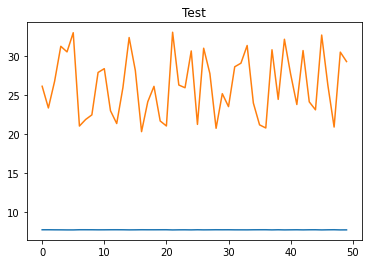

3/3 [==============================] - 0s 9ms/step


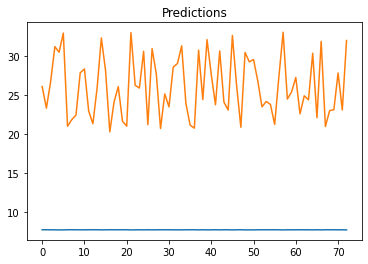

In [45]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [46]:
mavg_hybrid_rnn_gru_mse

353.63268625861207

### CNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 609.1599 - root_mean_squared_error: 24.6812

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 116s 11s/step - loss: 609.1599 - root_mean_squared_error: 24.6812 - val_loss: 631.9029 - val_root_mean_squared_error: 25.1377
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 589.1237 - root_mean_squared_error: 24.2719

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 81s 12s/step - loss: 589.1237 - root_mean_squared_error: 24.2719 - val_loss: 611.8787 - val_root_mean_squared_error: 24.7362
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 570.1251 - root_mean_squared_error: 23.8773

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 73s 10s/step - loss: 570.1251 - root_mean_squared_error: 23.8773 - val_loss: 592.7724 - val_root_mean_squared_error: 24.3469
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 552.1155 - root_mean_squared_error: 23.4971

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 60s 9s/step - loss: 552.1155 - root_mean_squared_error: 23.4971 - val_loss: 574.4854 - val_root_mean_squared_error: 23.9684
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 534.6964 - root_mean_squared_error: 23.1235

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 534.6964 - root_mean_squared_error: 23.1235 - val_loss: 557.1962 - val_root_mean_squared_error: 23.6050
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 518.3506 - root_mean_squared_error: 22.7673

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 85s 12s/step - loss: 518.3506 - root_mean_squared_error: 22.7673 - val_loss: 540.6949 - val_root_mean_squared_error: 23.2528
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 502.7162 - root_mean_squared_error: 22.4213

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 85s 12s/step - loss: 502.7162 - root_mean_squared_error: 22.4213 - val_loss: 525.1157 - val_root_mean_squared_error: 22.9154
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 488.0640 - root_mean_squared_error: 22.0922

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 68s 9s/step - loss: 488.0640 - root_mean_squared_error: 22.0922 - val_loss: 510.5896 - val_root_mean_squared_error: 22.5962
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 474.3525 - root_mean_squared_error: 21.7796

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 100s 14s/step - loss: 474.3525 - root_mean_squared_error: 21.7796 - val_loss: 497.1967 - val_root_mean_squared_error: 22.2979
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 461.7802 - root_mean_squared_error: 21.4891

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 62s 9s/step - loss: 461.7802 - root_mean_squared_error: 21.4891 - val_loss: 484.7296 - val_root_mean_squared_error: 22.0166
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 450.0184 - root_mean_squared_error: 21.2136

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 64s 9s/step - loss: 450.0184 - root_mean_squared_error: 21.2136 - val_loss: 473.2354 - val_root_mean_squared_error: 21.7540
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 439.2225 - root_mean_squared_error: 20.9576

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 83s 12s/step - loss: 439.2225 - root_mean_squared_error: 20.9576 - val_loss: 462.5843 - val_root_mean_squared_error: 21.5078
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 429.2441 - root_mean_squared_error: 20.7182

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 64s 9s/step - loss: 429.2441 - root_mean_squared_error: 20.7182 - val_loss: 452.8829 - val_root_mean_squared_error: 21.2810
Epoch 14/30
7/8 [=========================>....] - ETA: 0s - loss: 421.2436 - root_mean_squared_error: 20.5242

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 79s 11s/step - loss: 420.1651 - root_mean_squared_error: 20.4979 - val_loss: 444.0471 - val_root_mean_squared_error: 21.0724
Epoch 15/30
7/8 [=========================>....] - ETA: 0s - loss: 411.9539 - root_mean_squared_error: 20.2966

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 77s 11s/step - loss: 411.8706 - root_mean_squared_error: 20.2946 - val_loss: 435.9892 - val_root_mean_squared_error: 20.8804
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 404.3678 - root_mean_squared_error: 20.1089

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 75s 11s/step - loss: 404.3678 - root_mean_squared_error: 20.1089 - val_loss: 428.5660 - val_root_mean_squared_error: 20.7018
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 397.3780 - root_mean_squared_error: 19.9343

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 87s 12s/step - loss: 397.3780 - root_mean_squared_error: 19.9343 - val_loss: 421.8193 - val_root_mean_squared_error: 20.5382
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 391.0669 - root_mean_squared_error: 19.7754

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 84s 12s/step - loss: 391.0669 - root_mean_squared_error: 19.7754 - val_loss: 415.6512 - val_root_mean_squared_error: 20.3875
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 385.3502 - root_mean_squared_error: 19.6303

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 79s 11s/step - loss: 385.3502 - root_mean_squared_error: 19.6303 - val_loss: 410.0512 - val_root_mean_squared_error: 20.2497
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 380.1233 - root_mean_squared_error: 19.4967

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 67s 10s/step - loss: 380.1233 - root_mean_squared_error: 19.4967 - val_loss: 405.0358 - val_root_mean_squared_error: 20.1255
Epoch 21/30
7/8 [=========================>....] - ETA: 0s - loss: 373.8527 - root_mean_squared_error: 19.3353

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 77s 11s/step - loss: 375.4822 - root_mean_squared_error: 19.3774 - val_loss: 400.4874 - val_root_mean_squared_error: 20.0122
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 371.2453 - root_mean_squared_error: 19.2677

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 69s 10s/step - loss: 371.2453 - root_mean_squared_error: 19.2677 - val_loss: 396.3324 - val_root_mean_squared_error: 19.9081
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 367.3616 - root_mean_squared_error: 19.1667

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 82s 12s/step - loss: 367.3616 - root_mean_squared_error: 19.1667 - val_loss: 392.5492 - val_root_mean_squared_error: 19.8129
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 363.8470 - root_mean_squared_error: 19.0748

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 81s 11s/step - loss: 363.8470 - root_mean_squared_error: 19.0748 - val_loss: 389.1111 - val_root_mean_squared_error: 19.7259
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 360.6647 - root_mean_squared_error: 18.9912

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 92s 13s/step - loss: 360.6647 - root_mean_squared_error: 18.9912 - val_loss: 385.9698 - val_root_mean_squared_error: 19.6461
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 357.4023 - root_mean_squared_error: 18.9051

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 79s 11s/step - loss: 357.7173 - root_mean_squared_error: 18.9134 - val_loss: 383.0782 - val_root_mean_squared_error: 19.5724
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 354.9770 - root_mean_squared_error: 18.8408

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 62s 9s/step - loss: 354.9770 - root_mean_squared_error: 18.8408 - val_loss: 380.3797 - val_root_mean_squared_error: 19.5033
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 352.4402 - root_mean_squared_error: 18.7734

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 92s 13s/step - loss: 352.4402 - root_mean_squared_error: 18.7734 - val_loss: 377.8335 - val_root_mean_squared_error: 19.4379
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 350.0625 - root_mean_squared_error: 18.7100

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 58s 8s/step - loss: 350.0625 - root_mean_squared_error: 18.7100 - val_loss: 375.4474 - val_root_mean_squared_error: 19.3765
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 347.8093 - root_mean_squared_error: 18.6496

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_gru/assets


8/8 [==============================] - 14s 195ms/step


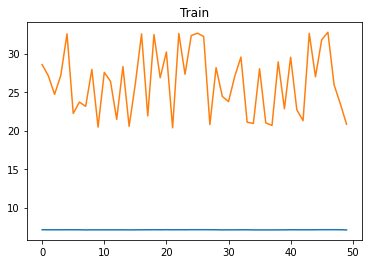

2/2 [==============================] - 7s 1s/step


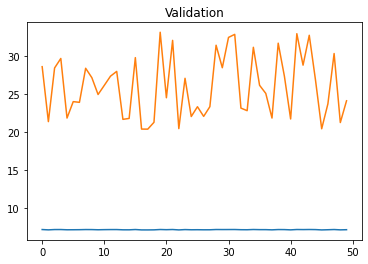

3/3 [==============================] - 1s 28ms/step


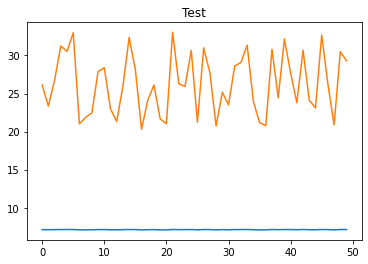

3/3 [==============================] - 0s 16ms/step


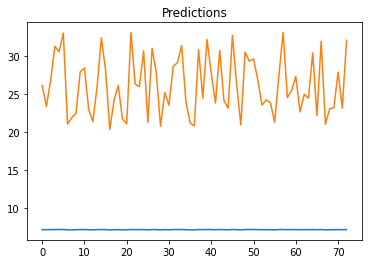

In [47]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3,1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [48]:
mavg_hybrid_cnn_gru_mse

375.6536909659035

### CNN RNN GRU

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 621.2806 - root_mean_squared_error: 24.9255

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 103s 10s/step - loss: 621.2806 - root_mean_squared_error: 24.9255 - val_loss: 648.3419 - val_root_mean_squared_error: 25.4626
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 607.9130 - root_mean_squared_error: 24.6559

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 63s 9s/step - loss: 607.9130 - root_mean_squared_error: 24.6559 - val_loss: 635.1419 - val_root_mean_squared_error: 25.2020
Epoch 3/30
7/8 [=========================>....] - ETA: 0s - loss: 598.2302 - root_mean_squared_error: 24.4587

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 595.2394 - root_mean_squared_error: 24.3975 - val_loss: 622.3300 - val_root_mean_squared_error: 24.9465
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 582.7961 - root_mean_squared_error: 24.1412

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 582.7961 - root_mean_squared_error: 24.1412 - val_loss: 609.7448 - val_root_mean_squared_error: 24.6930
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 570.4960 - root_mean_squared_error: 23.8851

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 570.4960 - root_mean_squared_error: 23.8851 - val_loss: 597.0806 - val_root_mean_squared_error: 24.4352
Epoch 6/30
7/8 [=========================>....] - ETA: 0s - loss: 555.4644 - root_mean_squared_error: 23.5683

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 558.0456 - root_mean_squared_error: 23.6230 - val_loss: 584.3651 - val_root_mean_squared_error: 24.1736
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 545.6466 - root_mean_squared_error: 23.3591

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 72s 10s/step - loss: 545.6466 - root_mean_squared_error: 23.3591 - val_loss: 571.6095 - val_root_mean_squared_error: 23.9084
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 538.0279 - root_mean_squared_error: 23.1954

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 533.3271 - root_mean_squared_error: 23.0939 - val_loss: 559.1416 - val_root_mean_squared_error: 23.6462
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 521.5814 - root_mean_squared_error: 22.8382

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 521.5814 - root_mean_squared_error: 22.8382 - val_loss: 547.1427 - val_root_mean_squared_error: 23.3911
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 510.1880 - root_mean_squared_error: 22.5873

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 510.1880 - root_mean_squared_error: 22.5873 - val_loss: 535.8883 - val_root_mean_squared_error: 23.1493
Epoch 11/30
7/8 [=========================>....] - ETA: 0s - loss: 498.9108 - root_mean_squared_error: 22.3363

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 499.5851 - root_mean_squared_error: 22.3514 - val_loss: 525.3141 - val_root_mean_squared_error: 22.9197
Epoch 12/30
7/8 [=========================>....] - ETA: 0s - loss: 489.5111 - root_mean_squared_error: 22.1249

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 489.5160 - root_mean_squared_error: 22.1250 - val_loss: 515.3292 - val_root_mean_squared_error: 22.7009
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 479.0984 - root_mean_squared_error: 21.8883

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 77s 11s/step - loss: 480.1328 - root_mean_squared_error: 21.9119 - val_loss: 506.0669 - val_root_mean_squared_error: 22.4959
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 471.3389 - root_mean_squared_error: 21.7103

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 471.3389 - root_mean_squared_error: 21.7103 - val_loss: 497.3166 - val_root_mean_squared_error: 22.3006
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 462.9314 - root_mean_squared_error: 21.5158

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 462.9314 - root_mean_squared_error: 21.5158 - val_loss: 488.8524 - val_root_mean_squared_error: 22.1100
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 454.7531 - root_mean_squared_error: 21.3249

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 454.7531 - root_mean_squared_error: 21.3249 - val_loss: 480.7103 - val_root_mean_squared_error: 21.9251
Epoch 17/30
7/8 [=========================>....] - ETA: 0s - loss: 446.7614 - root_mean_squared_error: 21.1367

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 52s 7s/step - loss: 447.1562 - root_mean_squared_error: 21.1461 - val_loss: 473.1333 - val_root_mean_squared_error: 21.7516
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 440.0863 - root_mean_squared_error: 20.9782

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 49s 7s/step - loss: 440.0863 - root_mean_squared_error: 20.9782 - val_loss: 466.1320 - val_root_mean_squared_error: 21.5901
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 433.5240 - root_mean_squared_error: 20.8212

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 73s 10s/step - loss: 433.5240 - root_mean_squared_error: 20.8212 - val_loss: 459.5631 - val_root_mean_squared_error: 21.4374
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 427.3043 - root_mean_squared_error: 20.6713

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 65s 9s/step - loss: 427.3043 - root_mean_squared_error: 20.6713 - val_loss: 453.2321 - val_root_mean_squared_error: 21.2892
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 421.2582 - root_mean_squared_error: 20.5246

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 421.2582 - root_mean_squared_error: 20.5246 - val_loss: 447.0964 - val_root_mean_squared_error: 21.1447
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 415.4092 - root_mean_squared_error: 20.3816

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 415.4092 - root_mean_squared_error: 20.3816 - val_loss: 441.1950 - val_root_mean_squared_error: 21.0046
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 409.7901 - root_mean_squared_error: 20.2433

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 409.7901 - root_mean_squared_error: 20.2433 - val_loss: 435.4991 - val_root_mean_squared_error: 20.8686
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 404.3631 - root_mean_squared_error: 20.1088

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 404.3631 - root_mean_squared_error: 20.1088 - val_loss: 430.0414 - val_root_mean_squared_error: 20.7374
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 399.1606 - root_mean_squared_error: 19.9790

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 47s 6s/step - loss: 399.1606 - root_mean_squared_error: 19.9790 - val_loss: 424.7602 - val_root_mean_squared_error: 20.6097
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 394.1443 - root_mean_squared_error: 19.8531

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 39s 5s/step - loss: 394.1443 - root_mean_squared_error: 19.8531 - val_loss: 419.6620 - val_root_mean_squared_error: 20.4857
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 389.2854 - root_mean_squared_error: 19.7303

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 59s 8s/step - loss: 389.2854 - root_mean_squared_error: 19.7303 - val_loss: 414.6850 - val_root_mean_squared_error: 20.3638
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 380.2663 - root_mean_squared_error: 19.5004

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 384.5448 - root_mean_squared_error: 19.6098 - val_loss: 409.8204 - val_root_mean_squared_error: 20.2440
Epoch 29/30
7/8 [=========================>....] - ETA: 0s - loss: 381.4066 - root_mean_squared_error: 19.5296

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 58s 8s/step - loss: 379.8782 - root_mean_squared_error: 19.4905 - val_loss: 404.9939 - val_root_mean_squared_error: 20.1245
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 375.2700 - root_mean_squared_error: 19.3719

INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_cnn_rnn_gru/assets


8/8 [==============================] - 3s 23ms/step


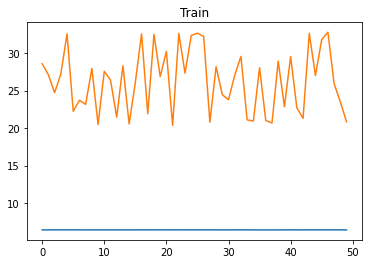

2/2 [==============================] - 2s 49ms/step


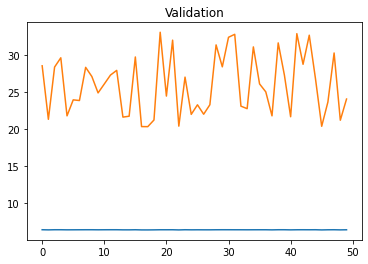

3/3 [==============================] - 0s 46ms/step


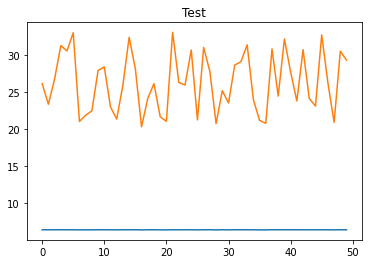

3/3 [==============================] - 0s 14ms/step


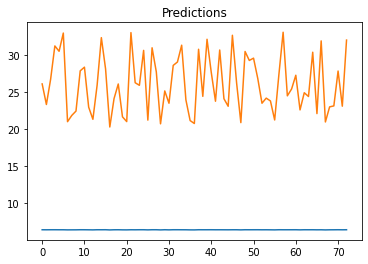

In [49]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(3, 1)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [50]:
mavg_hybrid_cnn_rnn_gru_mse

402.8975824330621

### RNN LSTM GRU

Epoch 1/30
6/8 [=====================>........] - ETA: 0s - loss: 645.0806 - root_mean_squared_error: 25.3984

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 132s 13s/step - loss: 636.9935 - root_mean_squared_error: 25.2387 - val_loss: 658.5021 - val_root_mean_squared_error: 25.6613
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 613.2700 - root_mean_squared_error: 24.7643

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 613.2700 - root_mean_squared_error: 24.7643 - val_loss: 633.6157 - val_root_mean_squared_error: 25.1717
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 588.5649 - root_mean_squared_error: 24.2604

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 588.5649 - root_mean_squared_error: 24.2604 - val_loss: 606.8763 - val_root_mean_squared_error: 24.6349
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 561.7940 - root_mean_squared_error: 23.7022

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 561.7940 - root_mean_squared_error: 23.7022 - val_loss: 577.7062 - val_root_mean_squared_error: 24.0355
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 532.4835 - root_mean_squared_error: 23.0756

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 532.4835 - root_mean_squared_error: 23.0756 - val_loss: 545.8635 - val_root_mean_squared_error: 23.3637
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 500.5740 - root_mean_squared_error: 22.3735

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 500.5740 - root_mean_squared_error: 22.3735 - val_loss: 511.3167 - val_root_mean_squared_error: 22.6123
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 466.4760 - root_mean_squared_error: 21.5981

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 71s 10s/step - loss: 466.4760 - root_mean_squared_error: 21.5981 - val_loss: 475.3066 - val_root_mean_squared_error: 21.8015
Epoch 8/30
7/8 [=========================>....] - ETA: 0s - loss: 429.7583 - root_mean_squared_error: 20.7306

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 55s 8s/step - loss: 431.4663 - root_mean_squared_error: 20.7718 - val_loss: 439.4129 - val_root_mean_squared_error: 20.9622
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 397.5454 - root_mean_squared_error: 19.9385

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 61s 9s/step - loss: 397.5454 - root_mean_squared_error: 19.9385 - val_loss: 405.6696 - val_root_mean_squared_error: 20.1412
Epoch 10/30
7/8 [=========================>....] - ETA: 0s - loss: 365.3730 - root_mean_squared_error: 19.1147

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 58s 8s/step - loss: 366.4795 - root_mean_squared_error: 19.1437 - val_loss: 375.9267 - val_root_mean_squared_error: 19.3888
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 339.3141 - root_mean_squared_error: 18.4205

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 339.3141 - root_mean_squared_error: 18.4205 - val_loss: 350.7356 - val_root_mean_squared_error: 18.7279
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 316.8350 - root_mean_squared_error: 17.7999

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 50s 7s/step - loss: 316.8350 - root_mean_squared_error: 17.7999 - val_loss: 330.0153 - val_root_mean_squared_error: 18.1663
Epoch 13/30
7/8 [=========================>....] - ETA: 0s - loss: 297.3547 - root_mean_squared_error: 17.2440

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 298.6016 - root_mean_squared_error: 17.2801 - val_loss: 313.4693 - val_root_mean_squared_error: 17.7051
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 284.0885 - root_mean_squared_error: 16.8549

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 48s 7s/step - loss: 284.0885 - root_mean_squared_error: 16.8549 - val_loss: 300.1787 - val_root_mean_squared_error: 17.3257
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 272.3849 - root_mean_squared_error: 16.5041

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 272.3849 - root_mean_squared_error: 16.5041 - val_loss: 289.5354 - val_root_mean_squared_error: 17.0157
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 263.4119 - root_mean_squared_error: 16.2300

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 262.9209 - root_mean_squared_error: 16.2148 - val_loss: 280.9608 - val_root_mean_squared_error: 16.7619
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 255.3219 - root_mean_squared_error: 15.9788

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 255.3219 - root_mean_squared_error: 15.9788 - val_loss: 273.8874 - val_root_mean_squared_error: 16.5495
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 248.9785 - root_mean_squared_error: 15.7791

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 66s 9s/step - loss: 248.9785 - root_mean_squared_error: 15.7791 - val_loss: 267.9843 - val_root_mean_squared_error: 16.3702
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 243.6956 - root_mean_squared_error: 15.6108

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 243.6956 - root_mean_squared_error: 15.6108 - val_loss: 262.9712 - val_root_mean_squared_error: 16.2164
Epoch 20/30
7/8 [=========================>....] - ETA: 0s - loss: 238.1326 - root_mean_squared_error: 15.4315

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 54s 8s/step - loss: 239.1614 - root_mean_squared_error: 15.4648 - val_loss: 258.6068 - val_root_mean_squared_error: 16.0813
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 235.1537 - root_mean_squared_error: 15.3347

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 51s 7s/step - loss: 235.1537 - root_mean_squared_error: 15.3347 - val_loss: 254.7658 - val_root_mean_squared_error: 15.9614
Epoch 22/30
7/8 [=========================>....] - ETA: 0s - loss: 231.8659 - root_mean_squared_error: 15.2271

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 41s 6s/step - loss: 231.6428 - root_mean_squared_error: 15.2198 - val_loss: 251.3243 - val_root_mean_squared_error: 15.8532
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 228.5093 - root_mean_squared_error: 15.1165

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 44s 6s/step - loss: 228.5093 - root_mean_squared_error: 15.1165 - val_loss: 248.2066 - val_root_mean_squared_error: 15.7546
Epoch 24/30
7/8 [=========================>....] - ETA: 0s - loss: 225.4901 - root_mean_squared_error: 15.0163

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 46s 7s/step - loss: 225.6163 - root_mean_squared_error: 15.0205 - val_loss: 245.3689 - val_root_mean_squared_error: 15.6643
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 223.0009 - root_mean_squared_error: 14.9332

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 223.0009 - root_mean_squared_error: 14.9332 - val_loss: 242.7119 - val_root_mean_squared_error: 15.5792
Epoch 26/30
5/8 [=================>............] - ETA: 0s - loss: 212.3977 - root_mean_squared_error: 14.5739

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 75s 11s/step - loss: 220.5230 - root_mean_squared_error: 14.8500 - val_loss: 240.2433 - val_root_mean_squared_error: 15.4998
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 218.2385 - root_mean_squared_error: 14.7729

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 218.2385 - root_mean_squared_error: 14.7729 - val_loss: 237.8782 - val_root_mean_squared_error: 15.4233
Epoch 28/30
7/8 [=========================>....] - ETA: 0s - loss: 215.3097 - root_mean_squared_error: 14.6734

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 43s 6s/step - loss: 216.0148 - root_mean_squared_error: 14.6974 - val_loss: 235.6225 - val_root_mean_squared_error: 15.3500
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 213.9012 - root_mean_squared_error: 14.6254

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 213.9012 - root_mean_squared_error: 14.6254 - val_loss: 233.4591 - val_root_mean_squared_error: 15.2794
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 211.8660 - root_mean_squared_error: 14.5556

INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


INFO:tensorflow:Assets written to: mavg_hybrid_lstm_rnn_gru/assets


8/8 [==============================] - 5s 86ms/step


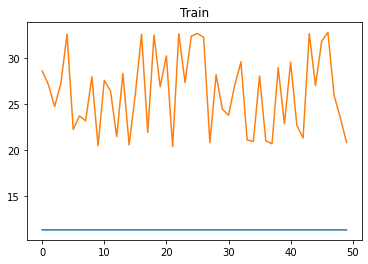

2/2 [==============================] - 3s 15ms/step


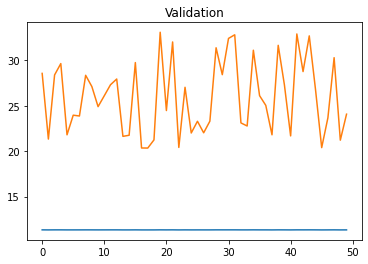

3/3 [==============================] - 0s 168ms/step


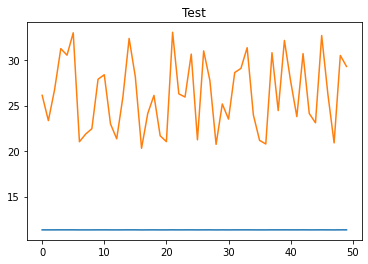

3/3 [==============================] - 0s 15ms/step


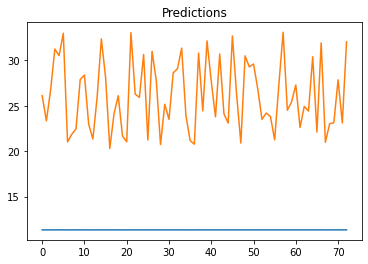

In [51]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(3,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [52]:
mavg_hybrid_lstm_rnn_gru_mse

233.22714180615273

# MSE

In [53]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]
msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [54]:
msedf

,Model,MSE,RMSE
0,cnn,232.537343,15.249175
1,rnn,478.875253,21.883219
2,gru,524.387879,22.899517
3,lstm,643.444286,25.366204
4,mvg_cnn,92.260985,9.605258
5,mvg_rnn,504.562803,22.462475
6,mvg_gru,491.968567,22.180364
7,mvg_lstm,689.525329,26.258814
8,auto_cnn,0.493544,0.702527
9,auto_rnn,471.345032,21.710482


In [55]:
msedf.to_csv("msedf.csv", index= False)

<AxesSubplot:xlabel='Model'>

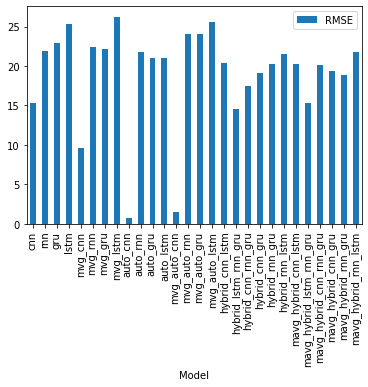

In [56]:
msedf.plot("Model", "RMSE", kind= "bar")

In [57]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)
np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)